In [1]:
# Importacion de librerias

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import preprocessing
import math
from tensorflow.python.ops import math_ops
import datetime
import random
from keras.callbacks import EarlyStopping
import scipy.stats as stats
from sklearn.model_selection import StratifiedShuffleSplit


In [2]:
# Se importa el conjunto de datos 

events_container_path= "C:\\TESIS\\FINAL\\base_datos\\"

dataset1 = pd.read_pickle(events_container_path + "rcc_earthquake_database_2011_2022_v5_1.pkl")      
dataset2 = pd.read_pickle(events_container_path + "rcc_earthquake_database_2023_v5_1.pkl")  


In [3]:
print(dataset1.shape)
print(dataset2.shape)

(18158, 30)
(1097, 30)


In [4]:
#Concatenamos los datasets
dataset = pd.concat([dataset1, dataset2])
dataset = dataset.reset_index(drop=True)
dataset.shape

(19255, 30)

In [5]:
dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0      2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1      2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2      2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3      2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4      2015-09-01T00:08:18.400000Z    20.028    -73.612   22.2  0.1  1.1  2.5   
...                            ...       ...        ...    ...  ...  ...  ...   
19250  2023-03-31T11:55:55.600000Z    20.015    -75.392    1.1  0.0  0.0  1.2   
19251  2023-01-31T16:41:41.500000Z    19.917    -74.579   35.6  0.2  1.0  1.6   
19252  2023-05-31T17:18:13.000000Z    20.019    -75.302   33.0  0.4  1.1  2.1   
19253  2023-03-31T20:45:29.000000Z    20.762    -75.716   14.1  0.3  1.0  2.8   
19254  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

         MW                       P_time                       S_time  ...  \
0      None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z  ...   
1       2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z  ...   
2      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
3      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
4       2.1  2015-09-01T00:08:48.400000Z  2015-09-01T00:09:10.780000Z  ...   
...     ...                          ...                          ...  ...   
19250  None  2023-03-31T11:56:01.760000Z  2023-03-31T11:56:06.300000Z  ...   
19251  None  2023-01-31T16:41:58.740000Z  2023-01-31T16:42:10.950000Z  ...   
19252  None  2023-05-31T17:18:20.640000Z  2023-05-31T17:18:25.820000Z  ...   
19253  None  2023-03-31T20:45:42.360000Z  2023-03-31T20:45:52.070000Z  ...   
19254  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z  ...   

         SNR_E_S    SNR_Z_P    SNR_N_P    SNR_E_P  SNR_2_Z_S  SNR_2_N_S  \
0      38.303512  31.591247  28.241687  34.623334  34.238948  39.844311   
1      41.251625  30.971502  23.088379  24.581475  38.799759  44.021357   
2      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
3      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
4       4.505587   3.651528    1.03095  -0.103556   7.447315   6.039825   
...          ...        ...        ...        ...        ...        ...   
19250    9.29433   0.931939  -2.778535   3.474391   8.930771   8.235453   
19251   3.810495  -4.841901   2.038071   4.061858  -0.880694  -8.169019   
19252  30.498232  17.858517  13.040914  13.332203  29.649465  34.039275   
19253   7.134519   1.021814   4.609409   4.242948   8.209613  12.140356   
19254  22.273761   7.086217   8.165199  13.038227  32.834776  25.387508   

       SNR_2_E_S  SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P  
0      41.784176  29.243128  29.135762  35.187746  
1      43.324343  30.071258  22.642736  26.351905  
2      47.652851  50.112502  48.696292  52.547644  
3      47.652851  50.112502  48.696292  52.547644  
4       4.837943   6.008325   -0.25269   0.134052  
...          ...        ...        ...        ...  
19250  10.310716   0.271702   0.135889   5.911656  
19251  -0.712658  -1.838488  -1.746372    3.11424  
19252  30.169256  21.012997  12.299247   11.42811  
19253   5.278861  -0.103339   5.354638   2.167625  
19254  19.520261  10.552444    6.08738  13.574669  

[19255 rows x 30 columns]

In [6]:
# En los datos existen indistintamente  Azimuths nombrados como  0 y 360 se unifican como 0

dataset['Azimuth']= dataset['Azimuth'].replace(360,0)

In [7]:
# Se eliminan filas que no cumplen con el tiempo de la ventana de datos

count = 0
max_window = 501
to_delete=[]
initial_length= len(dataset)
print ('Tamaño inicial :', initial_length)
for i in range(initial_length):
  tmp=dataset.iloc[i]
  z= tmp['Z_data']
  n= tmp['N_data']
  e= tmp['E_data'] 
  if (len(z) != max_window) or (len(n) != max_window) or (len(e) != max_window):   
    to_delete.append(i)
    count+=1
print('to_delete rows',to_delete)
dataset.drop(to_delete, axis=0, inplace=True)
print ('Eliminadas ',count,' filas')
print(len(dataset))
dataset.shape

Tamaño inicial : 19255
to_delete rows [2246, 3202, 8523, 9216]
Eliminadas  4  filas
19251


(19251, 30)

In [8]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset = dataset.reset_index(drop=True)
dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0      2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1      2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2      2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3      2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4      2015-09-01T00:08:18.400000Z    20.028    -73.612   22.2  0.1  1.1  2.5   
...                            ...       ...        ...    ...  ...  ...  ...   
19246  2023-03-31T11:55:55.600000Z    20.015    -75.392    1.1  0.0  0.0  1.2   
19247  2023-01-31T16:41:41.500000Z    19.917    -74.579   35.6  0.2  1.0  1.6   
19248  2023-05-31T17:18:13.000000Z    20.019    -75.302   33.0  0.4  1.1  2.1   
19249  2023-03-31T20:45:29.000000Z    20.762    -75.716   14.1  0.3  1.0  2.8   
19250  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

         MW                       P_time                       S_time  ...  \
0      None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z  ...   
1       2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z  ...   
2      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
3      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
4       2.1  2015-09-01T00:08:48.400000Z  2015-09-01T00:09:10.780000Z  ...   
...     ...                          ...                          ...  ...   
19246  None  2023-03-31T11:56:01.760000Z  2023-03-31T11:56:06.300000Z  ...   
19247  None  2023-01-31T16:41:58.740000Z  2023-01-31T16:42:10.950000Z  ...   
19248  None  2023-05-31T17:18:20.640000Z  2023-05-31T17:18:25.820000Z  ...   
19249  None  2023-03-31T20:45:42.360000Z  2023-03-31T20:45:52.070000Z  ...   
19250  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z  ...   

         SNR_E_S    SNR_Z_P    SNR_N_P    SNR_E_P  SNR_2_Z_S  SNR_2_N_S  \
0      38.303512  31.591247  28.241687  34.623334  34.238948  39.844311   
1      41.251625  30.971502  23.088379  24.581475  38.799759  44.021357   
2      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
3      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
4       4.505587   3.651528    1.03095  -0.103556   7.447315   6.039825   
...          ...        ...        ...        ...        ...        ...   
19246    9.29433   0.931939  -2.778535   3.474391   8.930771   8.235453   
19247   3.810495  -4.841901   2.038071   4.061858  -0.880694  -8.169019   
19248  30.498232  17.858517  13.040914  13.332203  29.649465  34.039275   
19249   7.134519   1.021814   4.609409   4.242948   8.209613  12.140356   
19250  22.273761   7.086217   8.165199  13.038227  32.834776  25.387508   

       SNR_2_E_S  SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P  
0      41.784176  29.243128  29.135762  35.187746  
1      43.324343  30.071258  22.642736  26.351905  
2      47.652851  50.112502  48.696292  52.547644  
3      47.652851  50.112502  48.696292  52.547644  
4       4.837943   6.008325   -0.25269   0.134052  
...          ...        ...        ...        ...  
19246  10.310716   0.271702   0.135889   5.911656  
19247  -0.712658  -1.838488  -1.746372    3.11424  
19248  30.169256  21.012997  12.299247   11.42811  
19249   5.278861  -0.103339   5.354638   2.167625  
19250  19.520261  10.552444    6.08738  13.574669  

[19251 rows x 30 columns]

In [9]:
# Buscamos el maximo valor absoluto de los datos porque existe un dato con un valor maximo erroneo
n =0
global_max = float('-inf')

for i in range(len(dataset)):
    row = dataset.iloc[i]  # Obtén la fila actual
    
    for channel in ['Z_data', 'N_data', 'E_data']:
        channel_values = row[channel]  # Obtén el arreglo correspondiente al canal actual
        
        channel_max = np.max(np.abs(channel_values))  # Encuentra el valor máximo absoluto en el arreglo
        
        # Actualiza el máximo global si es necesario
        if channel_max > global_max:
            global_max = channel_max
            n=i

print("Valor máximo absoluto:", global_max)
print(n)

Valor máximo absoluto: 0.850321267507
442


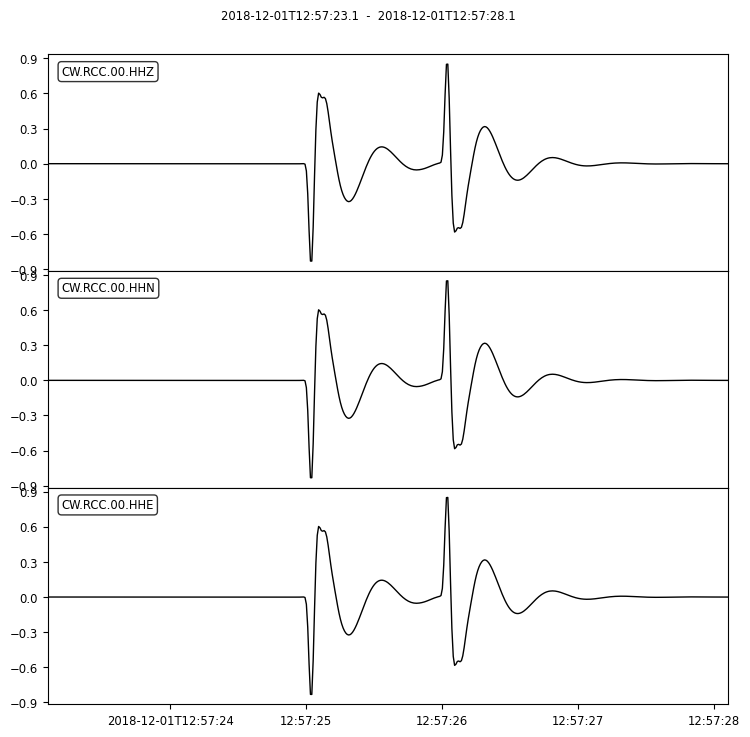

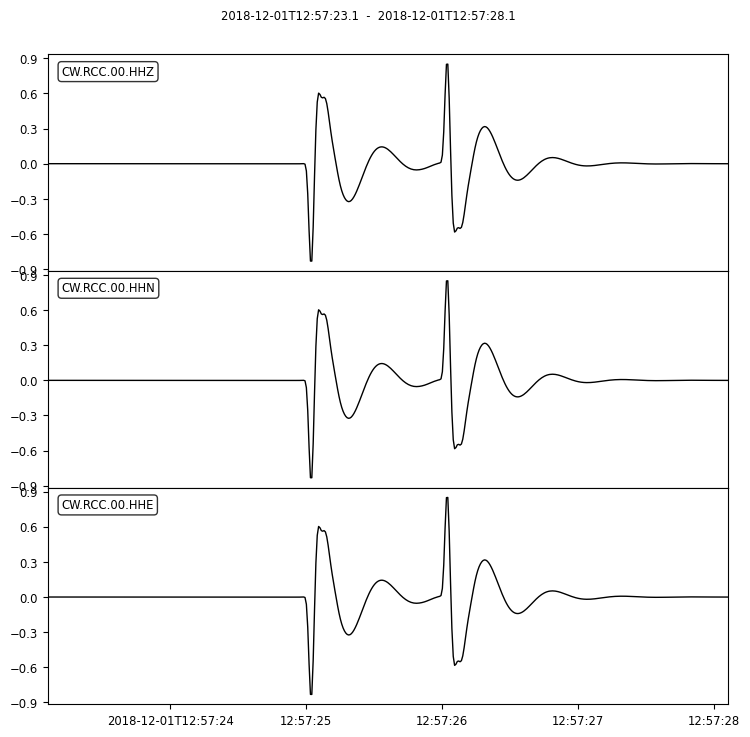

In [10]:
#Visualizo el dato erroneo
dataset.iloc[442]['RCC_OBSPY'].plot()

In [11]:
#Elimino esta fila del dataset que posee problemas  con el valor de los canales y me altera el programa al calcular el maximo
dataset = dataset.drop(dataset.index[442])


In [12]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset = dataset.reset_index(drop=True)
dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0      2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1      2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2      2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3      2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4      2015-09-01T00:08:18.400000Z    20.028    -73.612   22.2  0.1  1.1  2.5   
...                            ...       ...        ...    ...  ...  ...  ...   
19245  2023-03-31T11:55:55.600000Z    20.015    -75.392    1.1  0.0  0.0  1.2   
19246  2023-01-31T16:41:41.500000Z    19.917    -74.579   35.6  0.2  1.0  1.6   
19247  2023-05-31T17:18:13.000000Z    20.019    -75.302   33.0  0.4  1.1  2.1   
19248  2023-03-31T20:45:29.000000Z    20.762    -75.716   14.1  0.3  1.0  2.8   
19249  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

         MW                       P_time                       S_time  ...  \
0      None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z  ...   
1       2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z  ...   
2      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
3      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
4       2.1  2015-09-01T00:08:48.400000Z  2015-09-01T00:09:10.780000Z  ...   
...     ...                          ...                          ...  ...   
19245  None  2023-03-31T11:56:01.760000Z  2023-03-31T11:56:06.300000Z  ...   
19246  None  2023-01-31T16:41:58.740000Z  2023-01-31T16:42:10.950000Z  ...   
19247  None  2023-05-31T17:18:20.640000Z  2023-05-31T17:18:25.820000Z  ...   
19248  None  2023-03-31T20:45:42.360000Z  2023-03-31T20:45:52.070000Z  ...   
19249  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z  ...   

         SNR_E_S    SNR_Z_P    SNR_N_P    SNR_E_P  SNR_2_Z_S  SNR_2_N_S  \
0      38.303512  31.591247  28.241687  34.623334  34.238948  39.844311   
1      41.251625  30.971502  23.088379  24.581475  38.799759  44.021357   
2      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
3      47.925882  52.951417  48.265875  52.034943   51.35159  54.196981   
4       4.505587   3.651528    1.03095  -0.103556   7.447315   6.039825   
...          ...        ...        ...        ...        ...        ...   
19245    9.29433   0.931939  -2.778535   3.474391   8.930771   8.235453   
19246   3.810495  -4.841901   2.038071   4.061858  -0.880694  -8.169019   
19247  30.498232  17.858517  13.040914  13.332203  29.649465  34.039275   
19248   7.134519   1.021814   4.609409   4.242948   8.209613  12.140356   
19249  22.273761   7.086217   8.165199  13.038227  32.834776  25.387508   

       SNR_2_E_S  SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P  
0      41.784176  29.243128  29.135762  35.187746  
1      43.324343  30.071258  22.642736  26.351905  
2      47.652851  50.112502  48.696292  52.547644  
3      47.652851  50.112502  48.696292  52.547644  
4       4.837943   6.008325   -0.25269   0.134052  
...          ...        ...        ...        ...  
19245  10.310716   0.271702   0.135889   5.911656  
19246  -0.712658  -1.838488  -1.746372    3.11424  
19247  30.169256  21.012997  12.299247   11.42811  
19248   5.278861  -0.103339   5.354638   2.167625  
19249  19.520261  10.552444    6.08738  13.574669  

[19250 rows x 30 columns]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19250 entries, 0 to 19249
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Origin_Time   19250 non-null  object 
 1   Latitude      19250 non-null  float64
 2   Longitude     19250 non-null  float64
 3   Depth         19250 non-null  float64
 4   RMS           19250 non-null  float64
 5   ML            19250 non-null  float64
 6   Mc            19091 non-null  object 
 7   MW            7270 non-null   object 
 8   P_time        19250 non-null  object 
 9   S_time        18105 non-null  object 
 10  Distance      19250 non-null  float64
 11  Back_Azimuth  19250 non-null  object 
 12  Azimuth       19250 non-null  int64  
 13  WAV_file      19250 non-null  object 
 14  RCC_OBSPY     19250 non-null  object 
 15  Z_data        19250 non-null  object 
 16  N_data        19250 non-null  object 
 17  E_data        19250 non-null  object 
 18  SNR_Z_S       18105 non-nu

In [14]:
# Se convierte a float las columnas que asi lo requieren

dataset['Mc']= dataset['Mc'].astype(float, errors = 'raise')
dataset['Azimuth']= dataset['Azimuth'].astype(float, errors = 'raise')

In [15]:
# Convertimos los grados a radianes
dataset['Azimuth_radianes']= [math.radians(i) for i in dataset['Azimuth']]   
dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0      2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1      2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2      2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3      2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4      2015-09-01T00:08:18.400000Z    20.028    -73.612   22.2  0.1  1.1  2.5   
...                            ...       ...        ...    ...  ...  ...  ...   
19245  2023-03-31T11:55:55.600000Z    20.015    -75.392    1.1  0.0  0.0  1.2   
19246  2023-01-31T16:41:41.500000Z    19.917    -74.579   35.6  0.2  1.0  1.6   
19247  2023-05-31T17:18:13.000000Z    20.019    -75.302   33.0  0.4  1.1  2.1   
19248  2023-03-31T20:45:29.000000Z    20.762    -75.716   14.1  0.3  1.0  2.8   
19249  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

         MW                       P_time                       S_time  ...  \
0      None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z  ...   
1       2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z  ...   
2      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
3      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
4       2.1  2015-09-01T00:08:48.400000Z  2015-09-01T00:09:10.780000Z  ...   
...     ...                          ...                          ...  ...   
19245  None  2023-03-31T11:56:01.760000Z  2023-03-31T11:56:06.300000Z  ...   
19246  None  2023-01-31T16:41:58.740000Z  2023-01-31T16:42:10.950000Z  ...   
19247  None  2023-05-31T17:18:20.640000Z  2023-05-31T17:18:25.820000Z  ...   
19248  None  2023-03-31T20:45:42.360000Z  2023-03-31T20:45:52.070000Z  ...   
19249  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z  ...   

         SNR_Z_P    SNR_N_P    SNR_E_P  SNR_2_Z_S  SNR_2_N_S  SNR_2_E_S  \
0      31.591247  28.241687  34.623334  34.238948  39.844311  41.784176   
1      30.971502  23.088379  24.581475  38.799759  44.021357  43.324343   
2      52.951417  48.265875  52.034943   51.35159  54.196981  47.652851   
3      52.951417  48.265875  52.034943   51.35159  54.196981  47.652851   
4       3.651528    1.03095  -0.103556   7.447315   6.039825   4.837943   
...          ...        ...        ...        ...        ...        ...   
19245   0.931939  -2.778535   3.474391   8.930771   8.235453  10.310716   
19246  -4.841901   2.038071   4.061858  -0.880694  -8.169019  -0.712658   
19247  17.858517  13.040914  13.332203  29.649465  34.039275  30.169256   
19248   1.021814   4.609409   4.242948   8.209613  12.140356   5.278861   
19249   7.086217   8.165199  13.038227  32.834776  25.387508  19.520261   

       SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P Azimuth_radianes  
0      29.243128  29.135762  35.187746         4.276057  
1      30.071258  22.642736  26.351905         2.303835  
2      50.112502  48.696292  52.547644         4.066617  
3      50.112502  48.696292  52.547644         3.996804  
4       6.008325   -0.25269   0.134052         1.553343  
...          ...        ...        ...              ...  
19245   0.271702   0.135889   5.911656         1.500983  
19246  -1.838488  -1.746372    3.11424         1.640609  
19247  21.012997  12.299247   11.42811         1.500983  
19248  -0.103339   5.354638   2.167625         6.265732  
19249  10.552444    6.08738  13.574669         0.349066  

[19250 rows x 31 columns]

In [16]:
# Conservo el dataset original
dataset_original= dataset.copy()

In [17]:
dataset_original

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0      2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1      2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2      2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3      2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4      2015-09-01T00:08:18.400000Z    20.028    -73.612   22.2  0.1  1.1  2.5   
...                            ...       ...        ...    ...  ...  ...  ...   
19245  2023-03-31T11:55:55.600000Z    20.015    -75.392    1.1  0.0  0.0  1.2   
19246  2023-01-31T16:41:41.500000Z    19.917    -74.579   35.6  0.2  1.0  1.6   
19247  2023-05-31T17:18:13.000000Z    20.019    -75.302   33.0  0.4  1.1  2.1   
19248  2023-03-31T20:45:29.000000Z    20.762    -75.716   14.1  0.3  1.0  2.8   
19249  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

         MW                       P_time                       S_time  ...  \
0      None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z  ...   
1       2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z  ...   
2      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
3      None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z  ...   
4       2.1  2015-09-01T00:08:48.400000Z  2015-09-01T00:09:10.780000Z  ...   
...     ...                          ...                          ...  ...   
19245  None  2023-03-31T11:56:01.760000Z  2023-03-31T11:56:06.300000Z  ...   
19246  None  2023-01-31T16:41:58.740000Z  2023-01-31T16:42:10.950000Z  ...   
19247  None  2023-05-31T17:18:20.640000Z  2023-05-31T17:18:25.820000Z  ...   
19248  None  2023-03-31T20:45:42.360000Z  2023-03-31T20:45:52.070000Z  ...   
19249  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z  ...   

         SNR_Z_P    SNR_N_P    SNR_E_P  SNR_2_Z_S  SNR_2_N_S  SNR_2_E_S  \
0      31.591247  28.241687  34.623334  34.238948  39.844311  41.784176   
1      30.971502  23.088379  24.581475  38.799759  44.021357  43.324343   
2      52.951417  48.265875  52.034943   51.35159  54.196981  47.652851   
3      52.951417  48.265875  52.034943   51.35159  54.196981  47.652851   
4       3.651528    1.03095  -0.103556   7.447315   6.039825   4.837943   
...          ...        ...        ...        ...        ...        ...   
19245   0.931939  -2.778535   3.474391   8.930771   8.235453  10.310716   
19246  -4.841901   2.038071   4.061858  -0.880694  -8.169019  -0.712658   
19247  17.858517  13.040914  13.332203  29.649465  34.039275  30.169256   
19248   1.021814   4.609409   4.242948   8.209613  12.140356   5.278861   
19249   7.086217   8.165199  13.038227  32.834776  25.387508  19.520261   

       SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P Azimuth_radianes  
0      29.243128  29.135762  35.187746         4.276057  
1      30.071258  22.642736  26.351905         2.303835  
2      50.112502  48.696292  52.547644         4.066617  
3      50.112502  48.696292  52.547644         3.996804  
4       6.008325   -0.25269   0.134052         1.553343  
...          ...        ...        ...              ...  
19245   0.271702   0.135889   5.911656         1.500983  
19246  -1.838488  -1.746372    3.11424         1.640609  
19247  21.012997  12.299247   11.42811         1.500983  
19248  -0.103339   5.354638   2.167625         6.265732  
19249  10.552444    6.08738  13.574669         0.349066  

[19250 rows x 31 columns]

In [18]:
# Elimino los eventos a mas de  110Km de distancia (1 grado)

indexNames = dataset[ (dataset['Distance'] > 110)].index
dataset.drop(indexNames , inplace=True)
#sns.pairplot(dataset[['Azimuth','Distance','Mc','Depth']], diag_kind="kde")
dataset.shape

(13673, 31)

In [19]:
# Crear nuevos DataFrames para cada condición de SNR
dataset_snr25 = dataset[(dataset['SNR_Z_S'] >= 25) & (dataset['SNR_N_S'] >= 25) & (dataset['SNR_E_S'] >= 25)].copy()

dataset_snr20 = dataset[(dataset['SNR_Z_S'] >= 20) & (dataset['SNR_N_S'] >= 20) & (dataset['SNR_E_S'] >= 20)
                        & (dataset['SNR_Z_S'] < 25) & (dataset['SNR_N_S'] < 25) & (dataset['SNR_E_S'] < 25)].copy()
dataset_snr18 = dataset[(dataset['SNR_Z_S'] >= 18) & (dataset['SNR_N_S'] >= 18) & (dataset['SNR_E_S'] >= 18)
                        & (dataset['SNR_Z_S'] < 20) & (dataset['SNR_N_S'] < 20) & (dataset['SNR_E_S'] < 20)].copy()

dataset_snr15 = dataset[(dataset['SNR_Z_S'] >= 15) & (dataset['SNR_N_S'] >= 15) & (dataset['SNR_E_S'] >= 15)
                        & (dataset['SNR_Z_S'] < 18) & (dataset['SNR_N_S'] < 18) & (dataset['SNR_E_S'] < 18)].copy()

dataset_snr10 = dataset[(dataset['SNR_Z_S'] >= 10) & (dataset['SNR_N_S'] >= 10) & (dataset['SNR_E_S'] >= 10)
                        & (dataset['SNR_Z_S'] < 15) & (dataset['SNR_N_S'] < 15) & (dataset['SNR_E_S'] < 15)].copy()

dataset_snr5 = dataset[(dataset['SNR_Z_S'] >= 5) & (dataset['SNR_N_S'] >= 5) & (dataset['SNR_E_S'] >= 5)
                       & (dataset['SNR_Z_S'] < 10) & (dataset['SNR_N_S'] < 10) & (dataset['SNR_E_S'] < 10)].copy()

dataset_snr0 = dataset[(dataset['SNR_Z_S'] > 0) & (dataset['SNR_N_S'] > 0) & (dataset['SNR_E_S'] > 0)
                       & (dataset['SNR_Z_S'] < 5) & (dataset['SNR_N_S'] < 5) & (dataset['SNR_E_S'] < 5)].copy()

# Filtrar los valores que cumplan alguna de las condiciones anteriores o tengan algún valor None en las columnas para crear el dataset_invalid
dataset_invalid = dataset[~(
    (dataset['SNR_Z_S'] >= 25) & (dataset['SNR_N_S'] >= 25) & (dataset['SNR_E_S'] >= 25) |
    ((dataset['SNR_Z_S'] >= 20) & (dataset['SNR_N_S'] >= 20) & (dataset['SNR_E_S'] >= 20) &
    (dataset['SNR_Z_S'] < 25) & (dataset['SNR_N_S'] < 25) & (dataset['SNR_E_S'] < 25)) |
    ((dataset['SNR_Z_S'] >= 18) & (dataset['SNR_N_S'] >= 18) & (dataset['SNR_E_S'] >= 18) &
    (dataset['SNR_Z_S'] < 20) & (dataset['SNR_N_S'] < 20) & (dataset['SNR_E_S'] < 20)) |    
    ((dataset['SNR_Z_S'] >= 15) & (dataset['SNR_N_S'] >= 15) & (dataset['SNR_E_S'] >= 15) &
    (dataset['SNR_Z_S'] < 18) & (dataset['SNR_N_S'] < 18) & (dataset['SNR_E_S'] < 18)) |
    ((dataset['SNR_Z_S'] >= 10) & (dataset['SNR_N_S'] >= 10) & (dataset['SNR_E_S'] >= 10) &
    (dataset['SNR_Z_S'] < 15) & (dataset['SNR_N_S'] < 15) & (dataset['SNR_E_S'] < 15)) |
    ((dataset['SNR_Z_S'] >= 5) & (dataset['SNR_N_S'] >= 5) & (dataset['SNR_E_S'] >= 5) &
    (dataset['SNR_Z_S'] < 10) & (dataset['SNR_N_S'] < 10) & (dataset['SNR_E_S'] < 10)) |
    ((dataset['SNR_Z_S'] > 0) & (dataset['SNR_N_S'] > 0) & (dataset['SNR_E_S'] > 0) &
    (dataset['SNR_Z_S'] < 5) & (dataset['SNR_N_S'] < 5) & (dataset['SNR_E_S'] < 5))) &
    (dataset['SNR_Z_S'].notna() & dataset['SNR_N_S'].notna() & dataset['SNR_E_S'].notna())].copy()

# Crear el dataset_None con los elementos que tienen algún valor None en las columnas
dataset_None = dataset[dataset['SNR_Z_S'].isna() | dataset['SNR_N_S'].isna() | dataset['SNR_E_S'].isna()].copy()

# Marcar la columna 'Is_Valid' en cada DataFrame
dataset_snr25['Is_Valid'] = True
dataset_snr20['Is_Valid'] = False
dataset_snr18['Is_Valid'] = False
dataset_snr15['Is_Valid'] = False
dataset_snr10['Is_Valid'] = False
dataset_snr5['Is_Valid'] = False
dataset_snr0['Is_Valid'] = False
dataset_invalid['Is_Valid'] = False
dataset_None['Is_Valid'] = False

# Verificar los nuevos DataFrames
print("Dataset SNR >= 25:")
print(dataset_snr25.shape)

print("\nDataset SNR >= 20:")
print(dataset_snr20.shape)

print("\nDataset SNR >= 18:")
print(dataset_snr18.shape)

print("\nDataset SNR >= 15:")
print(dataset_snr15.shape)

print("\nDataset SNR >= 10:")
print(dataset_snr10.shape)

print("\nDataset SNR >= 5:")
print(dataset_snr5.shape)

print("\nDataset SNR > 0:")
print(dataset_snr0.shape)

print("\nDataset Invalid:")
print(dataset_invalid.shape)

print("\nDataset None:")
print(dataset_None.shape)

Dataset SNR >= 25:
(4064, 32)

Dataset SNR >= 20:
(361, 32)

Dataset SNR >= 18:
(25, 32)

Dataset SNR >= 15:
(98, 32)

Dataset SNR >= 10:
(415, 32)

Dataset SNR >= 5:
(415, 32)

Dataset SNR > 0:
(233, 32)

Dataset Invalid:
(7369, 32)

Dataset None:
(693, 32)


In [20]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_snr25 = dataset_snr25.reset_index(drop=True)
dataset_snr20 = dataset_snr20.reset_index(drop=True)
dataset_snr18 = dataset_snr18.reset_index(drop=True)
dataset_snr15 = dataset_snr15.reset_index(drop=True)
dataset_snr10 = dataset_snr10.reset_index(drop=True)
dataset_snr5 = dataset_snr5.reset_index(drop=True)
dataset_snr0 = dataset_snr0.reset_index(drop=True)
dataset_invalid = dataset_invalid.reset_index(drop=True)
dataset_None = dataset_None.reset_index(drop=True)

In [21]:
#Busco en el dataset_invalid aquellos datos que cumplen la SNR por cada canal independiente

In [22]:
dataset_snr_any_channel = dataset_invalid[((dataset_invalid['SNR_Z_S'] >= 15) & ((dataset_invalid['SNR_N_S'] >= 10) & (dataset_invalid['SNR_E_S'] >= 10)))|
                                          ((dataset_invalid['SNR_N_S'] >= 15) & ((dataset_invalid['SNR_Z_S'] >= 10) & (dataset_invalid['SNR_E_S'] >= 10)))|
                                          ((dataset_invalid['SNR_E_S'] >= 15) & ((dataset_invalid['SNR_Z_S'] >= 10) & (dataset_invalid['SNR_N_S'] >= 10)))].copy()

dataset_new_invalid = dataset_invalid[~(((dataset_invalid['SNR_Z_S'] >= 15) & ((dataset_invalid['SNR_N_S'] >= 10) & (dataset_invalid['SNR_E_S'] >= 10)))|
                                       ((dataset_invalid['SNR_N_S'] >= 15) & ((dataset_invalid['SNR_Z_S'] >= 10) & (dataset_invalid['SNR_E_S'] >= 10)))|
                                       ((dataset_invalid['SNR_E_S'] >= 15) & ((dataset_invalid['SNR_Z_S'] >= 10) & (dataset_invalid['SNR_N_S'] >= 10))))].copy()



pd.options.display.max_rows = 20
pd.options.display.max_columns = 999

#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_snr_any_channel = dataset_snr_any_channel.reset_index(drop=True)
dataset_new_invalid = dataset_new_invalid.reset_index(drop=True)
# Verificar los nuevos DataFrames
print("Dataset SNR Any Channel :")
print(dataset_snr_any_channel.shape)

print("Dataset SNR New Invalid:")
print(dataset_new_invalid.shape)


Dataset SNR Any Channel :
(4795, 32)
Dataset SNR New Invalid:
(2574, 32)


In [23]:
dataset_snr_any_channel

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2014-12-01T00:15:39.000000Z    19.778    -75.446   16.1  0.1  0.5  1.8   
1     2021-10-01T00:46:51.300000Z    19.931    -76.263   26.0  0.3  0.7  2.3   
2     2020-02-01T00:59:10.300000Z    19.767    -76.170    0.6  0.5  1.5  2.5   
3     2016-06-01T01:19:08.300000Z    19.903    -75.933    5.0  0.3  0.4  2.0   
4     2018-03-01T01:23:12.200000Z    19.238    -75.707   10.8  0.1  1.0  2.2   
...                           ...       ...        ...    ...  ...  ...  ...   
4790  2023-01-31T03:57:28.900000Z    19.821    -75.170    3.8  0.3  0.5  2.7   
4791  2023-03-31T05:35:36.700000Z    19.867    -75.801    3.7  0.1  0.1  1.6   
4792  2023-01-31T06:26:26.500000Z    19.905    -75.909   15.2  0.4  0.2  1.5   
4793  2023-05-31T10:47:34.200000Z    19.922    -75.315   15.8  0.1  0.3  1.6   
4794  2023-01-31T22:25:04.700000Z    20.160    -75.635    1.7  0.2  0.5  1.7   

        MW                       P_time                       S_time  \
0     None  2014-12-01T00:15:45.290000Z  2014-12-01T00:15:49.780000Z   
1     None  2021-10-01T00:47:01.200000Z  2021-10-01T00:47:08.700000Z   
2      1.9  2020-02-01T00:59:19.810000Z  2020-02-01T00:59:26.990000Z   
3      1.8  2016-06-01T01:19:13.650000Z  2016-06-01T01:19:17.270000Z   
4     None  2018-03-01T01:23:25.070000Z  2018-03-01T01:23:34.590000Z   
...    ...                          ...                          ...   
4790  None  2023-01-31T03:57:38.200000Z  2023-01-31T03:57:45.300000Z   
4791  None  2023-03-31T05:35:40.400000Z  2023-03-31T05:35:42.900000Z   
4792  None  2023-01-31T06:26:30.600000Z  2023-01-31T06:26:34.600000Z   
4793  None  2023-05-31T10:47:41.120000Z  2023-05-31T10:47:46.240000Z   
4794  None  2023-01-31T22:25:08.830000Z  2023-01-31T22:25:11.730000Z   

      Distance Back_Azimuth  Azimuth                       WAV_file  \
0         35.6          312    132.0             20141201001540.EVT   
1         59.7           83    263.0    2021-10-01-0046-31.CUBA_056   
2         55.7           63    243.0    2020-02-01-0058-49.CUBA_056   
3         26.7           68    248.0  2016-06-01-0119-05S.MAN___021   
4         83.8            1    181.0  2018-03-01-0122-55S.MAN___012   
...        ...          ...      ...                            ...   
4790      58.4          289    109.0    2023-01-31-0357-08.CUBA_056   
4791      17.9           38    218.0    2023-03-31-0535-16.CUBA_056   
4792      24.3           66    246.0    2023-01-31-0626-06.CUBA_056   
4793      40.8          282    102.0  2023-05-31-1047-10S.MAN___012   
4794      19.4          200     20.0    2023-01-31-2224-44.CUBA_056   

                                              RCC_OBSPY  \
0     [(-2.21986750071e-09, -2.03807605648e-09, -1.7...   
1     [(-1.74607433939e-09, -3.44149865707e-09, -5.0...   
2     [(7.8549259476e-09, 1.97114083203e-09, -6.1856...   
3     [(-6.60321300304e-09, -4.09118408154e-09, -1.1...   
4     [(-1.19864381775e-08, -1.20417603918e-08, -9.7...   
...                                                 ...   
4790  [(2.78887948346e-09, 3.47042561138e-09, 4.0253...   
4791  [(-5.00232917394e-10, -1.61228370584e-09, -1.7...   
4792  [(-5.8628685031e-10, -2.49603843221e-10, 8.971...   
4793  [(-1.25957714894e-08, -1.19514408482e-08, -1.1...   
4794  [(-5.07570287183e-09, -1.49770303342e-09, 5.53...   

                                                 Z_data  \
0     [-2.21986750071e-09, -2.03807605648e-09, -1.72...   
1     [-1.74607433939e-09, -3.44149865707e-09, -5.02...   
2     [7.8549259476e-09, 1.97114083203e-09, -6.18562...   
3     [-6.60321300304e-09, -4.09118408154e-09, -1.10...   
4     [-1.19864381775e-08, -1.20417603918e-08, -9.75...   
...                                                 ...   
4790  [2.78887948346e-09, 3.47042561138e-09, 4.02537...   
4791  [-5.00232917394e-10, -1.61228370584e-09, -1.78...   
4792  [-5.8628685031e-10, -2.49603843221e-10, 8.9716...   
4793  [-1.25957714894e-08, -1.19514408482e-0

In [24]:
#Trabajaremos con los dataset_None pero utilizando la SNR de P

In [25]:
dataset_None

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0    2011-08-01T00:59:45.900000Z    19.852    -76.142   35.3  0.1  1.5  2.2   
1    2013-07-01T05:17:15.600000Z    19.880    -75.404   50.0  0.2  0.6  1.6   
2    2013-07-01T05:53:36.700000Z    19.888    -76.003    7.1  0.5  1.5  1.9   
3    2013-07-01T05:53:36.700000Z    19.888    -76.003    7.1  0.5  1.5  1.9   
4    2013-07-01T05:58:17.100000Z    19.888    -76.009    5.1  0.4  0.6  1.9   
..                           ...       ...        ...    ...  ...  ...  ...   
688  2023-04-19T17:04:37.400000Z    20.269    -76.427    0.2  0.3  0.5  1.7   
689  2023-06-20T17:41:44.100000Z    20.274    -76.443    0.0  0.2  0.7  2.0   
690  2023-01-21T02:01:17.600000Z    19.805    -76.614   12.6  0.2  1.0  2.4   
691  2023-01-21T21:21:00.500000Z    19.914    -76.476   14.4  0.3  1.4  2.2   
692  2023-05-30T02:52:13.000000Z    19.964    -76.444   22.0  0.2  0.5  1.6   

       MW                       P_time S_time  Distance Back_Azimuth  Azimuth  \
0     1.7  2011-08-01T00:59:54.800000Z   None      49.2           71    251.0   
1     1.5  2013-07-01T05:17:23.990000Z   None      33.2          293    113.0   
2    None  2013-07-01T05:53:43.980000Z   None      34.2           70    250.0   
3    None  2013-07-01T05:53:44.000000Z   None      34.2           70    250.0   
4     1.4  2013-07-01T05:58:23.830000Z   None      34.8           70    250.0   
..    ...                          ...    ...       ...          ...      ...   
688  None  2023-04-19T17:04:51.620000Z   None      82.2          112    292.0   
689  None  2023-06-20T17:41:58.380000Z   None      83.9          111    291.0   
690  None  2023-01-21T02:01:33.300000Z   None      98.3           77    257.0   
691  None  2023-01-21T21:21:13.700000Z   None      82.1           84    264.0   
692  None  2023-05-30T02:52:24.910000Z   None      78.4           87    267.0   

                          WAV_file  \
0               20110801005949.EVT   
1               20130701051713.EVT   
2               20130701055329.EVT   
3               20130701055329.EVT   
4               20130701055810.EVT   
..                             ...   
688    2023-04-19-1704-17.CUBA_056   
689    2023-06-20-1741-24.CUBA_056   
690    2023-01-21-0200-52.CUBA_056   
691    2023-01-21-2120-40.CUBA_056   
692  2023-05-30-0251-55S.MAN___015   

                                             RCC_OBSPY  \
0    [(-6.05565799843e-09, -4.68761035936e-09, -3.1...   
1    [(2.79041196556e-09, 3.67095577024e-09, 3.2683...   
2    [(2.87051275466e-09, 3.07100427676e-09, 3.3263...   
3    [(3.32631667575e-09, 3.39146933264e-09, 2.8239...   
4    [(5.29360933525e-12, -3.30713550835e-09, -4.78...   
..                                                 ...   
688  [(5.19968466395e-09, 5.08740766239e-09, 4.8668...   
689  [(9.18597888861e-09, 9.43240117546e-09, 7.9945...   
690  [(-5.74455480128e-09, 9.72667079591e-09, 1.765...   
691  [(-2.10089584903e-08, -3.27625614648e-09, 3.20...   
692  [(2.75427030561e-09, 2.52541498095e-09, 2.0580...   

                                                Z_data  \
0    [-6.05565799843e-09, -4.68761035936e-09, -3.17...   
1    [2.79041196556e-09, 3.67095577024e-09, 3.26835...   
2    [2.87051275466e-09, 3.07100427676e-09, 3.32631...   
3    [3.32631667575e-09, 3.39146933264e-09, 2.82391...   
4    [5.29360933525e-12, -3.30713550835e-09, -4.781...   
..                                                 ...   
688  [5.19968466395e-09, 5.08740766239e-09, 4.86689...   
689  [9.18597888861e-09, 9.43240117546e-09, 7.99452...   
690  [-5.74455480128e-09, 9.72667079591e-09, 1.7654...   
691  [-2.10089584903e-08, -3.27625614648e-09, 3.207...   
692  [2.75427030561e-09, 2.52541498095e-09, 2.05801...   

                                                N_data  \
0    [-1.98014041043e-09, -6.80273175996e-10, -2.94...   
1    [7.22537603985e-09, 7.36570637171e-09, 6.94431...   
2    [1.21696861752e-09, 9.66055475906e-10, 1.05134...   
3    [1.05134902

In [26]:
# Crear nuevos DataFrames None para cada condición
dataset_None_snr25 = dataset_None[(dataset_None['SNR_Z_P'] >= 25) & (dataset_None['SNR_N_P'] >= 25) & (dataset_None['SNR_E_P'] >= 25)].copy()

dataset_None_snr20 = dataset_None[(dataset_None['SNR_Z_P'] >= 20) & (dataset_None['SNR_N_P'] >= 20) & (dataset_None['SNR_E_P'] >= 20)
                        & (dataset_None['SNR_Z_P'] < 25) & (dataset_None['SNR_N_P'] < 25) & (dataset_None['SNR_E_P'] < 25)].copy()
dataset_None_snr18 = dataset_None[(dataset_None['SNR_Z_P'] >= 18) & (dataset_None['SNR_N_P'] >= 18) & (dataset_None['SNR_E_P'] >= 18)
                        & (dataset_None['SNR_Z_P'] < 20) & (dataset_None['SNR_N_P'] < 20) & (dataset_None['SNR_E_P'] < 20)].copy()

dataset_None_snr15 = dataset_None[(dataset_None['SNR_Z_P'] >= 15) & (dataset_None['SNR_N_P'] >= 15) & (dataset_None['SNR_E_P'] >= 15)
                        & (dataset_None['SNR_Z_P'] < 18) & (dataset_None['SNR_N_P'] < 18) & (dataset_None['SNR_E_P'] < 18)].copy()

dataset_None_snr10 = dataset_None[(dataset_None['SNR_Z_P'] >= 10) & (dataset_None['SNR_N_P'] >= 10) & (dataset_None['SNR_E_P'] >= 10)
                        & (dataset_None['SNR_Z_P'] < 15) & (dataset_None['SNR_N_P'] < 15) & (dataset_None['SNR_E_P'] < 15)].copy()

dataset_None_snr5 = dataset_None[(dataset_None['SNR_Z_P'] >= 5) & (dataset_None['SNR_N_P'] >= 5) & (dataset_None['SNR_E_P'] >= 5)
                       & (dataset_None['SNR_Z_P'] < 10) & (dataset_None['SNR_N_P'] < 10) & (dataset_None['SNR_E_P'] < 10)].copy()

dataset_None_snr0 = dataset_None[(dataset_None['SNR_Z_P'] > 0) & (dataset_None['SNR_N_P'] > 0) & (dataset_None['SNR_E_P'] > 0)
                       & (dataset_None['SNR_Z_P'] < 5) & (dataset_None['SNR_N_P'] < 5) & (dataset_None['SNR_E_P'] < 5)].copy()

# Filtrar los valores que cumplan alguna de las condiciones anteriores o tengan algún valor None en las columnas
dataset_None_invalid = dataset_None[~(
    (dataset_None['SNR_Z_P'] >= 25) & (dataset_None['SNR_N_P'] >= 25) & (dataset_None['SNR_E_P'] >= 25) |
    ((dataset_None['SNR_Z_P'] >= 20) & (dataset_None['SNR_N_P'] >= 20) & (dataset_None['SNR_E_P'] >= 20) &
    (dataset_None['SNR_Z_P'] < 25) & (dataset_None['SNR_N_P'] < 25) & (dataset_None['SNR_E_P'] < 25)) |
    ((dataset_None['SNR_Z_P'] >= 18) & (dataset_None['SNR_N_P'] >= 18) & (dataset_None['SNR_E_P'] >= 18) &
    (dataset_None['SNR_Z_P'] < 20) & (dataset_None['SNR_N_P'] < 20) & (dataset_None['SNR_E_P'] < 20)) |    
    ((dataset_None['SNR_Z_P'] >= 15) & (dataset_None['SNR_N_P'] >= 15) & (dataset_None['SNR_E_P'] >= 15) &
    (dataset_None['SNR_Z_P'] < 18) & (dataset_None['SNR_N_P'] < 18) & (dataset_None['SNR_E_P'] < 18)) |
    ((dataset_None['SNR_Z_P'] >= 10) & (dataset_None['SNR_N_P'] >= 10) & (dataset_None['SNR_E_P'] >= 10) &
    (dataset_None['SNR_Z_P'] < 15) & (dataset_None['SNR_N_P'] < 15) & (dataset_None['SNR_E_P'] < 15)) |
    ((dataset_None['SNR_Z_P'] >= 5) & (dataset_None['SNR_N_P'] >= 5) & (dataset_None['SNR_E_P'] >= 5) &
    (dataset_None['SNR_Z_P'] < 10) & (dataset_None['SNR_N_P'] < 10) & (dataset_None['SNR_E_P'] < 10)) |
    ((dataset_None['SNR_Z_P'] > 0) & (dataset_None['SNR_N_P'] > 0) & (dataset_None['SNR_E_P'] > 0) &
    (dataset_None['SNR_Z_P'] < 5) & (dataset_None['SNR_N_P'] < 5) & (dataset_None['SNR_E_P'] < 5)))].copy()



# Marcar la columna 'Is_Valid' en cada DataFrame
dataset_None_snr25['Is_Valid'] = True
dataset_None_snr20['Is_Valid'] = False
dataset_None_snr18['Is_Valid'] = False
dataset_None_snr15['Is_Valid'] = False
dataset_None_snr10['Is_Valid'] = False
dataset_None_snr5['Is_Valid'] = False
dataset_None_snr0['Is_Valid'] = False
dataset_None_invalid['Is_Valid'] = False

# Verificar los nuevos DataFrames
print("Dataset None SNR >= 25:")
print(dataset_None_snr25.shape)

print("\nDataset None SNR >= 20:")
print(dataset_None_snr20.shape)

print("\nDataset None SNR >= 18:")
print(dataset_None_snr18.shape)

print("\nDataset None SNR >= 15:")
print(dataset_None_snr15.shape)

print("\nDataset NoneSNR >= 10:")
print(dataset_None_snr10.shape)

print("\nDataset None SNR >= 5:")
print(dataset_None_snr5.shape)

print("\nDataset None SNR > 0:")
print(dataset_None_snr0.shape)

print("\nDataset None Invalid:")
print(dataset_None_invalid.shape)



Dataset None SNR >= 25:
(88, 32)

Dataset None SNR >= 20:
(1, 32)

Dataset None SNR >= 18:
(0, 32)

Dataset None SNR >= 15:
(1, 32)

Dataset NoneSNR >= 10:
(9, 32)

Dataset None SNR >= 5:
(20, 32)

Dataset None SNR > 0:
(48, 32)

Dataset None Invalid:
(526, 32)


In [27]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_None_snr25 = dataset_None_snr25.reset_index(drop=True)
dataset_None_snr20 = dataset_None_snr20.reset_index(drop=True)
dataset_None_snr18 = dataset_None_snr18.reset_index(drop=True)
dataset_None_snr15 = dataset_None_snr15.reset_index(drop=True)
dataset_None_snr10 = dataset_None_snr10.reset_index(drop=True)
dataset_None_snr5 = dataset_None_snr5.reset_index(drop=True)
dataset_None_snr0 = dataset_None_snr0.reset_index(drop=True)
dataset_None_invalid = dataset_None_invalid.reset_index(drop=True)


In [28]:
dataset_None_snr_any_channel = dataset_None_invalid[((dataset_None_invalid['SNR_Z_P'] >= 15) & ((dataset_None_invalid['SNR_N_P'] >= 10) & (dataset_None_invalid['SNR_E_P'] >= 10)))|
                                          ((dataset_None_invalid['SNR_N_P'] >= 15) & ((dataset_None_invalid['SNR_Z_P'] >= 10) & (dataset_None_invalid['SNR_E_P'] >= 10)))|
                                          ((dataset_None_invalid['SNR_E_P'] >= 15) & ((dataset_None_invalid['SNR_Z_P'] >= 10) & (dataset_None_invalid['SNR_N_P'] >= 10)))].copy()

dataset_None_new_invalid = dataset_None_invalid[~(((dataset_None_invalid['SNR_Z_P'] >= 15) & ((dataset_None_invalid['SNR_N_P'] >= 10) & (dataset_None_invalid['SNR_E_P'] >= 10)))|
                                       ((dataset_None_invalid['SNR_N_P'] >= 15) & ((dataset_None_invalid['SNR_Z_P'] >= 10) & (dataset_None_invalid['SNR_E_P'] >= 10)))|
                                       ((dataset_None_invalid['SNR_E_P'] >= 15) & ((dataset_None_invalid['SNR_Z_P'] >= 10) & (dataset_None_invalid['SNR_N_P'] >= 10))))].copy()





#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_None_snr_any_channel = dataset_None_snr_any_channel.reset_index(drop=True)
dataset_None_new_invalid = dataset_None_new_invalid.reset_index(drop=True)
# Verificar los nuevos DataFrames
print("Dataset SNR None Any Channel >= 15:")
print(dataset_None_snr_any_channel.shape)

print("Dataset SNR None New Invalid:")
print(dataset_None_new_invalid.shape)


Dataset SNR None Any Channel >= 15:
(184, 32)
Dataset SNR None New Invalid:
(342, 32)


In [29]:
# Salvo los datasets
events_container_path= "C:\\TESIS\\FINAL\\Training\\Preprocesing\\SNR_Datasets_validos\\" 
dataset.to_pickle(events_container_path + 'dataset.pkl')
dataset_snr25.to_pickle(events_container_path + 'dataset_snr25.pkl') 
dataset_snr20.to_pickle(events_container_path + 'dataset_snr20.pkl') 
dataset_snr18.to_pickle(events_container_path + 'dataset_snr18.pkl') 
dataset_snr15.to_pickle(events_container_path + 'dataset_snr15.pkl') 
dataset_snr10.to_pickle(events_container_path + 'dataset_snr10.pkl') 
dataset_snr5.to_pickle(events_container_path + 'dataset_snr5.pkl') 
dataset_snr0.to_pickle(events_container_path + 'dataset_snr0.pkl') 
dataset_invalid.to_pickle(events_container_path + 'dataset_invalid.pkl')
dataset_snr_any_channel.to_pickle(events_container_path + 'dataset_snr_any_channel.pkl')
dataset_new_invalid.to_pickle(events_container_path + 'dataset_new_invalid.pkl')

dataset_None_snr25.to_pickle(events_container_path + 'dataset_None_snr25.pkl') 
dataset_None_snr20.to_pickle(events_container_path + 'dataset_None_snr20.pkl') 
dataset_None_snr18.to_pickle(events_container_path + 'dataset_None_snr18.pkl') 
dataset_None_snr15.to_pickle(events_container_path + 'dataset_None_snr15.pkl') 
dataset_None_snr10.to_pickle(events_container_path + 'dataset_None_snr10.pkl') 
dataset_None_snr5.to_pickle(events_container_path + 'dataset_None_snr5.pkl') 
dataset_None_snr0.to_pickle(events_container_path + 'dataset_None_snr0.pkl') 
dataset_None.to_pickle(events_container_path + 'dataset_None.pkl') 
dataset_None_invalid.to_pickle(events_container_path + 'dataset_None_invalid.pkl') 
dataset_None_snr_any_channel.to_pickle(events_container_path + 'dataset_None_snr_any_channel.pkl')
dataset_None_new_invalid.to_pickle(events_container_path + 'dataset_None_new_invalid.pkl')


In [30]:
# Aqui comienza la segunda notebook

In [31]:
# Se crea el dataset final a partir de los datasets anteriores

In [32]:
# Se mezcla en un solo dataset
dataset_valid = pd.concat([dataset_snr25, dataset_snr20, dataset_snr18, dataset_snr15, dataset_snr_any_channel, 
                           dataset_None_snr25, dataset_None_snr20, dataset_None_snr15, dataset_None_snr10,
                           dataset_None_snr_any_channel])
dataset_valid = dataset_valid.reset_index(drop=True)
dataset_valid.shape

(9626, 32)

In [33]:
dataset_valid

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1     2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2     2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3     2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4     2018-06-01T00:27:32.900000Z    19.891    -75.590   16.7  0.1  0.9  1.8   
...                           ...       ...        ...    ...  ...  ...  ...   
9621  2023-04-04T05:08:30.100000Z    20.427    -74.966   17.3  0.1  1.8  NaN   
9622  2023-04-04T06:33:37.200000Z    20.439    -74.933   19.0  0.1  2.0  2.3   
9623  2023-04-04T08:57:49.700000Z    20.439    -74.940   17.6  0.1  1.8  NaN   
9624  2023-03-05T19:51:23.400000Z    19.877    -74.769   25.1  0.4  2.3  3.1   
9625  2023-06-20T17:41:44.100000Z    20.274    -76.443    0.0  0.2  0.7  2.0   

        MW                       P_time                       S_time  \
0     None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z   
1      2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z   
2     None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z   
3     None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z   
4      1.6  2018-06-01T00:27:36.710000Z  2018-06-01T00:27:39.420000Z   
...    ...                          ...                          ...   
9621  None  2023-04-04T05:08:43.900000Z                         None   
9622  None  2023-04-04T06:33:51.300000Z                         None   
9623  None  2023-04-04T08:58:03.900000Z                         None   
9624  None  2023-03-05T19:51:37.900000Z                         None   
9625  None  2023-06-20T17:41:58.380000Z                         None   

      Distance Back_Azimuth  Azimuth                       WAV_file  \
0         34.6           65    245.0    2020-07-01-0001-00.CUBA_056   
1         29.6          312    132.0             20150901000609.EVT   
2         27.9           53    233.0    2022-08-01-0006-20.CUBA_056   
3         28.1           49    229.0    2022-08-01-0006-20.CUBA_056   
4         16.0          316    136.0  2018-06-01-0027-15S.MAN___009   
...        ...          ...      ...                            ...   
9621      90.0          238     58.0    2023-04-04-0508-10.CUBA_056   
9622      93.6          239     59.0    2023-04-04-0633-17.CUBA_056   
9623      93.1          238     58.0    2023-04-04-0857-29.CUBA_056   
9624      97.9          278     98.0    2023-03-05-1951-03.CUBA_056   
9625      83.9          111    291.0    2023-06-20-1741-24.CUBA_056   

                                              RCC_OBSPY  \
0     [(-1.69249939969e-09, -2.42450165237e-09, -1.9...   
1     [(-5.71588468654e-10, 3.24444303081e-10, 1.090...   
2     [(2.24567765802e-08, 2.06936608348e-08, 1.7984...   
3     [(2.24567765802e-08, 2.06936608348e-08, 1.7984...   
4     [(9.31086745054e-09, 6.80617856677e-09, 3.2806...   
...                                                 ...   
9621  [(1.99594764545e-09, 6.53269041608e-10, -4.744...   
9622  [(-6.41504442472e-11, -8.93601735e-10, -1.1292...   
9623  [(-3.79067100314e-09, -4.32119691503e-09, -4.4...   
9624  [(7.49221203482e-09, 3.73242541797e-09, -1.114...   
9625  [(9.18597888861e-09, 9.43240117546e-09, 7.9945...   

                                                 Z_data  \
0     [-1.69249939969e-09, -2.42450165237e-09, -1.93...   
1     [-5.71588468654e-10, 3.24444303081e-10, 1.0905...   
2     [2.24567765802e-08, 2.06936608348e-08, 1.79847...   
3     [2.24567765802e-08, 2.06936608348e-08, 1.79847...   
4     [9.31086745054e-09, 6.80617856677e-09, 3.28062...   
...                                                 ...   
9621  [1.99594764545e-09, 6.53269041608e-10, -4.7440...   
9622  [-6.41504442472e-11, -8.93601735e-10, -1.12926...   
9623  [-3.79067100314e-09, -4.32119691503e-09, -4.43...   
9624  [7.49221203482e-09, 3.73242541797e-09,

In [34]:
#Garantizo que la columna Is_valid este en True
dataset_valid['Is_Valid'] = True

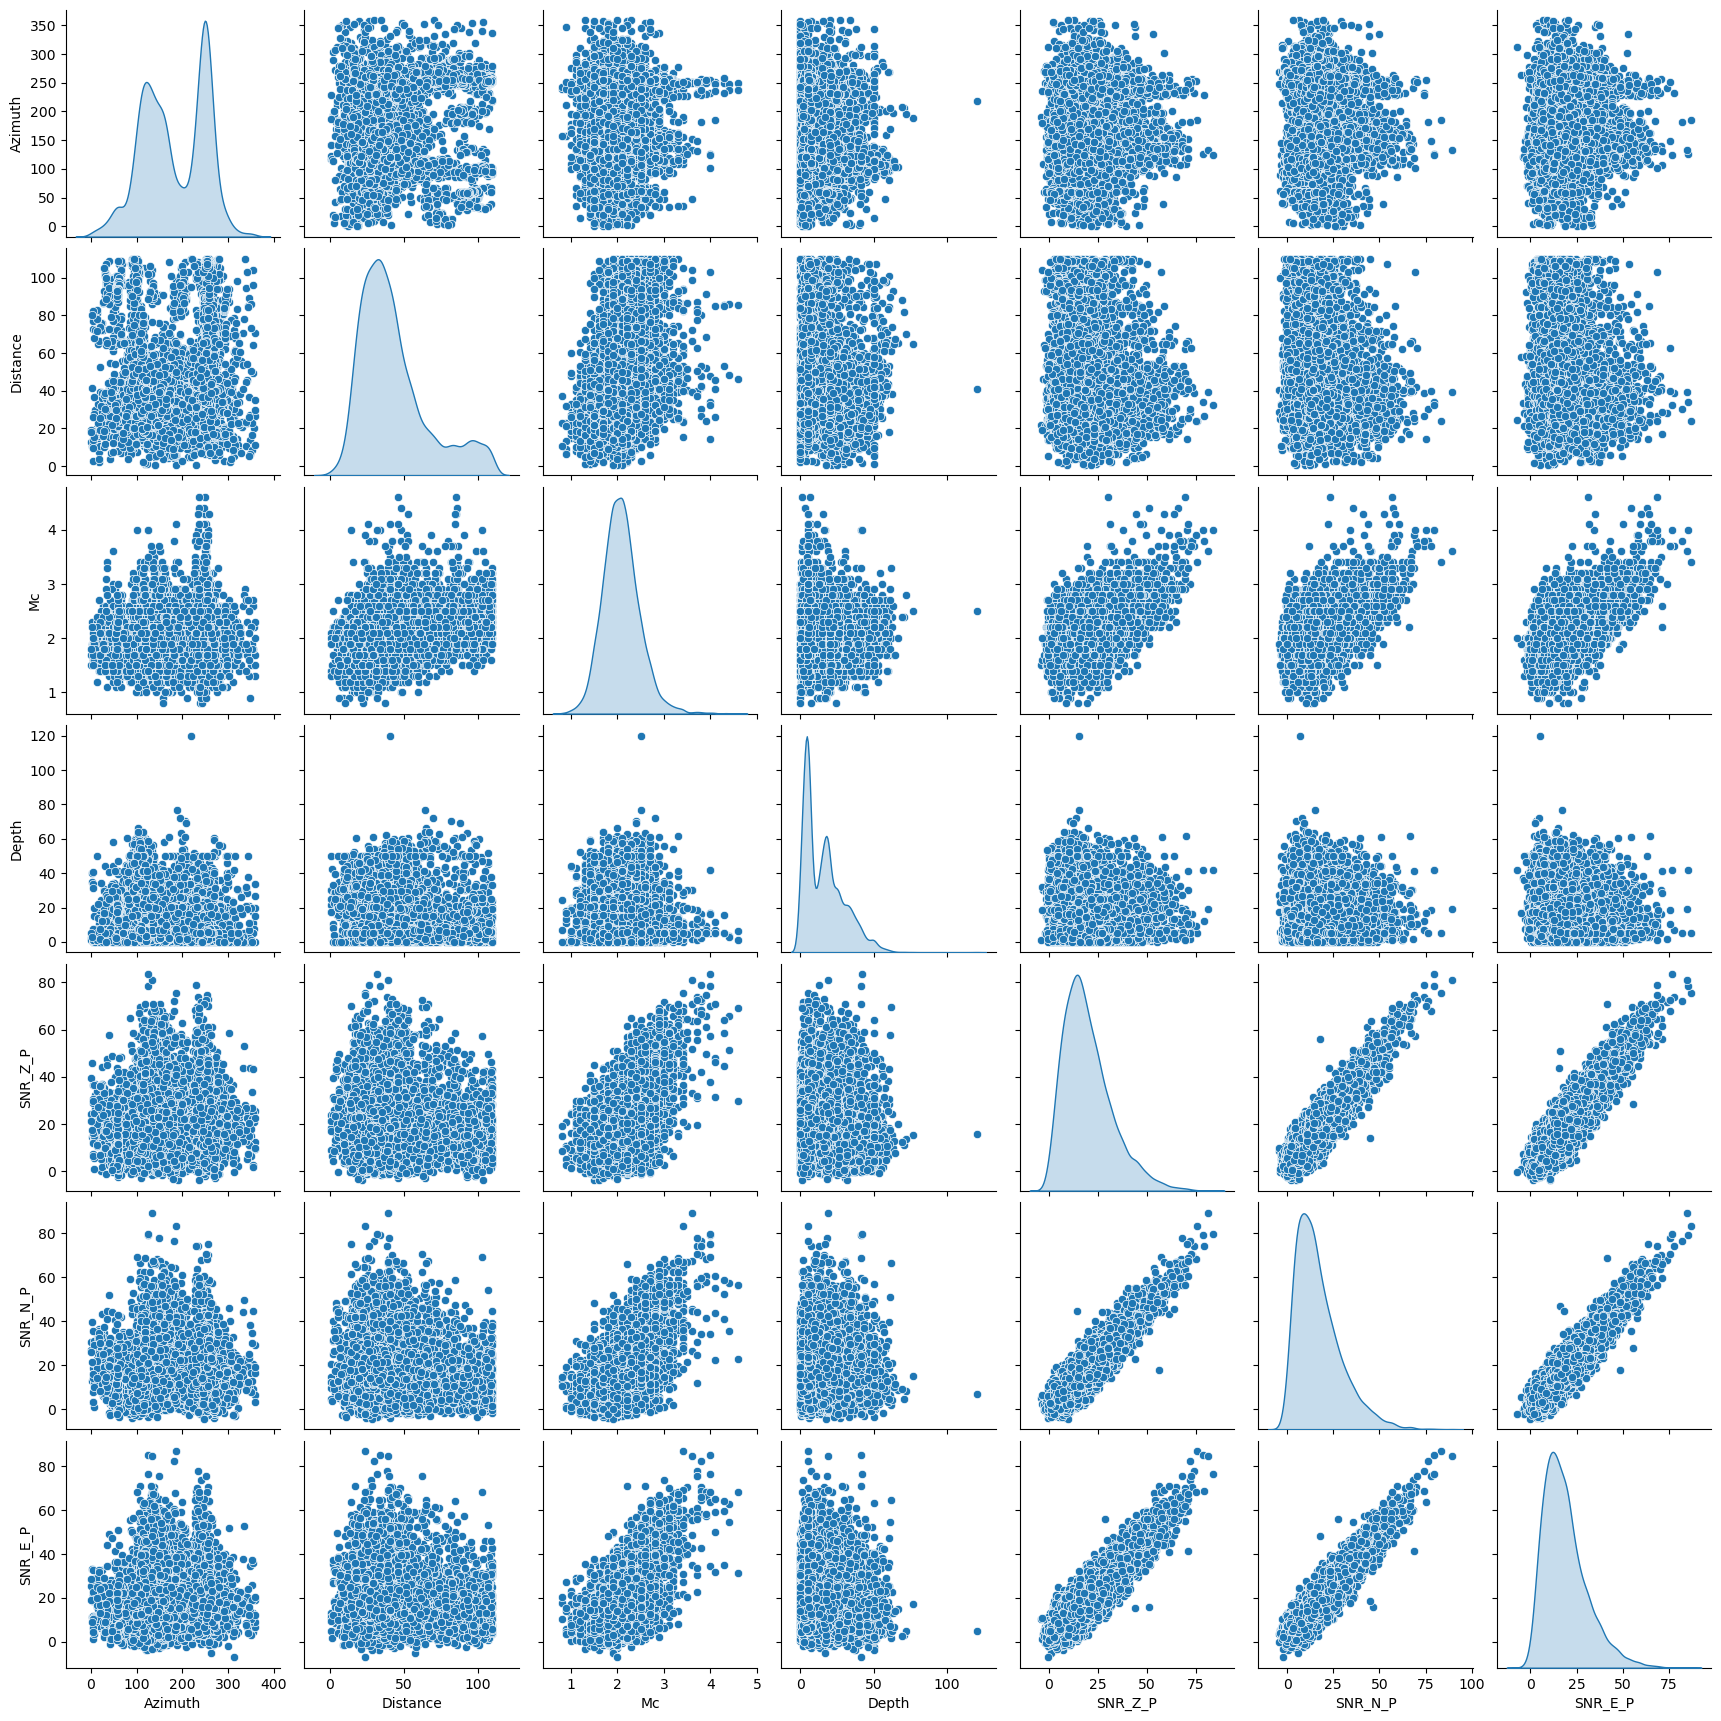

In [35]:
# Se busca correlacion en los datos y posibles outliers

sns.pairplot(dataset_valid[['Azimuth','Distance','Mc','Depth', 'SNR_Z_S', 'SNR_N_S', 'SNR_E_S','SNR_Z_P', 'SNR_N_P', 'SNR_E_P']], diag_kind="kde")

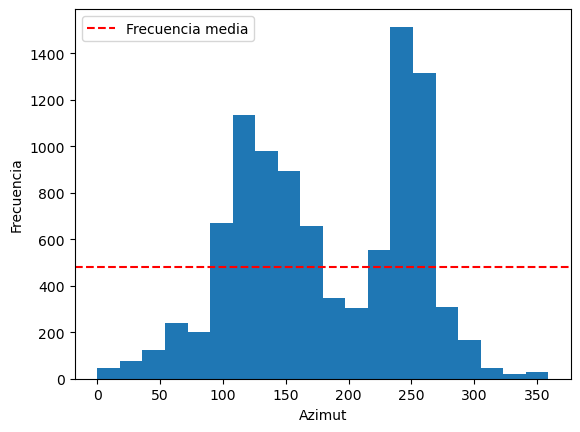

La frecuencia media de los valores de azimut es 481.30.


In [36]:
# Se hace un histograma de la variable a predecir "azimut"
frequencies, bins, _ = plt.hist(dataset_valid['Azimuth'], bins=20)
plt.xlabel('Azimut')
plt.ylabel('Frecuencia')

# Se calcula el valor medio de las frecuencias
mean_frequency = frequencies.mean()
plt.axhline(mean_frequency, color='r', linestyle='--', label='Frecuencia media')

plt.legend()
plt.show()

print(f'La frecuencia media de los valores de azimut es {mean_frequency:.2f}.')

In [37]:
# Se crea un dataframe por cada azimuth
list_azimuths = []
for n in range(360): 
    df_mask = dataset_valid['Azimuth'] == n
    list_azimuths.append(dataset_valid[df_mask])

In [38]:
# Se cuenta la cantidad de datos que hay cada azimuth e imprimo (valor del azimuth, cantidad, )
azimuth_quantity = []
for n in range(360): 
    azimuth_quantity.append(len(list_azimuths[n]))
    
#azimuth_quantity.index(max(azimuth_quantity)),max(azimuth_quantity)
azimuth_quantity
for indice, cantidad in enumerate(azimuth_quantity):
    print(f"Azimuth {indice}: {cantidad}")

Azimuth 0: 2
Azimuth 1: 1
Azimuth 2: 1
Azimuth 3: 2
Azimuth 4: 7
Azimuth 5: 2
Azimuth 6: 3
Azimuth 7: 5
Azimuth 8: 1
Azimuth 9: 3
Azimuth 10: 1
Azimuth 11: 0
Azimuth 12: 0
Azimuth 13: 5
Azimuth 14: 5
Azimuth 15: 2
Azimuth 16: 3
Azimuth 17: 3
Azimuth 18: 1
Azimuth 19: 6
Azimuth 20: 4
Azimuth 21: 3
Azimuth 22: 3
Azimuth 23: 4
Azimuth 24: 6
Azimuth 25: 1
Azimuth 26: 2
Azimuth 27: 3
Azimuth 28: 1
Azimuth 29: 3
Azimuth 30: 6
Azimuth 31: 2
Azimuth 32: 6
Azimuth 33: 8
Azimuth 34: 9
Azimuth 35: 8
Azimuth 36: 5
Azimuth 37: 2
Azimuth 38: 3
Azimuth 39: 9
Azimuth 40: 4
Azimuth 41: 7
Azimuth 42: 6
Azimuth 43: 7
Azimuth 44: 6
Azimuth 45: 8
Azimuth 46: 8
Azimuth 47: 9
Azimuth 48: 16
Azimuth 49: 8
Azimuth 50: 5
Azimuth 51: 5
Azimuth 52: 9
Azimuth 53: 6
Azimuth 54: 9
Azimuth 55: 12
Azimuth 56: 7
Azimuth 57: 18
Azimuth 58: 15
Azimuth 59: 57
Azimuth 60: 29
Azimuth 61: 12
Azimuth 62: 4
Azimuth 63: 5
Azimuth 64: 7
Azimuth 65: 7
Azimuth 66: 16
Azimuth 67: 8
Azimuth 68: 5
Azimuth 69: 9
Azimuth 70: 8
Azimuth 

In [39]:
list_azimuths[250]

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
129   2014-07-02T04:40:46.100000Z    19.975    -75.755   18.9  0.7  1.5  2.3   
160   2011-08-02T08:33:20.600000Z    19.890    -76.000    0.0  0.1  0.9  2.1   
226   2021-11-03T01:39:29.400000Z    19.873    -76.060   12.3  0.3  0.8  2.1   
420   2017-05-04T12:31:23.300000Z    19.938    -75.862    6.6  0.3  1.2  1.9   
517   2016-11-05T08:35:56.800000Z    19.797    -76.292    5.0  0.4  1.1  2.3   
...                           ...       ...        ...    ...  ...  ...  ...   
8912  2019-06-30T15:27:00.100000Z    19.935    -75.872    5.7  0.1  0.9  1.6   
8942  2021-05-30T21:34:27.200000Z    19.875    -76.040    5.9  0.1  0.3  1.4   
9027  2023-03-01T03:06:03.900000Z    19.866    -76.078   15.9  0.1  0.4  1.8   
9343  2013-07-01T05:53:36.700000Z    19.888    -76.003    7.1  0.5  1.5  1.9   
9344  2013-07-01T05:53:36.700000Z    19.888    -76.003    7.1  0.5  1.5  1.9   

        MW                       P_time                       S_time  \
129    2.0  2014-07-02T04:40:48.780000Z  2014-07-02T04:40:52.130000Z   
160   None  2011-08-02T08:33:26.940000Z  2011-08-02T08:33:31.880000Z   
226    2.2  2021-11-03T01:39:35.880000Z  2021-11-03T01:39:41.000000Z   
420    1.8  2017-05-04T12:31:26.360000Z  2017-05-04T12:31:29.730000Z   
517    1.8  2016-11-05T08:36:07.620000Z  2016-11-05T08:36:15.730000Z   
...    ...                          ...                          ...   
8912   1.6  2019-06-30T15:27:03.800000Z  2019-06-30T15:27:06.750000Z   
8942  None  2021-05-30T21:34:33.680000Z  2021-05-30T21:34:38.500000Z   
9027  None  2023-03-01T03:06:10.900000Z  2023-03-01T03:06:16.400000Z   
9343  None  2013-07-01T05:53:43.980000Z                         None   
9344  None  2013-07-01T05:53:44.000000Z                         None   

      Distance Back_Azimuth  Azimuth                       WAV_file  \
129        6.5           70    250.0             20140702044043.EVT   
160       33.8           70    250.0             20110802083322.EVT   
226       40.3           70    250.0    2021-11-03-0139-09.CUBA_056   
420       18.5           70    250.0  2017-05-04-1231-05S.MAN___021   
517       66.1           70    250.0  2016-11-05-0835-55S.MAN___018   
...        ...          ...      ...                            ...   
8912      19.6           70    250.0  2019-06-30-1526-52S.MAN___018   
8942      38.3           70    250.0    2021-05-30-2134-07.CUBA_056   
9027      42.4           70    250.0    2023-03-01-0305-44.CUBA_056   
9343      34.2           70    250.0             20130701055329.EVT   
9344      34.2           70    250.0             20130701055329.EVT   

                                              RCC_OBSPY  \
129   [(-7.35963820466e-10, -1.96976455889e-10, 1.13...   
160   [(1.00599775081e-09, 1.93693367021e-09, 2.2782...   
226   [(1.69215424782e-09, 2.50791242561e-09, 2.6093...   
420   [(1.25702647271e-11, -2.78538174477e-09, -4.64...   
517   [(-2.01141097676e-10, -1.63449983622e-10, -4.4...   
...                                                 ...   
8912  [(-5.11023426467e-09, -5.20127338414e-09, -5.2...   
8942  [(8.21637329879e-09, -1.79789361269e-09, -9.99...   
9027  [(-2.20553351275e-09, -1.37186786076e-09, -3.7...   
9343  [(2.87051275466e-09, 3.07100427676e-09, 3.3263...   
9344  [(3.32631667575e-09, 3.39146933264e-09, 2.8239...   

                                                 Z_data  \
129   [-7.35963820466e-10, -1.96976455889e-10, 1.139...   
160   [1.00599775081e-09, 1.93693367021e-09, 2.27829...   
226   [1.69215424782e-09, 2.50791242561e-09, 2.60932...   
420   [1.25702647271e-11, -2.78538174477e-09, -4.644...   
517   [-2.01141097676e-10, -1.63449983622e-10, -4.47...   
...                                                 ...   
8912  [-5.11023426467e-09, -5.20127338414e-09, -5.27...   
8942  [8.21637329879e-09, -1.79789361269e-09, -9.995...   
9027  [-2.20553351275e-09, -1.37186786076e-09, -3.74...   
9343  [2.87051275466e-09, 3.07100427676e-09,

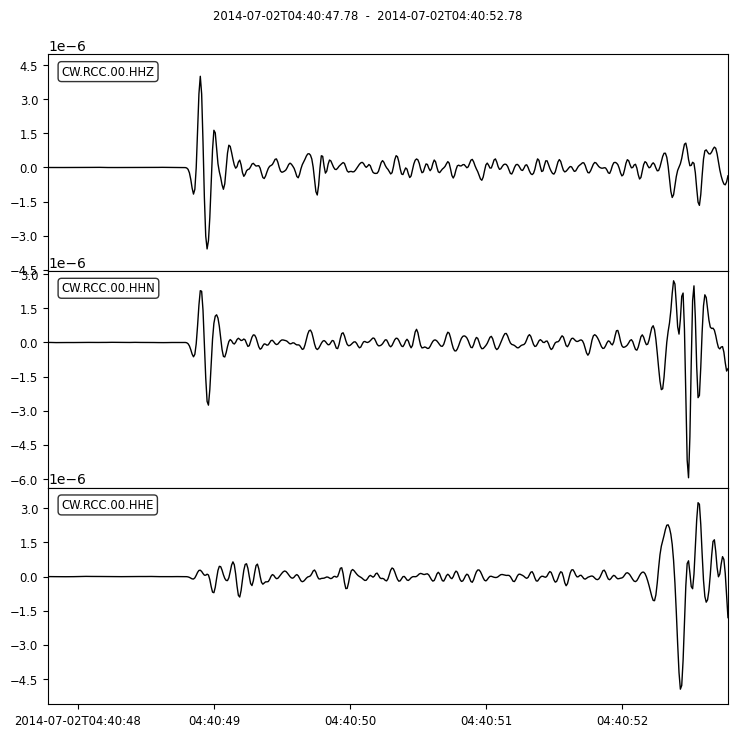

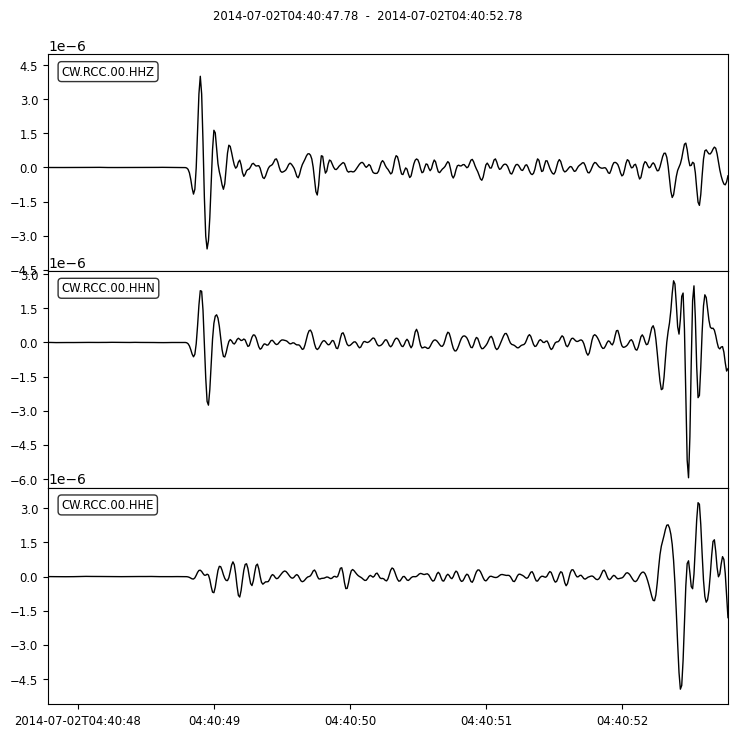

In [40]:
#Ploteo el evento
list_azimuths[250].iloc[0]['RCC_OBSPY'].plot()

In [41]:
container_path= "C:\\TESIS\\data_preprocessing\\SNR_Datasets_final\\"
dataset_valid.to_pickle(container_path +'dataset_valid.pkl')


In [42]:
# Aqui comienza la 3ra notebook

In [43]:
#Codigo para crear , los datos de entrada X1, X2 y de salida y1=cos(azimuth) , y2 = sin(azimuth)

In [44]:
# Se importa el conjunto de datos 
dataset = dataset_valid.copy()
dataset.shape

(9626, 32)

In [45]:
dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2020-07-01T00:01:20.800000Z    19.861    -75.996   11.9  0.2  1.3  2.5   
1     2015-09-01T00:06:11.500000Z    19.817    -75.486   27.0  0.4  1.7  2.3   
2     2022-08-01T00:06:41.000000Z    19.844    -75.910    4.9  0.6  2.1  3.0   
3     2022-08-01T00:06:40.800000Z    19.830    -75.901    7.1  0.3  2.0  3.3   
4     2018-06-01T00:27:32.900000Z    19.891    -75.590   16.7  0.1  0.9  1.8   
...                           ...       ...        ...    ...  ...  ...  ...   
9621  2023-04-04T05:08:30.100000Z    20.427    -74.966   17.3  0.1  1.8  NaN   
9622  2023-04-04T06:33:37.200000Z    20.439    -74.933   19.0  0.1  2.0  2.3   
9623  2023-04-04T08:57:49.700000Z    20.439    -74.940   17.6  0.1  1.8  NaN   
9624  2023-03-05T19:51:23.400000Z    19.877    -74.769   25.1  0.4  2.3  3.1   
9625  2023-06-20T17:41:44.100000Z    20.274    -76.443    0.0  0.2  0.7  2.0   

        MW                       P_time                       S_time  \
0     None  2020-07-01T00:01:26.500000Z  2020-07-01T00:01:30.800000Z   
1      2.0  2015-09-01T00:06:17.250000Z  2015-09-01T00:06:21.900000Z   
2     None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z   
3     None  2022-08-01T00:06:45.600000Z  2022-08-01T00:06:49.500000Z   
4      1.6  2018-06-01T00:27:36.710000Z  2018-06-01T00:27:39.420000Z   
...    ...                          ...                          ...   
9621  None  2023-04-04T05:08:43.900000Z                         None   
9622  None  2023-04-04T06:33:51.300000Z                         None   
9623  None  2023-04-04T08:58:03.900000Z                         None   
9624  None  2023-03-05T19:51:37.900000Z                         None   
9625  None  2023-06-20T17:41:58.380000Z                         None   

      Distance Back_Azimuth  Azimuth                       WAV_file  \
0         34.6           65    245.0    2020-07-01-0001-00.CUBA_056   
1         29.6          312    132.0             20150901000609.EVT   
2         27.9           53    233.0    2022-08-01-0006-20.CUBA_056   
3         28.1           49    229.0    2022-08-01-0006-20.CUBA_056   
4         16.0          316    136.0  2018-06-01-0027-15S.MAN___009   
...        ...          ...      ...                            ...   
9621      90.0          238     58.0    2023-04-04-0508-10.CUBA_056   
9622      93.6          239     59.0    2023-04-04-0633-17.CUBA_056   
9623      93.1          238     58.0    2023-04-04-0857-29.CUBA_056   
9624      97.9          278     98.0    2023-03-05-1951-03.CUBA_056   
9625      83.9          111    291.0    2023-06-20-1741-24.CUBA_056   

                                              RCC_OBSPY  \
0     [(-1.69249939969e-09, -2.42450165237e-09, -1.9...   
1     [(-5.71588468654e-10, 3.24444303081e-10, 1.090...   
2     [(2.24567765802e-08, 2.06936608348e-08, 1.7984...   
3     [(2.24567765802e-08, 2.06936608348e-08, 1.7984...   
4     [(9.31086745054e-09, 6.80617856677e-09, 3.2806...   
...                                                 ...   
9621  [(1.99594764545e-09, 6.53269041608e-10, -4.744...   
9622  [(-6.41504442472e-11, -8.93601735e-10, -1.1292...   
9623  [(-3.79067100314e-09, -4.32119691503e-09, -4.4...   
9624  [(7.49221203482e-09, 3.73242541797e-09, -1.114...   
9625  [(9.18597888861e-09, 9.43240117546e-09, 7.9945...   

                                                 Z_data  \
0     [-1.69249939969e-09, -2.42450165237e-09, -1.93...   
1     [-5.71588468654e-10, 3.24444303081e-10, 1.0905...   
2     [2.24567765802e-08, 2.06936608348e-08, 1.79847...   
3     [2.24567765802e-08, 2.06936608348e-08, 1.79847...   
4     [9.31086745054e-09, 6.80617856677e-09, 3.28062...   
...                                                 ...   
9621  [1.99594764545e-09, 6.53269041608e-10, -4.7440...   
9622  [-6.41504442472e-11, -8.93601735e-10, -1.12926...   
9623  [-3.79067100314e-09, -4.32119691503e-09, -4.43...   
9624  [7.49221203482e-09, 3.73242541797e-09,

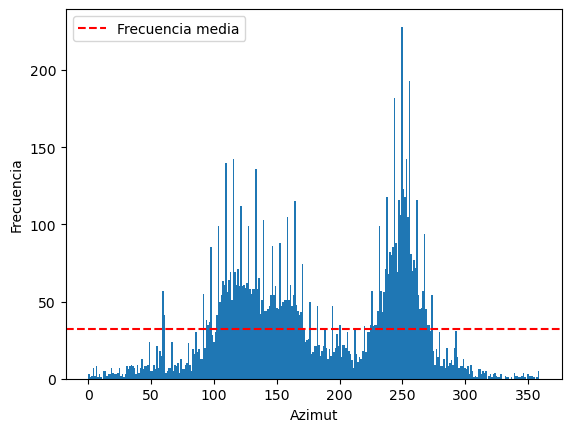

La frecuencia media de los valores de azimut es 32.09.


In [46]:
# Se hace un histograma de la variable a predecir "azimut en el DataSet "
frequencies, bins, _ = plt.hist(dataset['Azimuth'], bins=300)
plt.xlabel('Azimut')
plt.ylabel('Frecuencia')

# Se calcula el valor medio de las frecuencias
mean_frequency = frequencies.mean()
plt.axhline(mean_frequency, color='r', linestyle='--', label='Frecuencia media')
#plt.title('Distribución de la variable a predecir en el Conjunto de Entrenamiento')
plt.legend()
plt.show()
print(f'La frecuencia media de los valores de azimut es {mean_frequency:.2f}.')

In [47]:
#Me quedo con los azimuth en el rango 90- 270

In [48]:
# Elimino los eventos con Azimuth 0 a 90

indexNames = dataset[ ((dataset['Azimuth'] < 90))].index
dataset.drop(indexNames , inplace=True)
#sns.pairplot(dataset[['Azimuth','Distance','Mc','Depth']], diag_kind="kde")
dataset.shape

(8944, 32)

In [49]:
# Elimino los eventos con Azimuth 270 a 359

indexNames = dataset[ ((dataset['Azimuth'] > 270))].index
dataset.drop(indexNames , inplace=True)
#sns.pairplot(dataset[['Azimuth','Distance','Mc','Depth']], diag_kind="kde")
dataset.shape

(8409, 32)

In [50]:
# Elimino los Azimuts de los que se tiene menos de dos muestras
class_counts = dataset["Azimuth"].value_counts()
classes_to_remove = class_counts[class_counts < 2].index
filtered_dataset = dataset[~dataset["Azimuth"].isin(classes_to_remove)]

In [51]:
filtered_dataset.shape

(8409, 32)

In [52]:
# Definir las variables para la estratificación
features = ["Azimuth", "Mc", "Distance", "Depth"]

# Dividir el dataframe en características (X) y variable objetivo (y)
X = filtered_dataset.drop("Azimuth", axis=1)
y = filtered_dataset["Azimuth"]

# Realizar la estratificación utilizando StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(sss.split(X,y))

# Obtener conjuntos de entrenamiento y prueba utilizando los índices generados
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6727, 31)
(1682, 31)
(6727,)
(1682,)


In [54]:
dataset_train_merged = X_train.join(y_train)

In [55]:
dataset_test_merged = X_test.join(y_test)

In [56]:
dataset_train_merged

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
8053  2022-12-24T12:30:19.400000Z    19.844    -75.602   14.6  0.0  0.3  2.0   
7580  2016-01-21T13:23:04.700000Z    19.880    -76.055    5.0  0.7  1.2  1.8   
4200  2016-01-14T20:31:18.700000Z    19.825    -76.049    5.1  0.4  1.4  2.1   
6944  2016-01-17T21:09:10.000000Z    19.784    -76.077    5.0  0.7  0.9  2.3   
104   2019-12-02T00:56:06.900000Z    19.889    -75.536   35.4  0.4  0.6  2.0   
...                           ...       ...        ...    ...  ...  ...  ...   
1934  2016-01-17T08:06:47.400000Z    19.825    -76.062    5.0  0.7  1.5  2.6   
6427  2014-02-14T10:34:39.500000Z    19.870    -75.512   40.5  0.1  0.7  2.0   
3869  2023-03-02T20:55:13.100000Z    19.871    -75.735   16.5  0.4  0.8  2.1   
7467  2014-02-20T21:54:28.000000Z    19.840    -75.010   62.7  0.3  1.0  2.2   
6728  2017-03-16T20:26:21.500000Z    19.847    -75.993    5.4  0.1  0.3  1.4   

        MW                       P_time                       S_time  \
8053  None  2022-12-24T12:30:23.400000Z  2022-12-24T12:30:26.300000Z   
7580  None  2016-01-21T13:23:10.950000Z  2016-01-21T13:23:16.770000Z   
4200   2.2  2016-01-14T20:31:24.820000Z  2016-01-14T20:31:30.440000Z   
6944  None  2016-01-17T21:09:17.490000Z  2016-01-17T21:09:23.730000Z   
104    1.9  2019-12-02T00:56:12.600000Z  2019-12-02T00:56:16.820000Z   
...    ...                          ...                          ...   
1934  None  2016-01-17T08:06:53.640000Z  2016-01-17T08:06:58.820000Z   
6427   1.9  2014-02-14T10:34:46.190000Z  2014-02-14T10:34:51.140000Z   
3869  None  2023-03-02T20:55:16.300000Z  2023-03-02T20:55:19.200000Z   
7467   2.4  2014-02-20T21:54:41.400000Z  2014-02-20T21:54:51.120000Z   
6728  None  2017-03-16T20:26:27.490000Z  2017-03-16T20:26:32.110000Z   

      Distance Back_Azimuth                       WAV_file  \
8053      19.4          329    2022-12-24-1229-59.CUBA_056   
7580      39.6           71  2016-01-21-1323-00S.MAN___013   
4200      41.4           63  2016-01-14-2031-03S.MAN___015   
6944      46.2           60  2016-01-17-2109-00S.MAN___022   
104       20.5          305    2019-12-02-0055-47.CUBA_056   
...        ...          ...                            ...   
1934      42.6           64  2016-01-17-0806-00S.MAN___033   
6427      23.8          306             20140214103439.EVT   
3869      14.3           16    2023-03-02-2054-53.CUBA_056   
7467      73.9          284             20140220215425.EVT   
6728      35.1           62  2017-03-16-2026-15S.MAN___009   

                                              RCC_OBSPY  \
8053  [(-6.58244709002e-10, -8.83411715369e-10, -1.6...   
7580  [(-1.84270330323e-09, -2.83078237705e-09, -3.0...   
4200  [(8.51760356644e-09, 1.04098560803e-08, 1.3062...   
6944  [(-9.95932550812e-09, -1.17992354243e-08, -1.2...   
104   [(1.99764876356e-09, 2.72145625608e-09, 3.9521...   
...                                                 ...   
1934  [(-3.50843517357e-09, -2.1932086972e-09, -6.60...   
6427  [(1.29645720753e-08, 1.18251028922e-08, 5.7500...   
3869  [(-1.01976257498e-08, -8.83234994239e-09, -8.2...   
7467  [(-7.77195203889e-09, -8.06137085379e-09, -6.8...   
6728  [(4.55874351471e-09, 6.29662698581e-09, 4.5800...   

                                                 Z_data  \
8053  [-6.58244709002e-10, -8.83411715369e-10, -1.66...   
7580  [-1.84270330323e-09, -2.83078237705e-09, -3.06...   
4200  [8.51760356644e-09, 1.04098560803e-08, 1.30620...   
6944  [-9.95932550812e-09, -1.17992354243e-08, -1.23...   
104   [1.99764876356e-09, 2.72145625608e-09, 3.95212...   
...                                                 ...   
1934  [-3.50843517357e-09, -2.1932086972e-09, -6.605...   
6427  [1.29645720753e-08, 1.18251028922e-08, 5.75002...   
3869  [-1.01976257498e-08, -8.83234994239e-09, -8.22...   
7467  [-7.77195203889e-09, -8.06137085379e-09, -6.89...   
6728  [4.55874351471e-09, 6.29662698581e-09, 4.58006...   

                                 

In [57]:
dataset_test_merged

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
4174  2016-01-11T23:11:50.300000Z    19.927    -75.456    0.0  0.5  0.1  1.7   
8585  2017-10-28T04:30:23.800000Z    19.897    -75.957   18.5  0.2  0.1  1.5   
4398  2017-03-30T22:22:56.500000Z    19.892    -76.011    2.1  0.5  0.9  1.7   
6477  2022-07-14T23:52:34.200000Z    19.799    -75.798    5.0  0.4  0.9  2.4   
4835  2020-07-02T19:01:55.300000Z    19.605    -75.874   24.2  0.1  0.4  1.8   
...                           ...       ...        ...    ...  ...  ...  ...   
9513  2013-12-15T22:23:02.400000Z    19.955    -75.839   23.1  0.7  1.3  1.8   
508   2018-03-05T07:51:19.400000Z    19.866    -75.500   32.3  0.3  1.1  2.1   
5602  2021-06-08T16:21:51.900000Z    19.823    -76.021    2.2  0.2  0.6  2.0   
7164  2014-11-19T01:35:00.000000Z    19.918    -75.639   34.2  0.0  0.2  2.0   
709   2019-06-07T02:19:16.000000Z    19.797    -75.277   22.9  0.2  0.8  1.8   

        MW                       P_time                       S_time  \
4174  None  2016-01-11T23:11:55.310000Z  2016-01-11T23:12:00.130000Z   
8585  None  2017-10-28T04:30:29.190000Z  2017-10-28T04:30:33.340000Z   
4398   1.5  2017-03-30T22:23:02.260000Z  2017-03-30T22:23:06.430000Z   
6477  None  2022-07-14T23:52:38.370000Z  2022-07-14T23:52:41.620000Z   
4835  None  2020-07-02T19:02:03.180000Z  2020-07-02T19:02:09.180000Z   
...    ...                          ...                          ...   
9513   1.9  2013-12-15T22:23:06.620000Z                         None   
508   None  2018-03-05T07:51:25.260000Z  2018-03-05T07:51:29.600000Z   
5602  None  2021-06-08T16:21:58.800000Z  2021-06-08T16:22:03.970000Z   
7164  None  2014-11-19T01:35:05.200000Z  2014-11-19T01:35:09.170000Z   
709   None  2019-06-07T02:19:24.110000Z  2019-06-07T02:19:29.880000Z   

      Distance Back_Azimuth                       WAV_file  \
4174      26.2          287  2016-01-11-2311-08S.MAN___009   
8585      29.3           68  2017-10-28-0430-07S.MAN___012   
4398      34.9           71  2017-03-30-2222-55S.MAN___018   
6477      24.2           26    2022-07-14-2352-14.CUBA_056   
4835      47.0           23    2020-07-02-1901-38.CUBA_056   
...        ...          ...                            ...   
9513      15.5           73             20131215222306.EVT   
508       25.1          305  2018-03-05-0751-05S.MAN___021   
5602      39.0           61    2021-06-08-1621-31.CUBA_056   
7164      10.5          325             20141119013504.EVT   
709       49.1          297  2019-06-07-0219-00S.MAN___015   

                                              RCC_OBSPY  \
4174  [(-8.38923581556e-09, -3.86343019325e-09, 5.37...   
8585  [(1.62945283305e-09, 7.80504817128e-10, 6.0749...   
4398  [(-3.25595104897e-09, -2.3942648618e-09, -2.38...   
6477  [(-4.33553513131e-09, -2.84023239199e-09, 5.39...   
4835  [(2.52357137927e-09, -5.48231628668e-10, -4.50...   
...                                                 ...   
9513  [(-1.20259670132e-08, -1.22730113296e-08, -1.1...   
508   [(-3.24420126817e-09, -4.09731094375e-09, -4.1...   
5602  [(1.33401187439e-08, 9.27335699281e-09, 4.8848...   
7164  [(1.45098217944e-09, 1.20760557523e-09, 2.6423...   
709   [(2.2281650947e-09, 4.48538908675e-09, 5.02406...   

                                                 Z_data  \
4174  [-8.38923581556e-09, -3.86343019325e-09, 5.374...   
8585  [1.62945283305e-09, 7.80504817128e-10, 6.07494...   
4398  [-3.25595104897e-09, -2.3942648618e-09, -2.385...   
6477  [-4.33553513131e-09, -2.84023239199e-09, 5.398...   
4835  [2.52357137927e-09, -5.48231628668e-10, -4.505...   
...                                                 ...   
9513  [-1.20259670132e-08, -1.22730113296e-08, -1.11...   
508   [-3.24420126817e-09, -4.09731094375e-09, -4.15...   
5602  [1.33401187439e-08, 9.27335699281e-09, 4.88483...   
7164  [1.45098217944e-09, 1.20760557523e-09, 2.64239...   
709   [2.2281650947e-09, 4.48538908675e-09, 5.024060...   

                                 

In [58]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_test = dataset_test_merged.reset_index(drop=True)
dataset_test

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2016-01-11T23:11:50.300000Z    19.927    -75.456    0.0  0.5  0.1  1.7   
1     2017-10-28T04:30:23.800000Z    19.897    -75.957   18.5  0.2  0.1  1.5   
2     2017-03-30T22:22:56.500000Z    19.892    -76.011    2.1  0.5  0.9  1.7   
3     2022-07-14T23:52:34.200000Z    19.799    -75.798    5.0  0.4  0.9  2.4   
4     2020-07-02T19:01:55.300000Z    19.605    -75.874   24.2  0.1  0.4  1.8   
...                           ...       ...        ...    ...  ...  ...  ...   
1677  2013-12-15T22:23:02.400000Z    19.955    -75.839   23.1  0.7  1.3  1.8   
1678  2018-03-05T07:51:19.400000Z    19.866    -75.500   32.3  0.3  1.1  2.1   
1679  2021-06-08T16:21:51.900000Z    19.823    -76.021    2.2  0.2  0.6  2.0   
1680  2014-11-19T01:35:00.000000Z    19.918    -75.639   34.2  0.0  0.2  2.0   
1681  2019-06-07T02:19:16.000000Z    19.797    -75.277   22.9  0.2  0.8  1.8   

        MW                       P_time                       S_time  \
0     None  2016-01-11T23:11:55.310000Z  2016-01-11T23:12:00.130000Z   
1     None  2017-10-28T04:30:29.190000Z  2017-10-28T04:30:33.340000Z   
2      1.5  2017-03-30T22:23:02.260000Z  2017-03-30T22:23:06.430000Z   
3     None  2022-07-14T23:52:38.370000Z  2022-07-14T23:52:41.620000Z   
4     None  2020-07-02T19:02:03.180000Z  2020-07-02T19:02:09.180000Z   
...    ...                          ...                          ...   
1677   1.9  2013-12-15T22:23:06.620000Z                         None   
1678  None  2018-03-05T07:51:25.260000Z  2018-03-05T07:51:29.600000Z   
1679  None  2021-06-08T16:21:58.800000Z  2021-06-08T16:22:03.970000Z   
1680  None  2014-11-19T01:35:05.200000Z  2014-11-19T01:35:09.170000Z   
1681  None  2019-06-07T02:19:24.110000Z  2019-06-07T02:19:29.880000Z   

      Distance Back_Azimuth                       WAV_file  \
0         26.2          287  2016-01-11-2311-08S.MAN___009   
1         29.3           68  2017-10-28-0430-07S.MAN___012   
2         34.9           71  2017-03-30-2222-55S.MAN___018   
3         24.2           26    2022-07-14-2352-14.CUBA_056   
4         47.0           23    2020-07-02-1901-38.CUBA_056   
...        ...          ...                            ...   
1677      15.5           73             20131215222306.EVT   
1678      25.1          305  2018-03-05-0751-05S.MAN___021   
1679      39.0           61    2021-06-08-1621-31.CUBA_056   
1680      10.5          325             20141119013504.EVT   
1681      49.1          297  2019-06-07-0219-00S.MAN___015   

                                              RCC_OBSPY  \
0     [(-8.38923581556e-09, -3.86343019325e-09, 5.37...   
1     [(1.62945283305e-09, 7.80504817128e-10, 6.0749...   
2     [(-3.25595104897e-09, -2.3942648618e-09, -2.38...   
3     [(-4.33553513131e-09, -2.84023239199e-09, 5.39...   
4     [(2.52357137927e-09, -5.48231628668e-10, -4.50...   
...                                                 ...   
1677  [(-1.20259670132e-08, -1.22730113296e-08, -1.1...   
1678  [(-3.24420126817e-09, -4.09731094375e-09, -4.1...   
1679  [(1.33401187439e-08, 9.27335699281e-09, 4.8848...   
1680  [(1.45098217944e-09, 1.20760557523e-09, 2.6423...   
1681  [(2.2281650947e-09, 4.48538908675e-09, 5.02406...   

                                                 Z_data  \
0     [-8.38923581556e-09, -3.86343019325e-09, 5.374...   
1     [1.62945283305e-09, 7.80504817128e-10, 6.07494...   
2     [-3.25595104897e-09, -2.3942648618e-09, -2.385...   
3     [-4.33553513131e-09, -2.84023239199e-09, 5.398...   
4     [2.52357137927e-09, -5.48231628668e-10, -4.505...   
...                                                 ...   
1677  [-1.20259670132e-08, -1.22730113296e-08, -1.11...   
1678  [-3.24420126817e-09, -4.09731094375e-09, -4.15...   
1679  [1.33401187439e-08, 9.27335699281e-09, 4.88483...   
1680  [1.45098217944e-09, 1.20760557523e-09, 2.64239...   
1681  [2.2281650947e-09, 4.48538908675e-09, 5.024060...   

                                 

In [59]:
#Restablezco los indices del dataset eliminando las discontinuidades por las filas eliminadas
dataset_train = dataset_train_merged.reset_index(drop=True)
dataset_train

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2022-12-24T12:30:19.400000Z    19.844    -75.602   14.6  0.0  0.3  2.0   
1     2016-01-21T13:23:04.700000Z    19.880    -76.055    5.0  0.7  1.2  1.8   
2     2016-01-14T20:31:18.700000Z    19.825    -76.049    5.1  0.4  1.4  2.1   
3     2016-01-17T21:09:10.000000Z    19.784    -76.077    5.0  0.7  0.9  2.3   
4     2019-12-02T00:56:06.900000Z    19.889    -75.536   35.4  0.4  0.6  2.0   
...                           ...       ...        ...    ...  ...  ...  ...   
6722  2016-01-17T08:06:47.400000Z    19.825    -76.062    5.0  0.7  1.5  2.6   
6723  2014-02-14T10:34:39.500000Z    19.870    -75.512   40.5  0.1  0.7  2.0   
6724  2023-03-02T20:55:13.100000Z    19.871    -75.735   16.5  0.4  0.8  2.1   
6725  2014-02-20T21:54:28.000000Z    19.840    -75.010   62.7  0.3  1.0  2.2   
6726  2017-03-16T20:26:21.500000Z    19.847    -75.993    5.4  0.1  0.3  1.4   

        MW                       P_time                       S_time  \
0     None  2022-12-24T12:30:23.400000Z  2022-12-24T12:30:26.300000Z   
1     None  2016-01-21T13:23:10.950000Z  2016-01-21T13:23:16.770000Z   
2      2.2  2016-01-14T20:31:24.820000Z  2016-01-14T20:31:30.440000Z   
3     None  2016-01-17T21:09:17.490000Z  2016-01-17T21:09:23.730000Z   
4      1.9  2019-12-02T00:56:12.600000Z  2019-12-02T00:56:16.820000Z   
...    ...                          ...                          ...   
6722  None  2016-01-17T08:06:53.640000Z  2016-01-17T08:06:58.820000Z   
6723   1.9  2014-02-14T10:34:46.190000Z  2014-02-14T10:34:51.140000Z   
6724  None  2023-03-02T20:55:16.300000Z  2023-03-02T20:55:19.200000Z   
6725   2.4  2014-02-20T21:54:41.400000Z  2014-02-20T21:54:51.120000Z   
6726  None  2017-03-16T20:26:27.490000Z  2017-03-16T20:26:32.110000Z   

      Distance Back_Azimuth                       WAV_file  \
0         19.4          329    2022-12-24-1229-59.CUBA_056   
1         39.6           71  2016-01-21-1323-00S.MAN___013   
2         41.4           63  2016-01-14-2031-03S.MAN___015   
3         46.2           60  2016-01-17-2109-00S.MAN___022   
4         20.5          305    2019-12-02-0055-47.CUBA_056   
...        ...          ...                            ...   
6722      42.6           64  2016-01-17-0806-00S.MAN___033   
6723      23.8          306             20140214103439.EVT   
6724      14.3           16    2023-03-02-2054-53.CUBA_056   
6725      73.9          284             20140220215425.EVT   
6726      35.1           62  2017-03-16-2026-15S.MAN___009   

                                              RCC_OBSPY  \
0     [(-6.58244709002e-10, -8.83411715369e-10, -1.6...   
1     [(-1.84270330323e-09, -2.83078237705e-09, -3.0...   
2     [(8.51760356644e-09, 1.04098560803e-08, 1.3062...   
3     [(-9.95932550812e-09, -1.17992354243e-08, -1.2...   
4     [(1.99764876356e-09, 2.72145625608e-09, 3.9521...   
...                                                 ...   
6722  [(-3.50843517357e-09, -2.1932086972e-09, -6.60...   
6723  [(1.29645720753e-08, 1.18251028922e-08, 5.7500...   
6724  [(-1.01976257498e-08, -8.83234994239e-09, -8.2...   
6725  [(-7.77195203889e-09, -8.06137085379e-09, -6.8...   
6726  [(4.55874351471e-09, 6.29662698581e-09, 4.5800...   

                                                 Z_data  \
0     [-6.58244709002e-10, -8.83411715369e-10, -1.66...   
1     [-1.84270330323e-09, -2.83078237705e-09, -3.06...   
2     [8.51760356644e-09, 1.04098560803e-08, 1.30620...   
3     [-9.95932550812e-09, -1.17992354243e-08, -1.23...   
4     [1.99764876356e-09, 2.72145625608e-09, 3.95212...   
...                                                 ...   
6722  [-3.50843517357e-09, -2.1932086972e-09, -6.605...   
6723  [1.29645720753e-08, 1.18251028922e-08, 5.75002...   
6724  [-1.01976257498e-08, -8.83234994239e-09, -8.22...   
6725  [-7.77195203889e-09, -8.06137085379e-09, -6.89...   
6726  [4.55874351471e-09, 6.29662698581e-09, 4.58006...   

                                 

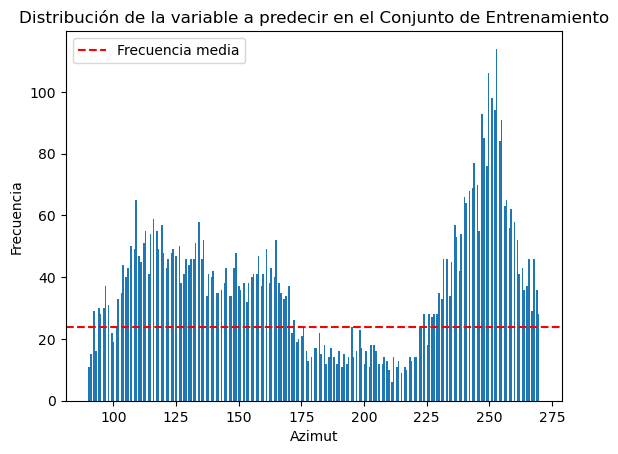

La frecuencia media de los valores de azimut es 24.02.


In [60]:
# Se hace un histograma de la variable a predecir "azimut en el Set de Training"
frequencies, bins, _ = plt.hist(dataset_train['Azimuth'], bins=280)
plt.xlabel('Azimut')
plt.ylabel('Frecuencia')

# Se calcula el valor medio de las frecuencias
mean_frequency = frequencies.mean()
plt.axhline(mean_frequency, color='r', linestyle='--', label='Frecuencia media')
plt.title('Distribución de la variable a predecir en el Conjunto de Entrenamiento')
plt.legend()
plt.show()
print(f'La frecuencia media de los valores de azimut es {mean_frequency:.2f}.')

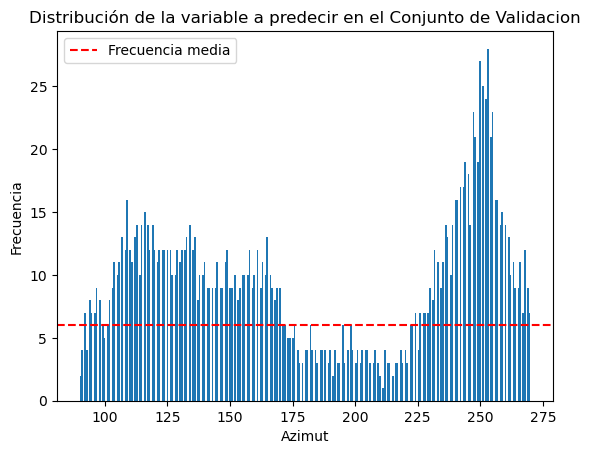

La frecuencia media de los valores de azimut es 6.01.


In [61]:
# Se hace un histograma de la variable a predecir "azimut en el set de Test"
frequencies, bins, _ = plt.hist(dataset_test['Azimuth'], bins=280)
plt.xlabel('Azimut')
plt.ylabel('Frecuencia')

# Se calcula el valor medio de las frecuencias
mean_frequency = frequencies.mean()
plt.axhline(mean_frequency, color='r', linestyle='--', label='Frecuencia media')
plt.title('Distribución de la variable a predecir en el Conjunto de Validacion')
plt.legend()
plt.show()

print(f'La frecuencia media de los valores de azimut es {mean_frequency:.2f}.')

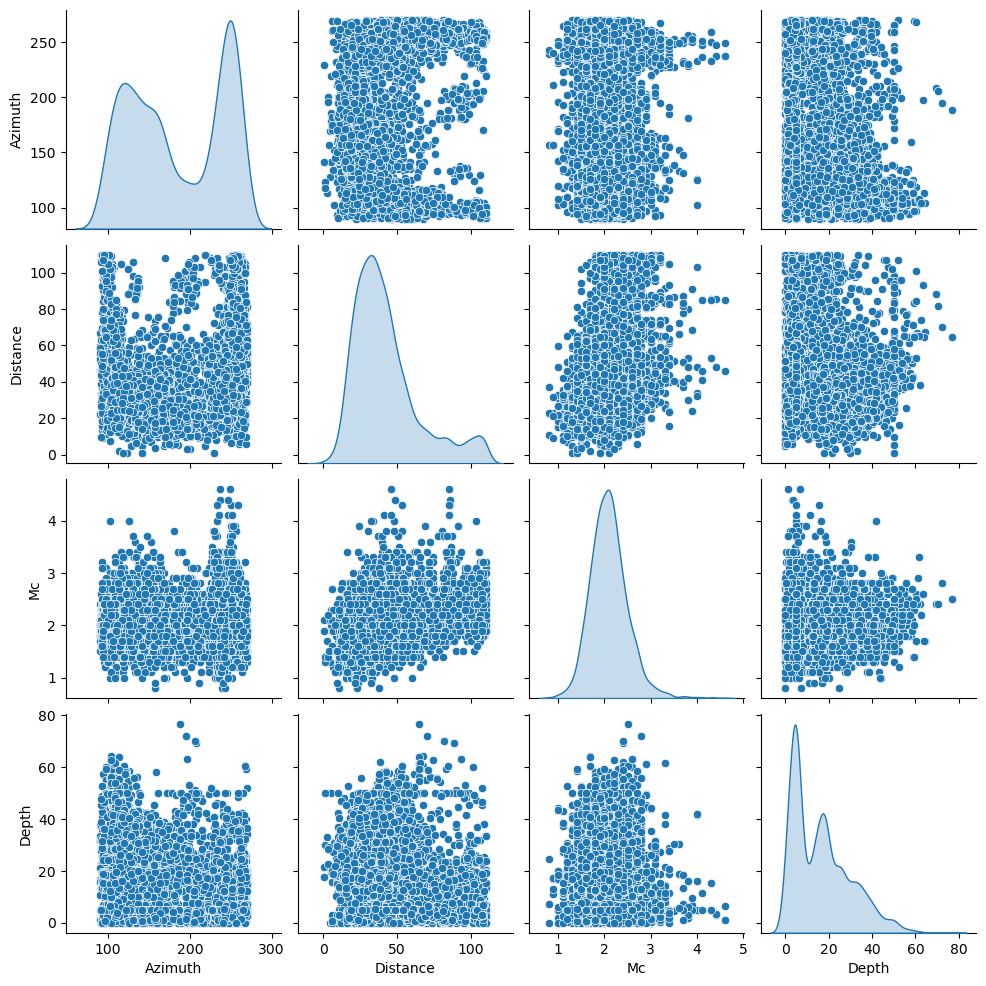

In [62]:
# Se muestra correlacion en los datos en el dataset de Test

#sns.pairplot(dataset_train[['Azimuth','Distance','Mc','Depth', 'SNR_Z_S', 'SNR_N_S', 'SNR_E_S','SNR_Z_P', 'SNR_N_P', 'SNR_E_P']], diag_kind="kde")
sns.pairplot(dataset_train[['Azimuth','Distance','Mc','Depth', ]], diag_kind="kde")

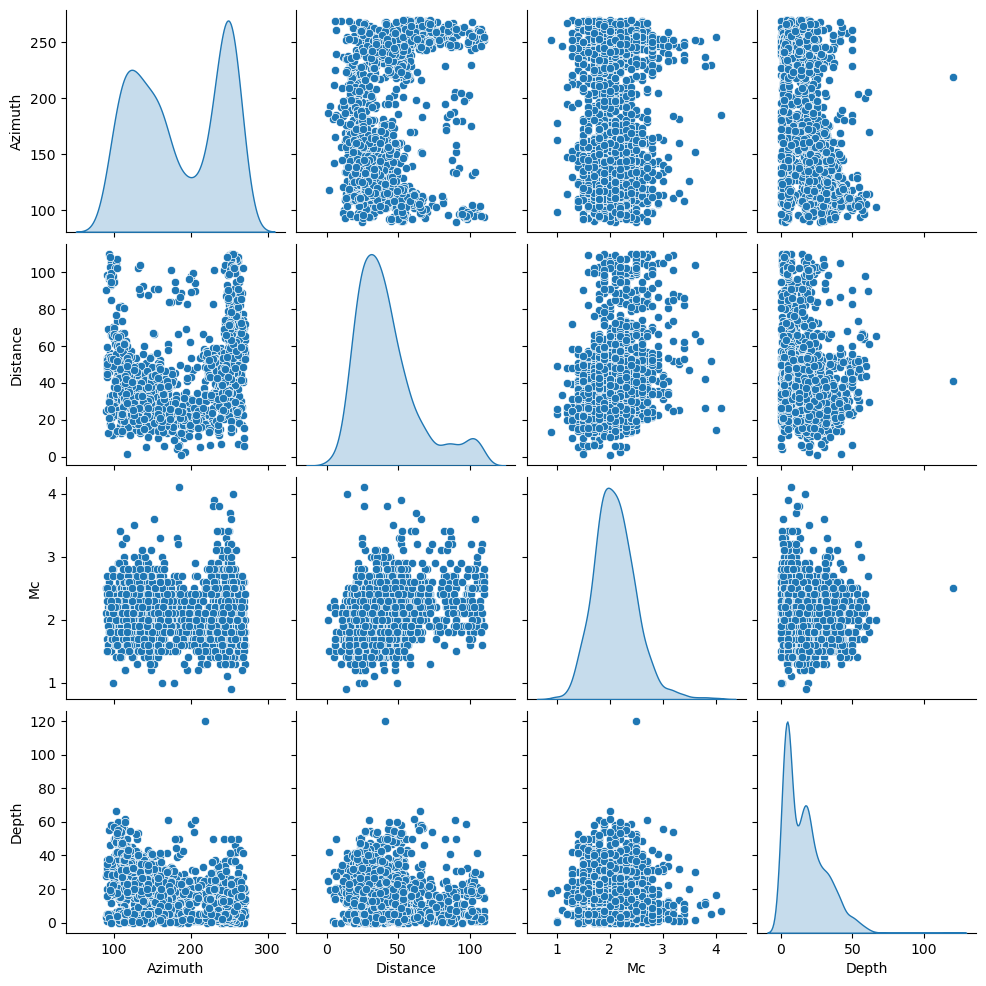

In [63]:
#sns.pairplot(dataset_test[['Azimuth','Distance','Mc','Depth', 'SNR_Z_S', 'SNR_N_S', 'SNR_E_S','SNR_Z_P', 'SNR_N_P', 'SNR_E_P']], diag_kind="kde")
sns.pairplot(dataset_test[['Azimuth','Distance','Mc','Depth', ]], diag_kind="kde")

In [64]:
#Para conocer la composicion del dataset de Validacion

In [65]:
# Se crea un dataframe por cada azimuth
list_azimuths_test = []
for n in range(360): 
    df_mask_test = dataset_test['Azimuth'] == n
    list_azimuths_test.append(dataset_test[df_mask_test])

In [66]:
# Se cuenta la cantidad de datos que hay cada azimuth e imprimo (valor del azimuth, cantidad, )
azimuth_quantity_test = []
for n in range(360): 
    azimuth_quantity_test.append(len(list_azimuths_test[n]))
#azimuth_quantity.index(max(azimuth_quantity)),max(azimuth_quantity)
for indice, cantidad in enumerate(azimuth_quantity_test):
    print(f"Azimuth {indice}: {cantidad}")

Azimuth 0: 0
Azimuth 1: 0
Azimuth 2: 0
Azimuth 3: 0
Azimuth 4: 0
Azimuth 5: 0
Azimuth 6: 0
Azimuth 7: 0
Azimuth 8: 0
Azimuth 9: 0
Azimuth 10: 0
Azimuth 11: 0
Azimuth 12: 0
Azimuth 13: 0
Azimuth 14: 0
Azimuth 15: 0
Azimuth 16: 0
Azimuth 17: 0
Azimuth 18: 0
Azimuth 19: 0
Azimuth 20: 0
Azimuth 21: 0
Azimuth 22: 0
Azimuth 23: 0
Azimuth 24: 0
Azimuth 25: 0
Azimuth 26: 0
Azimuth 27: 0
Azimuth 28: 0
Azimuth 29: 0
Azimuth 30: 0
Azimuth 31: 0
Azimuth 32: 0
Azimuth 33: 0
Azimuth 34: 0
Azimuth 35: 0
Azimuth 36: 0
Azimuth 37: 0
Azimuth 38: 0
Azimuth 39: 0
Azimuth 40: 0
Azimuth 41: 0
Azimuth 42: 0
Azimuth 43: 0
Azimuth 44: 0
Azimuth 45: 0
Azimuth 46: 0
Azimuth 47: 0
Azimuth 48: 0
Azimuth 49: 0
Azimuth 50: 0
Azimuth 51: 0
Azimuth 52: 0
Azimuth 53: 0
Azimuth 54: 0
Azimuth 55: 0
Azimuth 56: 0
Azimuth 57: 0
Azimuth 58: 0
Azimuth 59: 0
Azimuth 60: 0
Azimuth 61: 0
Azimuth 62: 0
Azimuth 63: 0
Azimuth 64: 0
Azimuth 65: 0
Azimuth 66: 0
Azimuth 67: 0
Azimuth 68: 0
Azimuth 69: 0
Azimuth 70: 0
Azimuth 71: 0
Az

In [67]:
# Se crea un dataframe por cada azimuth del dataset Train
list_azimuths_train = []
for n in range(360): 
    df_mask_train = dataset_train['Azimuth'] == n
    list_azimuths_train.append(dataset_train[df_mask_train])

In [68]:
# Se cuenta la cantidad de datos que hay cada azimuth e imprimo (valor del azimuth, cantidad, )
azimuth_quantity_train = []
for n in range(360): 
    azimuth_quantity_train.append(len(list_azimuths_train[n]))
for indice, cantidad in enumerate(azimuth_quantity_train):
    print(f"Azimuth {indice}: {cantidad}")

Azimuth 0: 0
Azimuth 1: 0
Azimuth 2: 0
Azimuth 3: 0
Azimuth 4: 0
Azimuth 5: 0
Azimuth 6: 0
Azimuth 7: 0
Azimuth 8: 0
Azimuth 9: 0
Azimuth 10: 0
Azimuth 11: 0
Azimuth 12: 0
Azimuth 13: 0
Azimuth 14: 0
Azimuth 15: 0
Azimuth 16: 0
Azimuth 17: 0
Azimuth 18: 0
Azimuth 19: 0
Azimuth 20: 0
Azimuth 21: 0
Azimuth 22: 0
Azimuth 23: 0
Azimuth 24: 0
Azimuth 25: 0
Azimuth 26: 0
Azimuth 27: 0
Azimuth 28: 0
Azimuth 29: 0
Azimuth 30: 0
Azimuth 31: 0
Azimuth 32: 0
Azimuth 33: 0
Azimuth 34: 0
Azimuth 35: 0
Azimuth 36: 0
Azimuth 37: 0
Azimuth 38: 0
Azimuth 39: 0
Azimuth 40: 0
Azimuth 41: 0
Azimuth 42: 0
Azimuth 43: 0
Azimuth 44: 0
Azimuth 45: 0
Azimuth 46: 0
Azimuth 47: 0
Azimuth 48: 0
Azimuth 49: 0
Azimuth 50: 0
Azimuth 51: 0
Azimuth 52: 0
Azimuth 53: 0
Azimuth 54: 0
Azimuth 55: 0
Azimuth 56: 0
Azimuth 57: 0
Azimuth 58: 0
Azimuth 59: 0
Azimuth 60: 0
Azimuth 61: 0
Azimuth 62: 0
Azimuth 63: 0
Azimuth 64: 0
Azimuth 65: 0
Azimuth 66: 0
Azimuth 67: 0
Azimuth 68: 0
Azimuth 69: 0
Azimuth 70: 0
Azimuth 71: 0
Az

In [69]:
# Se conforman el vector de entrada de Training X1_train, 
#Se escoge la ventana de tiempo a utilizar, 
#Se forma la entrada2 Matriz de Covarianza, Vector Propio y Valor Propio 

window_width=500
samples_number=len(dataset_train)
X1_train=np.empty(shape=[0,window_width,3])
for n in range(samples_number): 
    print('Procesando :',n)
    tmp=dataset_train.iloc[n]
    z_original= tmp['Z_data']    
    n_original= tmp['N_data']    
    e_original= tmp['E_data'] 
    z_max = np.max(z_original)
    n_max = np.max(n_original)
    e_max = np.max(e_original)
    print('z_max :',z_max)
    print('n_max :',n_max)
    print('e_max :',e_max)
    global_max = z_max
    if global_max < n_max :
        global_max = n_max
    if global_max < e_max :
        global_max = e_max
    print('global_max :',global_max)
    z_norm = z_original/global_max
    n_norm = n_original/global_max
    e_norm = e_original/global_max    
    new_z= z_norm[0: window_width]    
    new_n= n_norm[0: window_width]
    new_e= e_norm[0: window_width]    
    zne=np.dstack((new_z,new_n,new_e)) 
    X1_train=np.append(X1_train,zne, axis=0)     
print(X1_train.shape)

Procesando : 0
z_max : 3.03555543019e-07
n_max : 4.71085600235e-07
e_max : 1.80720252532e-07
global_max : 4.71085600235e-07
Procesando : 1
z_max : 1.38322273879e-07
n_max : 8.03619537363e-08
e_max : 8.52571246179e-08
global_max : 1.38322273879e-07
Procesando : 2
z_max : 1.04794360895e-07
n_max : 7.19456648505e-08
e_max : 8.33523287736e-08
global_max : 1.04794360895e-07
Procesando : 3
z_max : 2.49704071548e-07
n_max : 1.34742202731e-07
e_max : 1.98182061768e-07
global_max : 2.49704071548e-07
Procesando : 4
z_max : 1.4408004463e-07
n_max : 9.91611113846e-08
e_max : 2.32810045001e-07
global_max : 2.32810045001e-07
Procesando : 5
z_max : 4.19921716266e-08
n_max : 1.94368879426e-08
e_max : 1.5733283838e-08
global_max : 4.19921716266e-08
Procesando : 6
z_max : 4.87901740965e-07
n_max : 3.11071977742e-07
e_max : 3.74424473763e-07
global_max : 4.87901740965e-07
Procesando : 7
z_max : 2.32121331414e-07
n_max : 1.67133077487e-07
e_max : 1.20165912918e-07
global_max : 2.32121331414e-07
Procesando

Procesando : 197
z_max : 3.8692879974e-07
n_max : 3.66335377537e-07
e_max : 5.82230961263e-07
global_max : 5.82230961263e-07
Procesando : 198
z_max : 3.26438365329e-07
n_max : 2.56214827347e-07
e_max : 1.04484980617e-07
global_max : 3.26438365329e-07
Procesando : 199
z_max : 8.22080659e-08
n_max : 1.68208681984e-07
e_max : 4.80801066277e-08
global_max : 1.68208681984e-07
Procesando : 200
z_max : 1.00378921291e-07
n_max : 9.64990953078e-08
e_max : 2.10162627633e-07
global_max : 2.10162627633e-07
Procesando : 201
z_max : 3.25404577526e-08
n_max : 7.14892089352e-08
e_max : 7.1788261558e-08
global_max : 7.1788261558e-08
Procesando : 202
z_max : 8.35957303631e-06
n_max : 3.50661516944e-06
e_max : 2.74942296543e-06
global_max : 8.35957303631e-06
Procesando : 203
z_max : 1.69121610674e-07
n_max : 9.54795606511e-08
e_max : 1.14280780083e-07
global_max : 1.69121610674e-07
Procesando : 204
z_max : 3.87175607027e-08
n_max : 3.24975802713e-08
e_max : 4.71279779641e-08
global_max : 4.71279779641e-0

Procesando : 300
z_max : 2.36690706121e-07
n_max : 1.51787869568e-07
e_max : 2.02893738183e-07
global_max : 2.36690706121e-07
Procesando : 301
z_max : 1.32913390935e-07
n_max : 8.2111082531e-08
e_max : 7.45276456326e-08
global_max : 1.32913390935e-07
Procesando : 302
z_max : 2.12187849099e-07
n_max : 8.27679217777e-07
e_max : 1.16957407947e-06
global_max : 1.16957407947e-06
Procesando : 303
z_max : 1.15426028764e-07
n_max : 8.28734762799e-08
e_max : 2.26510174681e-08
global_max : 1.15426028764e-07
Procesando : 304
z_max : 2.1569390996e-08
n_max : 1.44840187838e-08
e_max : 3.12378259282e-08
global_max : 3.12378259282e-08
Procesando : 305
z_max : 6.59458270847e-08
n_max : 2.84560270357e-08
e_max : 4.71586619714e-08
global_max : 6.59458270847e-08
Procesando : 306
z_max : 3.52209547657e-08
n_max : 4.72146966781e-08
e_max : 7.61258096949e-08
global_max : 7.61258096949e-08
Procesando : 307
z_max : 3.11571437915e-07
n_max : 7.39576141367e-07
e_max : 3.97253014691e-07
global_max : 7.3957614136

Procesando : 373
z_max : 2.37191937241e-07
n_max : 1.7826888214e-07
e_max : 4.04284042484e-07
global_max : 4.04284042484e-07
Procesando : 374
z_max : 1.76384606454e-06
n_max : 1.54372775905e-06
e_max : 1.43954103403e-06
global_max : 1.76384606454e-06
Procesando : 375
z_max : 2.36548847144e-07
n_max : 8.87974105534e-08
e_max : 1.68518831407e-07
global_max : 2.36548847144e-07
Procesando : 376
z_max : 7.87481755329e-08
n_max : 5.78926630755e-08
e_max : 5.42938778437e-08
global_max : 7.87481755329e-08
Procesando : 377
z_max : 1.82700697933e-06
n_max : 1.28950887787e-06
e_max : 3.76012146387e-07
global_max : 1.82700697933e-06
Procesando : 378
z_max : 1.08082985479e-07
n_max : 6.80692042544e-08
e_max : 1.06153791993e-07
global_max : 1.08082985479e-07
Procesando : 379
z_max : 2.89710251519e-07
n_max : 1.76229307282e-07
e_max : 1.61444146598e-07
global_max : 2.89710251519e-07
Procesando : 380
z_max : 2.43464380715e-07
n_max : 7.01152244049e-08
e_max : 4.08617568596e-08
global_max : 2.434643807

Procesando : 496
z_max : 8.3957609007e-08
n_max : 7.57212658773e-08
e_max : 6.19308697805e-08
global_max : 8.3957609007e-08
Procesando : 497
z_max : 1.06104609785e-07
n_max : 7.14448210851e-08
e_max : 7.85484153707e-08
global_max : 1.06104609785e-07
Procesando : 498
z_max : 3.81354605121e-08
n_max : 3.75417566939e-08
e_max : 3.73359056682e-08
global_max : 3.81354605121e-08
Procesando : 499
z_max : 2.84652723855e-07
n_max : 5.76178803012e-07
e_max : 7.21592491116e-07
global_max : 7.21592491116e-07
Procesando : 500
z_max : 2.38152658129e-07
n_max : 2.14062692312e-07
e_max : 1.16315002714e-07
global_max : 2.38152658129e-07
Procesando : 501
z_max : 2.08857266226e-08
n_max : 1.85982294605e-08
e_max : 1.78463339179e-08
global_max : 2.08857266226e-08
Procesando : 502
z_max : 7.40585200271e-08
n_max : 2.7341848663e-08
e_max : 2.91661277178e-08
global_max : 7.40585200271e-08
Procesando : 503
z_max : 9.94583202302e-08
n_max : 6.42776734529e-08
e_max : 5.76119998509e-08
global_max : 9.94583202302

Procesando : 609
z_max : 9.61396434788e-07
n_max : 3.24719156956e-07
e_max : 5.69167302168e-07
global_max : 9.61396434788e-07
Procesando : 610
z_max : 5.63099654589e-06
n_max : 3.68941027399e-06
e_max : 3.13963002753e-06
global_max : 5.63099654589e-06
Procesando : 611
z_max : 3.42335435863e-08
n_max : 2.30936956575e-08
e_max : 1.93357974979e-08
global_max : 3.42335435863e-08
Procesando : 612
z_max : 2.65085313046e-08
n_max : 1.36023830359e-08
e_max : 2.37157408148e-08
global_max : 2.65085313046e-08
Procesando : 613
z_max : 1.91626374906e-06
n_max : 1.08916155897e-06
e_max : 2.68508936246e-06
global_max : 2.68508936246e-06
Procesando : 614
z_max : 1.94343673058e-08
n_max : 2.76805114638e-08
e_max : 3.1773321628e-08
global_max : 3.1773321628e-08
Procesando : 615
z_max : 1.0597362731e-08
n_max : 1.05927494687e-08
e_max : 3.30134417366e-08
global_max : 3.30134417366e-08
Procesando : 616
z_max : 2.58408434585e-08
n_max : 2.17946645391e-08
e_max : 3.21011561616e-08
global_max : 3.21011561616

z_max : 5.68198398994e-07
n_max : 2.19128821676e-07
e_max : 1.1618045651e-07
global_max : 5.68198398994e-07
Procesando : 695
z_max : 2.25784913278e-06
n_max : 1.52708131045e-06
e_max : 1.04008826866e-06
global_max : 2.25784913278e-06
Procesando : 696
z_max : 2.80393881925e-07
n_max : 1.29377407929e-07
e_max : 2.03251302745e-07
global_max : 2.80393881925e-07
Procesando : 697
z_max : 3.11385747247e-07
n_max : 8.41720615968e-08
e_max : 1.67828773626e-07
global_max : 3.11385747247e-07
Procesando : 698
z_max : 1.36648033904e-07
n_max : 8.49664141933e-08
e_max : 6.42566071381e-08
global_max : 1.36648033904e-07
Procesando : 699
z_max : 5.16310937696e-08
n_max : 4.02592247862e-08
e_max : 8.16907446758e-08
global_max : 8.16907446758e-08
Procesando : 700
z_max : 8.44413669831e-07
n_max : 2.30631197064e-07
e_max : 2.28651004805e-07
global_max : 8.44413669831e-07
Procesando : 701
z_max : 7.53119936965e-07
n_max : 3.26184673487e-07
e_max : 5.67804441216e-07
global_max : 7.53119936965e-07
Procesando

Procesando : 783
z_max : 3.82165847405e-08
n_max : 4.5295004765e-08
e_max : 6.50265561355e-08
global_max : 6.50265561355e-08
Procesando : 784
z_max : 4.98604003074e-07
n_max : 8.75147535601e-07
e_max : 3.46907954485e-07
global_max : 8.75147535601e-07
Procesando : 785
z_max : 3.6400337192e-07
n_max : 2.01968517281e-07
e_max : 2.65671880371e-07
global_max : 3.6400337192e-07
Procesando : 786
z_max : 2.27879792102e-08
n_max : 1.84512687338e-08
e_max : 3.28652014114e-08
global_max : 3.28652014114e-08
Procesando : 787
z_max : 1.43515476201e-07
n_max : 5.64170784402e-08
e_max : 7.02683059549e-08
global_max : 1.43515476201e-07
Procesando : 788
z_max : 4.65297259897e-07
n_max : 3.47284291675e-07
e_max : 2.64005705308e-07
global_max : 4.65297259897e-07
Procesando : 789
z_max : 2.60957667558e-08
n_max : 2.21388409195e-08
e_max : 4.34770651644e-08
global_max : 4.34770651644e-08
Procesando : 790
z_max : 2.34783217539e-07
n_max : 8.82147413559e-08
e_max : 1.34806039616e-07
global_max : 2.34783217539

Procesando : 854
z_max : 1.9553567177e-07
n_max : 1.30243551572e-07
e_max : 6.12832628241e-08
global_max : 1.9553567177e-07
Procesando : 855
z_max : 2.94968669243e-07
n_max : 1.33679497166e-07
e_max : 5.44696272867e-08
global_max : 2.94968669243e-07
Procesando : 856
z_max : 2.91288671648e-07
n_max : 8.99582836991e-07
e_max : 5.31976694791e-07
global_max : 8.99582836991e-07
Procesando : 857
z_max : 4.11893305766e-06
n_max : 5.0749451502e-06
e_max : 7.00559555927e-06
global_max : 7.00559555927e-06
Procesando : 858
z_max : 1.92568591585e-07
n_max : 2.87033493091e-07
e_max : 4.84739434326e-07
global_max : 4.84739434326e-07
Procesando : 859
z_max : 6.03795141256e-08
n_max : 7.51220842606e-08
e_max : 2.00663715828e-07
global_max : 2.00663715828e-07
Procesando : 860
z_max : 7.11823784633e-07
n_max : 2.5185876859e-06
e_max : 1.21777137336e-06
global_max : 2.5185876859e-06
Procesando : 861
z_max : 1.09027814075e-08
n_max : 9.6658342164e-09
e_max : 1.91702369338e-08
global_max : 1.91702369338e-0

Procesando : 930
z_max : 1.88498667759e-08
n_max : 1.93555467359e-08
e_max : 2.16780594663e-08
global_max : 2.16780594663e-08
Procesando : 931
z_max : 1.00417763707e-07
n_max : 2.00193456154e-07
e_max : 3.89553087555e-07
global_max : 3.89553087555e-07
Procesando : 932
z_max : 5.49649799798e-06
n_max : 1.53035981565e-06
e_max : 1.32202679904e-06
global_max : 5.49649799798e-06
Procesando : 933
z_max : 3.63901660468e-08
n_max : 3.13056183903e-08
e_max : 2.39417265386e-08
global_max : 3.63901660468e-08
Procesando : 934
z_max : 1.65076636241e-06
n_max : 1.34810229382e-06
e_max : 1.28400003099e-06
global_max : 1.65076636241e-06
Procesando : 935
z_max : 2.78603971747e-07
n_max : 1.45484026226e-07
e_max : 1.96266881608e-07
global_max : 2.78603971747e-07
Procesando : 936
z_max : 9.60177694348e-08
n_max : 2.22543076581e-07
e_max : 2.86191123045e-07
global_max : 2.86191123045e-07
Procesando : 937
z_max : 4.29171566078e-08
n_max : 5.62900947696e-08
e_max : 3.81521060953e-08
global_max : 5.62900947

z_max : 3.60325013123e-07
n_max : 1.68445431176e-07
e_max : 1.20132587323e-07
global_max : 3.60325013123e-07
Procesando : 1018
z_max : 7.55070465926e-08
n_max : 3.50947334255e-08
e_max : 7.82420252201e-08
global_max : 7.82420252201e-08
Procesando : 1019
z_max : 1.99801799613e-07
n_max : 1.38321548093e-07
e_max : 2.46433350934e-07
global_max : 2.46433350934e-07
Procesando : 1020
z_max : 1.16878769593e-07
n_max : 6.06557541602e-08
e_max : 3.49003984058e-08
global_max : 1.16878769593e-07
Procesando : 1021
z_max : 1.63000799304e-07
n_max : 8.99519791147e-08
e_max : 1.58791874497e-07
global_max : 1.63000799304e-07
Procesando : 1022
z_max : 4.0155040065e-08
n_max : 4.28245095407e-08
e_max : 5.64676756536e-08
global_max : 5.64676756536e-08
Procesando : 1023
z_max : 3.74546619591e-08
n_max : 2.32607000456e-08
e_max : 4.27856366618e-08
global_max : 4.27856366618e-08
Procesando : 1024
z_max : 1.88293893164e-08
n_max : 1.59548590128e-08
e_max : 2.85040392811e-08
global_max : 2.85040392811e-08
Pro

Procesando : 1106
z_max : 1.35688054989e-06
n_max : 8.60049750745e-07
e_max : 9.27870835738e-07
global_max : 1.35688054989e-06
Procesando : 1107
z_max : 1.36967260278e-07
n_max : 6.92726918081e-08
e_max : 1.37196604671e-07
global_max : 1.37196604671e-07
Procesando : 1108
z_max : 7.00678451956e-08
n_max : 1.35918841862e-07
e_max : 1.96888960951e-07
global_max : 1.96888960951e-07
Procesando : 1109
z_max : 7.88448438216e-08
n_max : 1.31155518803e-07
e_max : 1.4975087699e-07
global_max : 1.4975087699e-07
Procesando : 1110
z_max : 8.03499171885e-06
n_max : 3.48024194044e-05
e_max : 1.77251621638e-05
global_max : 3.48024194044e-05
Procesando : 1111
z_max : 1.42705290247e-08
n_max : 1.58869080588e-08
e_max : 2.15546146339e-08
global_max : 2.15546146339e-08
Procesando : 1112
z_max : 6.87818547509e-08
n_max : 2.92987642307e-08
e_max : 4.56519916612e-08
global_max : 6.87818547509e-08
Procesando : 1113
z_max : 3.37328862003e-08
n_max : 2.04126893162e-08
e_max : 2.12896933584e-08
global_max : 3.37

Procesando : 1176
z_max : 4.70920019792e-08
n_max : 5.93339582099e-08
e_max : 8.54099124686e-08
global_max : 8.54099124686e-08
Procesando : 1177
z_max : 7.70776014351e-08
n_max : 3.80477272053e-08
e_max : 7.07362291393e-08
global_max : 7.70776014351e-08
Procesando : 1178
z_max : 1.66841887395e-07
n_max : 1.0983941559e-07
e_max : 2.52073174406e-07
global_max : 2.52073174406e-07
Procesando : 1179
z_max : 1.76118737884e-06
n_max : 4.37415127619e-06
e_max : 3.65121725254e-06
global_max : 4.37415127619e-06
Procesando : 1180
z_max : 1.57706845362e-07
n_max : 1.06984834622e-07
e_max : 1.51828572215e-07
global_max : 1.57706845362e-07
Procesando : 1181
z_max : 5.08527447963e-08
n_max : 8.05318939332e-08
e_max : 1.11839274804e-07
global_max : 1.11839274804e-07
Procesando : 1182
z_max : 2.1283404175e-08
n_max : 1.05831232482e-08
e_max : 1.7683156966e-08
global_max : 2.1283404175e-08
Procesando : 1183
z_max : 7.26149111234e-07
n_max : 1.23300399404e-06
e_max : 4.69565946255e-07
global_max : 1.2330

Procesando : 1256
z_max : 5.23539109319e-07
n_max : 3.26104616157e-07
e_max : 3.09952678659e-07
global_max : 5.23539109319e-07
Procesando : 1257
z_max : 6.4983673072e-07
n_max : 1.04277215927e-06
e_max : 6.7639652028e-07
global_max : 1.04277215927e-06
Procesando : 1258
z_max : 4.31907944962e-08
n_max : 3.42542122812e-08
e_max : 3.57820939023e-08
global_max : 4.31907944962e-08
Procesando : 1259
z_max : 6.99781865783e-07
n_max : 5.44783790705e-07
e_max : 8.99734039791e-07
global_max : 8.99734039791e-07
Procesando : 1260
z_max : 6.52726839624e-08
n_max : 1.74751759027e-07
e_max : 3.71419093763e-07
global_max : 3.71419093763e-07
Procesando : 1261
z_max : 1.20227238482e-07
n_max : 7.27990567395e-08
e_max : 1.59134050561e-07
global_max : 1.59134050561e-07
Procesando : 1262
z_max : 9.53548313638e-08
n_max : 9.25204617059e-08
e_max : 9.1754678654e-08
global_max : 9.53548313638e-08
Procesando : 1263
z_max : 1.12125042233e-07
n_max : 9.23405087916e-08
e_max : 1.58902679128e-07
global_max : 1.589

Procesando : 1330
z_max : 1.11498958005e-07
n_max : 6.8523848684e-08
e_max : 4.73960858044e-08
global_max : 1.11498958005e-07
Procesando : 1331
z_max : 6.24651182689e-07
n_max : 9.2804212694e-08
e_max : 3.1832665603e-07
global_max : 6.24651182689e-07
Procesando : 1332
z_max : 2.14678668272e-07
n_max : 6.90060834363e-07
e_max : 5.63826442533e-07
global_max : 6.90060834363e-07
Procesando : 1333
z_max : 5.45418254945e-08
n_max : 3.97533837563e-08
e_max : 4.47922277666e-08
global_max : 5.45418254945e-08
Procesando : 1334
z_max : 5.2048138168e-08
n_max : 4.52209200969e-08
e_max : 8.24415198598e-08
global_max : 8.24415198598e-08
Procesando : 1335
z_max : 5.35001678003e-07
n_max : 1.64445530601e-07
e_max : 1.83469125199e-07
global_max : 5.35001678003e-07
Procesando : 1336
z_max : 5.36007868946e-08
n_max : 2.15196669547e-08
e_max : 3.7747378912e-08
global_max : 5.36007868946e-08
Procesando : 1337
z_max : 2.06474334822e-07
n_max : 1.33670400756e-07
e_max : 6.31758493755e-08
global_max : 2.06474

Procesando : 1405
z_max : 3.60644571918e-08
n_max : 2.08423608074e-08
e_max : 4.88038627823e-08
global_max : 4.88038627823e-08
Procesando : 1406
z_max : 1.19593002888e-07
n_max : 7.66759760938e-08
e_max : 9.27076344036e-08
global_max : 1.19593002888e-07
Procesando : 1407
z_max : 5.92383187579e-08
n_max : 3.31609211526e-08
e_max : 5.06933314467e-08
global_max : 5.92383187579e-08
Procesando : 1408
z_max : 1.0283021756e-06
n_max : 5.93739429174e-07
e_max : 9.81210692999e-07
global_max : 1.0283021756e-06
Procesando : 1409
z_max : 8.48572248212e-08
n_max : 8.60757680467e-08
e_max : 1.27637145195e-07
global_max : 1.27637145195e-07
Procesando : 1410
z_max : 4.07738293855e-08
n_max : 3.11346150123e-08
e_max : 4.75504889043e-08
global_max : 4.75504889043e-08
Procesando : 1411
z_max : 6.94692325957e-08
n_max : 3.67188665256e-08
e_max : 5.36717854812e-08
global_max : 6.94692325957e-08
Procesando : 1412
z_max : 4.03310548816e-06
n_max : 1.26542752211e-06
e_max : 7.02793249317e-07
global_max : 4.03

Procesando : 1478
z_max : 1.54371470403e-07
n_max : 1.33215498595e-07
e_max : 9.5696681511e-08
global_max : 1.54371470403e-07
Procesando : 1479
z_max : 2.92053685497e-07
n_max : 1.07602134279e-06
e_max : 3.86155026015e-07
global_max : 1.07602134279e-06
Procesando : 1480
z_max : 5.60971384563e-06
n_max : 1.38370835667e-05
e_max : 1.0575333815e-05
global_max : 1.38370835667e-05
Procesando : 1481
z_max : 8.33627427331e-08
n_max : 5.4776217205e-08
e_max : 2.64346954263e-08
global_max : 8.33627427331e-08
Procesando : 1482
z_max : 9.24866742535e-08
n_max : 9.05931577131e-08
e_max : 7.15214285872e-08
global_max : 9.24866742535e-08
Procesando : 1483
z_max : 1.8323947854e-07
n_max : 1.09434020137e-07
e_max : 1.61862061423e-07
global_max : 1.8323947854e-07
Procesando : 1484
z_max : 4.55124505306e-07
n_max : 2.65400274994e-07
e_max : 7.95286660639e-08
global_max : 4.55124505306e-07
Procesando : 1485
z_max : 8.78053794288e-07
n_max : 5.47719197314e-07
e_max : 3.76738689028e-07
global_max : 8.78053

Procesando : 1554
z_max : 2.32508050642e-07
n_max : 4.18293922565e-07
e_max : 5.06995741485e-08
global_max : 4.18293922565e-07
Procesando : 1555
z_max : 1.10122333156e-07
n_max : 2.6667257593e-07
e_max : 2.29913531178e-07
global_max : 2.6667257593e-07
Procesando : 1556
z_max : 5.99689418089e-08
n_max : 3.55435776567e-08
e_max : 6.98210490479e-08
global_max : 6.98210490479e-08
Procesando : 1557
z_max : 1.42938780239e-08
n_max : 9.845866697e-09
e_max : 1.0766256712e-08
global_max : 1.42938780239e-08
Procesando : 1558
z_max : 3.96388378077e-06
n_max : 1.06308587237e-05
e_max : 1.03230474576e-05
global_max : 1.06308587237e-05
Procesando : 1559
z_max : 7.36122764495e-07
n_max : 5.29431632148e-07
e_max : 2.53340163233e-07
global_max : 7.36122764495e-07
Procesando : 1560
z_max : 6.89960652346e-08
n_max : 1.92191268787e-08
e_max : 1.46484334127e-08
global_max : 6.89960652346e-08
Procesando : 1561
z_max : 2.20503262323e-08
n_max : 1.21155014664e-08
e_max : 1.48307777364e-08
global_max : 2.20503

Procesando : 1622
z_max : 1.00484309216e-07
n_max : 3.70336806161e-07
e_max : 1.19337468837e-07
global_max : 3.70336806161e-07
Procesando : 1623
z_max : 3.79957815708e-07
n_max : 2.00521616808e-07
e_max : 2.41611784991e-07
global_max : 3.79957815708e-07
Procesando : 1624
z_max : 1.26838369948e-07
n_max : 5.3551368299e-07
e_max : 2.9854476182e-07
global_max : 5.3551368299e-07
Procesando : 1625
z_max : 6.15977511751e-08
n_max : 3.2095568158e-08
e_max : 6.84034004724e-08
global_max : 6.84034004724e-08
Procesando : 1626
z_max : 8.39801340961e-08
n_max : 7.86160764273e-08
e_max : 3.78347949516e-08
global_max : 8.39801340961e-08
Procesando : 1627
z_max : 7.70975028166e-07
n_max : 2.6786381613e-07
e_max : 4.88734126116e-07
global_max : 7.70975028166e-07
Procesando : 1628
z_max : 6.91055206136e-08
n_max : 5.48222487378e-08
e_max : 3.81255451605e-08
global_max : 6.91055206136e-08
Procesando : 1629
z_max : 3.84805950096e-07
n_max : 3.15730576162e-07
e_max : 1.21903014708e-07
global_max : 3.84805

Procesando : 1695
z_max : 9.49466588198e-08
n_max : 6.63218090052e-08
e_max : 8.99622656727e-08
global_max : 9.49466588198e-08
Procesando : 1696
z_max : 7.4977211291e-08
n_max : 7.45970637813e-08
e_max : 1.49279961657e-07
global_max : 1.49279961657e-07
Procesando : 1697
z_max : 1.69537655874e-08
n_max : 1.32179691026e-08
e_max : 3.29558961822e-08
global_max : 3.29558961822e-08
Procesando : 1698
z_max : 3.09875923463e-07
n_max : 2.95513391196e-07
e_max : 3.74639312422e-07
global_max : 3.74639312422e-07
Procesando : 1699
z_max : 4.13501406791e-08
n_max : 6.89735681109e-08
e_max : 3.3978688936e-08
global_max : 6.89735681109e-08
Procesando : 1700
z_max : 5.65650856955e-07
n_max : 2.24072730985e-07
e_max : 4.08637015769e-07
global_max : 5.65650856955e-07
Procesando : 1701
z_max : 5.8452560365e-08
n_max : 3.75019298665e-08
e_max : 5.52537579508e-08
global_max : 5.8452560365e-08
Procesando : 1702
z_max : 3.42120892184e-08
n_max : 1.46632013836e-08
e_max : 1.88540044112e-08
global_max : 3.4212

Procesando : 1771
z_max : 3.52777335268e-07
n_max : 1.70184048725e-07
e_max : 1.24780454319e-07
global_max : 3.52777335268e-07
Procesando : 1772
z_max : 3.44329398176e-06
n_max : 1.09031536222e-06
e_max : 1.22055541323e-06
global_max : 3.44329398176e-06
Procesando : 1773
z_max : 1.71300067748e-07
n_max : 1.30058340229e-07
e_max : 7.44944384039e-08
global_max : 1.71300067748e-07
Procesando : 1774
z_max : 2.87207610536e-08
n_max : 1.83176080569e-08
e_max : 2.21039729266e-08
global_max : 2.87207610536e-08
Procesando : 1775
z_max : 4.64462175351e-07
n_max : 1.93426022842e-07
e_max : 3.05220292923e-07
global_max : 4.64462175351e-07
Procesando : 1776
z_max : 8.1734863823e-08
n_max : 7.44787699906e-08
e_max : 1.14731759349e-07
global_max : 1.14731759349e-07
Procesando : 1777
z_max : 1.86227422181e-08
n_max : 1.8179653104e-08
e_max : 1.33286294704e-08
global_max : 1.86227422181e-08
Procesando : 1778
z_max : 5.10618710773e-08
n_max : 3.34997177176e-08
e_max : 3.62076186051e-08
global_max : 5.10

Procesando : 1843
z_max : 3.34021041744e-08
n_max : 3.46755961197e-08
e_max : 3.28675004459e-08
global_max : 3.46755961197e-08
Procesando : 1844
z_max : 7.71564770505e-08
n_max : 2.27932012875e-07
e_max : 1.44066086381e-07
global_max : 2.27932012875e-07
Procesando : 1845
z_max : 6.14555949968e-08
n_max : 3.36773706058e-08
e_max : 2.65642844072e-08
global_max : 6.14555949968e-08
Procesando : 1846
z_max : 2.08017806617e-07
n_max : 1.01954385898e-07
e_max : 7.36202069908e-08
global_max : 2.08017806617e-07
Procesando : 1847
z_max : 1.09259049125e-07
n_max : 8.2631412841e-08
e_max : 7.89262424825e-08
global_max : 1.09259049125e-07
Procesando : 1848
z_max : 5.43788007161e-08
n_max : 1.02588805969e-07
e_max : 8.11665251736e-08
global_max : 1.02588805969e-07
Procesando : 1849
z_max : 8.46384161693e-08
n_max : 5.68446599556e-08
e_max : 4.68385561129e-08
global_max : 8.46384161693e-08
Procesando : 1850
z_max : 5.06133164646e-08
n_max : 2.93700815816e-08
e_max : 3.72903730807e-08
global_max : 5.0

Procesando : 1908
z_max : 4.09795737132e-06
n_max : 3.52774126738e-06
e_max : 2.23162919361e-06
global_max : 4.09795737132e-06
Procesando : 1909
z_max : 3.27434888211e-08
n_max : 1.8485344179e-08
e_max : 2.30019761351e-08
global_max : 3.27434888211e-08
Procesando : 1910
z_max : 5.79119100214e-08
n_max : 8.97759096345e-08
e_max : 1.28029920084e-07
global_max : 1.28029920084e-07
Procesando : 1911
z_max : 1.29468754912e-07
n_max : 1.1337629073e-07
e_max : 7.87026178798e-08
global_max : 1.29468754912e-07
Procesando : 1912
z_max : 1.17068543261e-07
n_max : 9.66981892215e-08
e_max : 7.17114983362e-08
global_max : 1.17068543261e-07
Procesando : 1913
z_max : 8.53575004248e-06
n_max : 8.09260008526e-06
e_max : 9.91552875462e-06
global_max : 9.91552875462e-06
Procesando : 1914
z_max : 1.76476106206e-07
n_max : 5.38824722973e-07
e_max : 4.27009395321e-07
global_max : 5.38824722973e-07
Procesando : 1915
z_max : 2.1009903932e-06
n_max : 1.13855492991e-06
e_max : 1.40252530268e-06
global_max : 2.100

Procesando : 1973
z_max : 9.81548217925e-08
n_max : 5.41450685497e-08
e_max : 6.43392074086e-08
global_max : 9.81548217925e-08
Procesando : 1974
z_max : 1.14403301961e-06
n_max : 6.25809839287e-07
e_max : 5.09314182416e-07
global_max : 1.14403301961e-06
Procesando : 1975
z_max : 9.20914009892e-08
n_max : 8.39612854497e-08
e_max : 1.65646560037e-07
global_max : 1.65646560037e-07
Procesando : 1976
z_max : 8.78538474287e-07
n_max : 1.5199950647e-06
e_max : 1.20735319017e-06
global_max : 1.5199950647e-06
Procesando : 1977
z_max : 6.98911674305e-08
n_max : 7.01217689271e-08
e_max : 8.15351133097e-08
global_max : 8.15351133097e-08
Procesando : 1978
z_max : 1.29888077858e-06
n_max : 1.19186652368e-06
e_max : 5.46687932427e-07
global_max : 1.29888077858e-06
Procesando : 1979
z_max : 1.02088072927e-07
n_max : 9.13754051097e-08
e_max : 4.67610811604e-08
global_max : 1.02088072927e-07
Procesando : 1980
z_max : 3.78686390728e-07
n_max : 3.41316451414e-07
e_max : 1.68073787301e-07
global_max : 3.78

Procesando : 2047
z_max : 8.01884019123e-08
n_max : 5.30986563377e-08
e_max : 6.35409557844e-08
global_max : 8.01884019123e-08
Procesando : 2048
z_max : 8.9163200281e-08
n_max : 4.42547221907e-08
e_max : 4.26890054339e-08
global_max : 8.9163200281e-08
Procesando : 2049
z_max : 4.05356692446e-07
n_max : 2.04214205922e-07
e_max : 3.46852692305e-07
global_max : 4.05356692446e-07
Procesando : 2050
z_max : 3.27013786752e-07
n_max : 6.66693175407e-08
e_max : 1.44100447174e-07
global_max : 3.27013786752e-07
Procesando : 2051
z_max : 1.63276850885e-06
n_max : 4.52896845199e-07
e_max : 1.09108847853e-06
global_max : 1.63276850885e-06
Procesando : 2052
z_max : 8.12141291096e-07
n_max : 4.70668618931e-07
e_max : 2.32746213644e-07
global_max : 8.12141291096e-07
Procesando : 2053
z_max : 7.90308113023e-07
n_max : 3.79117801087e-07
e_max : 7.13106840818e-07
global_max : 7.90308113023e-07
Procesando : 2054
z_max : 4.27830582726e-06
n_max : 4.90811681467e-06
e_max : 5.14411862751e-06
global_max : 5.14

Procesando : 2114
z_max : 9.11801559555e-08
n_max : 4.95853961042e-08
e_max : 5.95281598775e-08
global_max : 9.11801559555e-08
Procesando : 2115
z_max : 4.10146334328e-07
n_max : 1.93641973523e-07
e_max : 2.47924426482e-07
global_max : 4.10146334328e-07
Procesando : 2116
z_max : 2.33616193671e-08
n_max : 2.46340077659e-08
e_max : 3.8736519597e-08
global_max : 3.8736519597e-08
Procesando : 2117
z_max : 4.34287424254e-07
n_max : 3.11271863539e-07
e_max : 3.40623241288e-07
global_max : 4.34287424254e-07
Procesando : 2118
z_max : 1.61368872195e-08
n_max : 1.40394810941e-08
e_max : 1.08369218884e-08
global_max : 1.61368872195e-08
Procesando : 2119
z_max : 3.54243282588e-08
n_max : 5.33131925761e-08
e_max : 5.89307071575e-08
global_max : 5.89307071575e-08
Procesando : 2120
z_max : 2.03515404611e-07
n_max : 1.8851876733e-07
e_max : 1.90320293795e-07
global_max : 2.03515404611e-07
Procesando : 2121
z_max : 8.52323807431e-08
n_max : 5.86276982278e-08
e_max : 1.14415863113e-07
global_max : 1.144

Procesando : 2187
z_max : 7.82784515775e-08
n_max : 7.18316244246e-08
e_max : 9.13356522003e-08
global_max : 9.13356522003e-08
Procesando : 2188
z_max : 4.19755813603e-08
n_max : 3.15006602433e-08
e_max : 1.88339543868e-08
global_max : 4.19755813603e-08
Procesando : 2189
z_max : 5.94792804362e-08
n_max : 6.45389348076e-08
e_max : 1.08867467993e-07
global_max : 1.08867467993e-07
Procesando : 2190
z_max : 4.42399124593e-07
n_max : 5.16433797154e-07
e_max : 8.37947594051e-07
global_max : 8.37947594051e-07
Procesando : 2191
z_max : 6.64469178722e-08
n_max : 3.57553307031e-08
e_max : 6.22188148658e-08
global_max : 6.64469178722e-08
Procesando : 2192
z_max : 7.10712038474e-08
n_max : 3.86217814618e-08
e_max : 1.19085821278e-07
global_max : 1.19085821278e-07
Procesando : 2193
z_max : 3.53341078499e-08
n_max : 1.43116103402e-08
e_max : 1.98776172949e-08
global_max : 3.53341078499e-08
Procesando : 2194
z_max : 6.97906183853e-06
n_max : 4.12475547051e-06
e_max : 5.0605575039e-06
global_max : 6.9

Procesando : 2253
z_max : 3.49460637362e-07
n_max : 1.285330117e-06
e_max : 6.96054674056e-07
global_max : 1.285330117e-06
Procesando : 2254
z_max : 5.65552985611e-07
n_max : 3.1988650347e-07
e_max : 3.59969509359e-07
global_max : 5.65552985611e-07
Procesando : 2255
z_max : 1.98723538282e-07
n_max : 1.44306341976e-07
e_max : 1.67433512051e-07
global_max : 1.98723538282e-07
Procesando : 2256
z_max : 1.30162868928e-06
n_max : 1.08540824674e-06
e_max : 5.89439873252e-07
global_max : 1.30162868928e-06
Procesando : 2257
z_max : 2.27482467855e-08
n_max : 4.37789626239e-08
e_max : 5.94544691439e-08
global_max : 5.94544691439e-08
Procesando : 2258
z_max : 6.52527060134e-07
n_max : 4.25276382821e-07
e_max : 6.74929533356e-07
global_max : 6.74929533356e-07
Procesando : 2259
z_max : 5.37652599502e-07
n_max : 3.50111477154e-07
e_max : 3.08024121659e-07
global_max : 5.37652599502e-07
Procesando : 2260
z_max : 9.51626472502e-07
n_max : 1.14749312989e-06
e_max : 5.02435244064e-07
global_max : 1.14749

Procesando : 2327
z_max : 1.90233715636e-07
n_max : 6.22718019155e-08
e_max : 8.04438848968e-08
global_max : 1.90233715636e-07
Procesando : 2328
z_max : 9.43033540268e-08
n_max : 3.6916789971e-08
e_max : 1.1030765359e-07
global_max : 1.1030765359e-07
Procesando : 2329
z_max : 3.59186208923e-08
n_max : 5.38593978807e-08
e_max : 9.4491613497e-08
global_max : 9.4491613497e-08
Procesando : 2330
z_max : 2.12886315734e-07
n_max : 1.8041928995e-07
e_max : 9.17104021043e-08
global_max : 2.12886315734e-07
Procesando : 2331
z_max : 8.01839250533e-08
n_max : 5.72815260047e-08
e_max : 7.36428843192e-08
global_max : 8.01839250533e-08
Procesando : 2332
z_max : 4.94208403014e-08
n_max : 2.83328353051e-08
e_max : 6.21874546487e-08
global_max : 6.21874546487e-08
Procesando : 2333
z_max : 6.80200419711e-09
n_max : 5.03739563647e-09
e_max : 8.67305487435e-09
global_max : 8.67305487435e-09
Procesando : 2334
z_max : 1.63354779207e-07
n_max : 1.40967817034e-07
e_max : 3.92554752733e-07
global_max : 3.925547

Procesando : 2395
z_max : 3.44559173949e-07
n_max : 1.81840635581e-07
e_max : 2.54508578061e-07
global_max : 3.44559173949e-07
Procesando : 2396
z_max : 3.36576506504e-06
n_max : 1.91016905214e-06
e_max : 2.99284333882e-06
global_max : 3.36576506504e-06
Procesando : 2397
z_max : 1.58380528032e-08
n_max : 1.50042968833e-08
e_max : 1.86232114203e-08
global_max : 1.86232114203e-08
Procesando : 2398
z_max : 2.85673189067e-08
n_max : 4.49507715584e-08
e_max : 6.51373247502e-08
global_max : 6.51373247502e-08
Procesando : 2399
z_max : 3.12966794762e-08
n_max : 3.20152673934e-08
e_max : 3.58681122458e-08
global_max : 3.58681122458e-08
Procesando : 2400
z_max : 1.73040838063e-06
n_max : 6.42805554562e-07
e_max : 4.817613574e-07
global_max : 1.73040838063e-06
Procesando : 2401
z_max : 1.43034251163e-07
n_max : 1.98800954804e-07
e_max : 2.9581844212e-07
global_max : 2.9581844212e-07
Procesando : 2402
z_max : 2.03947617122e-08
n_max : 1.7260202403e-08
e_max : 4.99384158677e-08
global_max : 4.99384

Procesando : 2470
z_max : 2.56225857842e-07
n_max : 2.69663248801e-07
e_max : 4.93649965766e-07
global_max : 4.93649965766e-07
Procesando : 2471
z_max : 1.19991142417e-08
n_max : 1.20252201417e-08
e_max : 1.64261409422e-08
global_max : 1.64261409422e-08
Procesando : 2472
z_max : 7.49532068034e-08
n_max : 7.29977633981e-08
e_max : 4.02463712535e-08
global_max : 7.49532068034e-08
Procesando : 2473
z_max : 1.88588040771e-08
n_max : 1.97046439609e-08
e_max : 3.17837720146e-08
global_max : 3.17837720146e-08
Procesando : 2474
z_max : 2.22355242884e-08
n_max : 1.75307282969e-08
e_max : 1.64157224663e-08
global_max : 2.22355242884e-08
Procesando : 2475
z_max : 4.19156342415e-08
n_max : 3.6387864381e-08
e_max : 4.09937385273e-08
global_max : 4.19156342415e-08
Procesando : 2476
z_max : 1.44673501304e-07
n_max : 1.72449828139e-07
e_max : 5.22050843147e-07
global_max : 5.22050843147e-07
Procesando : 2477
z_max : 7.3002478578e-08
n_max : 5.1586224737e-08
e_max : 8.59992505786e-08
global_max : 8.599

Procesando : 2538
z_max : 9.96764173802e-08
n_max : 5.40438936665e-08
e_max : 4.75952291492e-08
global_max : 9.96764173802e-08
Procesando : 2539
z_max : 9.38539850125e-08
n_max : 3.04719687504e-08
e_max : 7.84319284851e-08
global_max : 9.38539850125e-08
Procesando : 2540
z_max : 1.31880776808e-07
n_max : 7.27259396174e-08
e_max : 1.36339452872e-07
global_max : 1.36339452872e-07
Procesando : 2541
z_max : 5.71697530465e-06
n_max : 5.14564317277e-06
e_max : 1.20362639765e-05
global_max : 1.20362639765e-05
Procesando : 2542
z_max : 7.75321408714e-08
n_max : 5.17497543483e-08
e_max : 2.82666802114e-08
global_max : 7.75321408714e-08
Procesando : 2543
z_max : 2.90989751396e-06
n_max : 1.01634046905e-06
e_max : 1.06712423532e-06
global_max : 2.90989751396e-06
Procesando : 2544
z_max : 2.78154425446e-07
n_max : 9.58985605832e-08
e_max : 2.11921704125e-07
global_max : 2.78154425446e-07
Procesando : 2545
z_max : 5.64852957709e-07
n_max : 7.48967400931e-07
e_max : 5.19694109494e-07
global_max : 7.

Procesando : 2608
z_max : 2.25036580128e-07
n_max : 3.25322995068e-07
e_max : 1.58305504291e-07
global_max : 3.25322995068e-07
Procesando : 2609
z_max : 9.40563200818e-06
n_max : 7.88640706873e-06
e_max : 1.07717751094e-05
global_max : 1.07717751094e-05
Procesando : 2610
z_max : 4.81883526341e-08
n_max : 4.41988533151e-08
e_max : 1.21892263269e-07
global_max : 1.21892263269e-07
Procesando : 2611
z_max : 3.27768949647e-06
n_max : 1.75964580707e-06
e_max : 2.50187300766e-06
global_max : 3.27768949647e-06
Procesando : 2612
z_max : 1.28076686822e-06
n_max : 7.95084553065e-07
e_max : 9.77338006447e-07
global_max : 1.28076686822e-06
Procesando : 2613
z_max : 3.52943344946e-07
n_max : 1.86834504003e-07
e_max : 2.81408960838e-07
global_max : 3.52943344946e-07
Procesando : 2614
z_max : 3.34691926407e-07
n_max : 8.21283547913e-07
e_max : 7.57463204129e-07
global_max : 8.21283547913e-07
Procesando : 2615
z_max : 6.00109311382e-06
n_max : 2.35939267218e-06
e_max : 2.90742441687e-06
global_max : 6.

Procesando : 2680
z_max : 3.3390537643e-07
n_max : 2.16818804501e-07
e_max : 2.16121984335e-07
global_max : 3.3390537643e-07
Procesando : 2681
z_max : 1.43860016814e-07
n_max : 6.80634595044e-08
e_max : 4.63989831512e-08
global_max : 1.43860016814e-07
Procesando : 2682
z_max : 1.27662241263e-06
n_max : 5.43233649237e-07
e_max : 2.08890653372e-07
global_max : 1.27662241263e-06
Procesando : 2683
z_max : 2.05908003403e-07
n_max : 3.55154433765e-07
e_max : 1.6040730809e-07
global_max : 3.55154433765e-07
Procesando : 2684
z_max : 5.12410508804e-07
n_max : 3.67743514962e-07
e_max : 1.24530791071e-07
global_max : 5.12410508804e-07
Procesando : 2685
z_max : 4.06942739993e-08
n_max : 2.21630571402e-08
e_max : 3.59075884857e-08
global_max : 4.06942739993e-08
Procesando : 2686
z_max : 2.52912646008e-07
n_max : 1.96213488482e-07
e_max : 7.93459816819e-08
global_max : 2.52912646008e-07
Procesando : 2687
z_max : 5.63874364784e-07
n_max : 4.34812691725e-07
e_max : 6.71007880447e-07
global_max : 6.710

Procesando : 2752
z_max : 1.06801030063e-07
n_max : 4.31774561327e-08
e_max : 7.10961926433e-08
global_max : 1.06801030063e-07
Procesando : 2753
z_max : 9.56974656807e-08
n_max : 7.16567481843e-08
e_max : 4.80522612095e-08
global_max : 9.56974656807e-08
Procesando : 2754
z_max : 1.06408350979e-07
n_max : 1.06615457842e-07
e_max : 2.69704736267e-07
global_max : 2.69704736267e-07
Procesando : 2755
z_max : 2.35729234882e-07
n_max : 3.84832630043e-07
e_max : 4.26116285514e-07
global_max : 4.26116285514e-07
Procesando : 2756
z_max : 4.40344896976e-08
n_max : 2.78889730607e-08
e_max : 3.96259821821e-08
global_max : 4.40344896976e-08
Procesando : 2757
z_max : 4.74775364817e-08
n_max : 2.62569733511e-08
e_max : 4.4034554629e-08
global_max : 4.74775364817e-08
Procesando : 2758
z_max : 7.2357770094e-08
n_max : 4.17204428262e-08
e_max : 5.13376181464e-08
global_max : 7.2357770094e-08
Procesando : 2759
z_max : 9.79855342418e-07
n_max : 1.59687078032e-06
e_max : 1.8629044477e-06
global_max : 1.8629

Procesando : 2823
z_max : 1.26892355626e-06
n_max : 6.27719916122e-07
e_max : 2.12197583905e-06
global_max : 2.12197583905e-06
Procesando : 2824
z_max : 1.24360096e-06
n_max : 1.21081776433e-06
e_max : 1.54760191942e-06
global_max : 1.54760191942e-06
Procesando : 2825
z_max : 7.07139925064e-08
n_max : 6.71362338625e-08
e_max : 1.91535451022e-07
global_max : 1.91535451022e-07
Procesando : 2826
z_max : 5.69547129891e-08
n_max : 3.89300543543e-08
e_max : 3.99158611847e-08
global_max : 5.69547129891e-08
Procesando : 2827
z_max : 4.91481783417e-08
n_max : 3.07106437964e-08
e_max : 5.14117583644e-08
global_max : 5.14117583644e-08
Procesando : 2828
z_max : 2.87201392604e-07
n_max : 1.12105918957e-07
e_max : 6.91465972455e-08
global_max : 2.87201392604e-07
Procesando : 2829
z_max : 1.14076326104e-06
n_max : 6.53452567978e-07
e_max : 5.95383548683e-07
global_max : 1.14076326104e-06
Procesando : 2830
z_max : 8.21374848457e-08
n_max : 5.97555051707e-08
e_max : 5.86241507841e-08
global_max : 8.213

Procesando : 2891
z_max : 1.74022553113e-08
n_max : 1.75053991655e-08
e_max : 2.66199868057e-08
global_max : 2.66199868057e-08
Procesando : 2892
z_max : 4.82958106219e-08
n_max : 2.36461717321e-08
e_max : 4.65890647361e-08
global_max : 4.82958106219e-08
Procesando : 2893
z_max : 5.10086508557e-07
n_max : 3.74414785937e-07
e_max : 3.82469864044e-07
global_max : 5.10086508557e-07
Procesando : 2894
z_max : 1.29043245226e-06
n_max : 7.22992387423e-07
e_max : 6.09460099127e-07
global_max : 1.29043245226e-06
Procesando : 2895
z_max : 8.67388109466e-08
n_max : 7.74833090829e-08
e_max : 1.70628057195e-07
global_max : 1.70628057195e-07
Procesando : 2896
z_max : 2.80832636221e-07
n_max : 1.03341702209e-07
e_max : 1.87118946665e-07
global_max : 2.80832636221e-07
Procesando : 2897
z_max : 2.28865683221e-07
n_max : 1.99724084257e-07
e_max : 2.07570584687e-07
global_max : 2.28865683221e-07
Procesando : 2898
z_max : 3.40191345776e-08
n_max : 2.60216599803e-08
e_max : 2.48858396335e-08
global_max : 3.

Procesando : 2964
z_max : 1.59079740883e-05
n_max : 1.13271686866e-05
e_max : 3.84204435367e-05
global_max : 3.84204435367e-05
Procesando : 2965
z_max : 5.31142229355e-08
n_max : 5.03227914581e-08
e_max : 1.14253838791e-07
global_max : 1.14253838791e-07
Procesando : 2966
z_max : 2.27871341874e-07
n_max : 1.47474176324e-07
e_max : 1.4417342346e-07
global_max : 2.27871341874e-07
Procesando : 2967
z_max : 2.61317919634e-07
n_max : 1.21951809506e-07
e_max : 1.50645654221e-07
global_max : 2.61317919634e-07
Procesando : 2968
z_max : 4.118171915e-06
n_max : 2.70891541463e-06
e_max : 4.76611899145e-06
global_max : 4.76611899145e-06
Procesando : 2969
z_max : 5.45679356747e-07
n_max : 2.82399828396e-07
e_max : 4.83907653247e-07
global_max : 5.45679356747e-07
Procesando : 2970
z_max : 2.52940482205e-08
n_max : 4.20673378963e-08
e_max : 3.9868687125e-08
global_max : 4.20673378963e-08
Procesando : 2971
z_max : 3.41500160514e-05
n_max : 0.000107817215405
e_max : 5.41132074031e-05
global_max : 0.0001

Procesando : 3031
z_max : 7.12113729093e-08
n_max : 6.99870438037e-08
e_max : 1.22815226972e-07
global_max : 1.22815226972e-07
Procesando : 3032
z_max : 3.20032133251e-08
n_max : 3.68946621045e-08
e_max : 4.6652255944e-08
global_max : 4.6652255944e-08
Procesando : 3033
z_max : 5.09392829527e-07
n_max : 3.97625715118e-07
e_max : 5.24611268006e-07
global_max : 5.24611268006e-07
Procesando : 3034
z_max : 1.29781833195e-07
n_max : 9.2072001804e-08
e_max : 2.06786548405e-07
global_max : 2.06786548405e-07
Procesando : 3035
z_max : 9.22983347646e-08
n_max : 3.50386720297e-08
e_max : 6.93635555624e-08
global_max : 9.22983347646e-08
Procesando : 3036
z_max : 5.09261733262e-08
n_max : 8.06815489239e-08
e_max : 1.54562990091e-07
global_max : 1.54562990091e-07
Procesando : 3037
z_max : 1.26150056629e-07
n_max : 8.63280414193e-08
e_max : 5.698717025e-08
global_max : 1.26150056629e-07
Procesando : 3038
z_max : 1.74065845204e-07
n_max : 1.07201535987e-07
e_max : 7.51978379808e-08
global_max : 1.74065

Procesando : 3098
z_max : 3.75077138329e-07
n_max : 2.79588092669e-07
e_max : 1.64314788134e-07
global_max : 3.75077138329e-07
Procesando : 3099
z_max : 4.43671506032e-08
n_max : 1.77935179328e-08
e_max : 2.76723278785e-08
global_max : 4.43671506032e-08
Procesando : 3100
z_max : 1.30619905668e-07
n_max : 3.27352725058e-07
e_max : 1.76890879959e-07
global_max : 3.27352725058e-07
Procesando : 3101
z_max : 8.6994278581e-08
n_max : 3.75037335982e-08
e_max : 4.77096207733e-08
global_max : 8.6994278581e-08
Procesando : 3102
z_max : 1.7018158373e-08
n_max : 2.8448628643e-08
e_max : 4.05793652128e-08
global_max : 4.05793652128e-08
Procesando : 3103
z_max : 3.43515210028e-08
n_max : 1.41118474318e-08
e_max : 1.89533037871e-08
global_max : 3.43515210028e-08
Procesando : 3104
z_max : 6.12869593908e-08
n_max : 4.66486438878e-08
e_max : 5.18934239969e-08
global_max : 6.12869593908e-08
Procesando : 3105
z_max : 1.01139493315e-06
n_max : 2.85721247222e-07
e_max : 2.27009461399e-07
global_max : 1.0113

Procesando : 3172
z_max : 3.10164923443e-07
n_max : 3.59894036805e-07
e_max : 2.58220102756e-07
global_max : 3.59894036805e-07
Procesando : 3173
z_max : 5.05523839877e-08
n_max : 3.92354066045e-08
e_max : 3.2973599742e-08
global_max : 5.05523839877e-08
Procesando : 3174
z_max : 1.45418426075e-08
n_max : 1.57884241985e-08
e_max : 2.30548965997e-08
global_max : 2.30548965997e-08
Procesando : 3175
z_max : 3.05681269086e-06
n_max : 2.8388946689e-06
e_max : 1.34978480969e-06
global_max : 3.05681269086e-06
Procesando : 3176
z_max : 2.39323666393e-07
n_max : 2.7858734021e-07
e_max : 6.16408629636e-07
global_max : 6.16408629636e-07
Procesando : 3177
z_max : 2.47827093941e-07
n_max : 8.65788184572e-08
e_max : 1.65309760442e-07
global_max : 2.47827093941e-07
Procesando : 3178
z_max : 9.52107576185e-08
n_max : 6.52550948927e-08
e_max : 6.0821813529e-08
global_max : 9.52107576185e-08
Procesando : 3179
z_max : 5.71613398427e-07
n_max : 2.85044955427e-07
e_max : 5.04379798591e-07
global_max : 5.7161

Procesando : 3238
z_max : 3.50869484823e-08
n_max : 2.73145446703e-08
e_max : 1.82308857123e-08
global_max : 3.50869484823e-08
Procesando : 3239
z_max : 1.41817429288e-07
n_max : 1.99138418058e-07
e_max : 3.03632153026e-07
global_max : 3.03632153026e-07
Procesando : 3240
z_max : 3.93269938413e-08
n_max : 2.34138076465e-08
e_max : 3.83156471103e-08
global_max : 3.93269938413e-08
Procesando : 3241
z_max : 2.6497076738e-07
n_max : 5.86281500195e-07
e_max : 5.44516823087e-07
global_max : 5.86281500195e-07
Procesando : 3242
z_max : 1.38846933729e-08
n_max : 1.51755287225e-08
e_max : 2.71070697524e-08
global_max : 2.71070697524e-08
Procesando : 3243
z_max : 2.25194213797e-07
n_max : 1.55126136887e-07
e_max : 1.33189839073e-07
global_max : 2.25194213797e-07
Procesando : 3244
z_max : 1.97357929641e-08
n_max : 1.36076134502e-08
e_max : 1.68392443921e-08
global_max : 1.97357929641e-08
Procesando : 3245
z_max : 1.01964778874e-07
n_max : 4.83300092907e-08
e_max : 4.91589078069e-08
global_max : 1.0

Procesando : 3306
z_max : 6.14209466602e-07
n_max : 3.4379482552e-07
e_max : 6.54488598861e-07
global_max : 6.54488598861e-07
Procesando : 3307
z_max : 1.62983864343e-07
n_max : 9.9054514772e-08
e_max : 1.33960249549e-07
global_max : 1.62983864343e-07
Procesando : 3308
z_max : 1.44493625322e-08
n_max : 2.51069748906e-08
e_max : 2.99967423576e-08
global_max : 2.99967423576e-08
Procesando : 3309
z_max : 4.01023759796e-06
n_max : 1.7261121038e-06
e_max : 1.68493207173e-06
global_max : 4.01023759796e-06
Procesando : 3310
z_max : 1.47000867492e-06
n_max : 1.03721170643e-06
e_max : 2.21078362229e-06
global_max : 2.21078362229e-06
Procesando : 3311
z_max : 3.50040165161e-08
n_max : 1.74043039831e-08
e_max : 1.59195175878e-08
global_max : 3.50040165161e-08
Procesando : 3312
z_max : 3.01768597961e-08
n_max : 2.14973470527e-08
e_max : 1.02664627995e-07
global_max : 1.02664627995e-07
Procesando : 3313
z_max : 8.68358975553e-08
n_max : 6.59532674015e-08
e_max : 1.22902165041e-07
global_max : 1.229

Procesando : 3371
z_max : 1.2973474351e-08
n_max : 7.98139140342e-09
e_max : 1.44727387884e-08
global_max : 1.44727387884e-08
Procesando : 3372
z_max : 4.45611574705e-07
n_max : 2.19316109764e-07
e_max : 1.20234211019e-07
global_max : 4.45611574705e-07
Procesando : 3373
z_max : 4.36202736083e-07
n_max : 3.99061896453e-07
e_max : 2.68696698044e-07
global_max : 4.36202736083e-07
Procesando : 3374
z_max : 1.10799073863e-07
n_max : 3.02874494171e-08
e_max : 2.65244702751e-08
global_max : 1.10799073863e-07
Procesando : 3375
z_max : 1.13604089926e-07
n_max : 7.17170977013e-08
e_max : 7.17030245928e-08
global_max : 1.13604089926e-07
Procesando : 3376
z_max : 1.89810104502e-06
n_max : 1.47108971592e-06
e_max : 2.95552041621e-07
global_max : 1.89810104502e-06
Procesando : 3377
z_max : 5.37986746098e-07
n_max : 3.31060994681e-07
e_max : 7.00918304153e-07
global_max : 7.00918304153e-07
Procesando : 3378
z_max : 1.47892125884e-07
n_max : 1.84503821508e-07
e_max : 6.57181452182e-08
global_max : 1.8

Procesando : 3437
z_max : 6.57184651067e-07
n_max : 2.85918386283e-07
e_max : 4.24238772602e-07
global_max : 6.57184651067e-07
Procesando : 3438
z_max : 1.24441845134e-07
n_max : 1.52894935528e-07
e_max : 5.27629392967e-08
global_max : 1.52894935528e-07
Procesando : 3439
z_max : 3.5653866571e-07
n_max : 3.73658422596e-07
e_max : 5.80081653546e-07
global_max : 5.80081653546e-07
Procesando : 3440
z_max : 1.56969669833e-07
n_max : 5.16402886066e-08
e_max : 4.08996998819e-08
global_max : 1.56969669833e-07
Procesando : 3441
z_max : 5.85601587337e-07
n_max : 6.08368522134e-07
e_max : 4.65332815704e-07
global_max : 6.08368522134e-07
Procesando : 3442
z_max : 5.90735039568e-07
n_max : 3.99383446279e-07
e_max : 4.85494690479e-07
global_max : 5.90735039568e-07
Procesando : 3443
z_max : 2.54878884909e-08
n_max : 1.08130207111e-08
e_max : 1.10519980106e-08
global_max : 2.54878884909e-08
Procesando : 3444
z_max : 1.15883447489e-08
n_max : 1.18524473522e-08
e_max : 1.71634719806e-08
global_max : 1.7

Procesando : 3504
z_max : 3.13581590024e-06
n_max : 3.94658935325e-06
e_max : 4.98578437225e-06
global_max : 4.98578437225e-06
Procesando : 3505
z_max : 9.86642376222e-08
n_max : 5.12349167605e-08
e_max : 7.85739598045e-08
global_max : 9.86642376222e-08
Procesando : 3506
z_max : 7.27460937603e-06
n_max : 3.4914100942e-06
e_max : 2.30201445759e-06
global_max : 7.27460937603e-06
Procesando : 3507
z_max : 2.30683612731e-08
n_max : 2.11623176642e-08
e_max : 1.41632720134e-08
global_max : 2.30683612731e-08
Procesando : 3508
z_max : 2.73034192471e-07
n_max : 1.82986265184e-07
e_max : 2.24768219596e-07
global_max : 2.73034192471e-07
Procesando : 3509
z_max : 1.24113682681e-07
n_max : 1.26905204301e-07
e_max : 1.897133395e-07
global_max : 1.897133395e-07
Procesando : 3510
z_max : 6.39105366997e-07
n_max : 4.20796502212e-07
e_max : 2.80328838895e-07
global_max : 6.39105366997e-07
Procesando : 3511
z_max : 6.40560106044e-08
n_max : 4.09700299967e-08
e_max : 7.72537511104e-08
global_max : 7.72537

Procesando : 3576
z_max : 6.07481817223e-08
n_max : 2.10862630282e-08
e_max : 6.68503219743e-08
global_max : 6.68503219743e-08
Procesando : 3577
z_max : 1.28936080064e-07
n_max : 8.5936311794e-08
e_max : 2.27596207634e-07
global_max : 2.27596207634e-07
Procesando : 3578
z_max : 4.27107575696e-08
n_max : 3.5478127506e-08
e_max : 3.48688843071e-08
global_max : 4.27107575696e-08
Procesando : 3579
z_max : 3.63428731513e-06
n_max : 2.57476039266e-06
e_max : 7.57301967788e-07
global_max : 3.63428731513e-06
Procesando : 3580
z_max : 5.06223934103e-07
n_max : 3.46014536676e-07
e_max : 9.22871780347e-07
global_max : 9.22871780347e-07
Procesando : 3581
z_max : 8.63777421119e-08
n_max : 4.72030130404e-08
e_max : 6.45380798167e-08
global_max : 8.63777421119e-08
Procesando : 3582
z_max : 5.17003034581e-06
n_max : 6.34744877491e-06
e_max : 2.32616766823e-06
global_max : 6.34744877491e-06
Procesando : 3583
z_max : 2.93354226867e-07
n_max : 6.54272084056e-07
e_max : 2.83829576682e-07
global_max : 6.54

Procesando : 3649
z_max : 3.56348515877e-07
n_max : 3.54837742712e-07
e_max : 4.32074586819e-07
global_max : 4.32074586819e-07
Procesando : 3650
z_max : 1.30099444419e-07
n_max : 5.1336220175e-08
e_max : 1.09503150897e-07
global_max : 1.30099444419e-07
Procesando : 3651
z_max : 1.22125253196e-08
n_max : 1.60784428113e-08
e_max : 1.81344463603e-08
global_max : 1.81344463603e-08
Procesando : 3652
z_max : 6.31141962888e-08
n_max : 3.67245921812e-08
e_max : 6.06487593456e-08
global_max : 6.31141962888e-08
Procesando : 3653
z_max : 5.99279648513e-08
n_max : 5.72806453541e-08
e_max : 6.71637180488e-08
global_max : 6.71637180488e-08
Procesando : 3654
z_max : 1.25205007654e-06
n_max : 8.52179914735e-07
e_max : 1.54949491718e-06
global_max : 1.54949491718e-06
Procesando : 3655
z_max : 5.02646433379e-08
n_max : 4.30754631134e-08
e_max : 2.91553629901e-08
global_max : 5.02646433379e-08
Procesando : 3656
z_max : 1.25651801729e-07
n_max : 6.53695546591e-08
e_max : 1.14806756368e-07
global_max : 1.2

Procesando : 3714
z_max : 1.50285805121e-06
n_max : 1.36535097876e-06
e_max : 6.69917089029e-07
global_max : 1.50285805121e-06
Procesando : 3715
z_max : 8.98692501644e-08
n_max : 4.45483473844e-08
e_max : 5.85228141471e-08
global_max : 8.98692501644e-08
Procesando : 3716
z_max : 3.51720847589e-08
n_max : 4.11174939163e-08
e_max : 4.57847508344e-08
global_max : 4.57847508344e-08
Procesando : 3717
z_max : 1.1963283672e-07
n_max : 6.52575461355e-08
e_max : 1.59390399191e-07
global_max : 1.59390399191e-07
Procesando : 3718
z_max : 1.60136673911e-06
n_max : 1.3460808056e-06
e_max : 6.63023693676e-07
global_max : 1.60136673911e-06
Procesando : 3719
z_max : 7.17667719558e-07
n_max : 4.86957964248e-07
e_max : 2.06592167758e-07
global_max : 7.17667719558e-07
Procesando : 3720
z_max : 1.13154448659e-07
n_max : 1.5489369493e-07
e_max : 1.62608264634e-07
global_max : 1.62608264634e-07
Procesando : 3721
z_max : 1.8780391436e-06
n_max : 1.03513208625e-06
e_max : 1.43365330606e-06
global_max : 1.8780

Procesando : 3786
z_max : 9.95940384614e-08
n_max : 7.09655343158e-08
e_max : 5.01387211682e-08
global_max : 9.95940384614e-08
Procesando : 3787
z_max : 2.84282613259e-07
n_max : 1.31865158434e-07
e_max : 1.09344797563e-07
global_max : 2.84282613259e-07
Procesando : 3788
z_max : 1.476835334e-07
n_max : 7.49830525906e-08
e_max : 8.17702270546e-08
global_max : 1.476835334e-07
Procesando : 3789
z_max : 1.71102084435e-08
n_max : 7.2305838667e-09
e_max : 1.43342899116e-08
global_max : 1.71102084435e-08
Procesando : 3790
z_max : 1.63767186987e-07
n_max : 1.46508591722e-07
e_max : 1.23447293878e-07
global_max : 1.63767186987e-07
Procesando : 3791
z_max : 8.74953815208e-08
n_max : 5.11722402876e-08
e_max : 1.16716812379e-07
global_max : 1.16716812379e-07
Procesando : 3792
z_max : 1.05726344417e-06
n_max : 2.85151639667e-07
e_max : 2.45389783963e-07
global_max : 1.05726344417e-06
Procesando : 3793
z_max : 1.75659599303e-07
n_max : 1.35491486595e-07
e_max : 2.05259221237e-07
global_max : 2.05259

Procesando : 3851
z_max : 1.55463039797e-07
n_max : 1.10068630312e-07
e_max : 1.28442412065e-07
global_max : 1.55463039797e-07
Procesando : 3852
z_max : 3.36368098637e-08
n_max : 7.7815625955e-08
e_max : 1.21671236553e-07
global_max : 1.21671236553e-07
Procesando : 3853
z_max : 2.38054253983e-08
n_max : 2.81419828656e-08
e_max : 3.45460622895e-08
global_max : 3.45460622895e-08
Procesando : 3854
z_max : 1.21423190601e-07
n_max : 6.35723022521e-08
e_max : 8.53207186503e-08
global_max : 1.21423190601e-07
Procesando : 3855
z_max : 1.99923285017e-07
n_max : 4.13570932845e-07
e_max : 4.99443693251e-07
global_max : 4.99443693251e-07
Procesando : 3856
z_max : 9.56449642169e-09
n_max : 1.43860772282e-08
e_max : 1.41710032355e-08
global_max : 1.43860772282e-08
Procesando : 3857
z_max : 4.35922623229e-08
n_max : 4.85292383492e-08
e_max : 5.17101149485e-08
global_max : 5.17101149485e-08
Procesando : 3858
z_max : 8.4701229537e-08
n_max : 6.73696463013e-08
e_max : 3.04497649078e-08
global_max : 8.47

Procesando : 3925
z_max : 2.50104355144e-06
n_max : 7.06709746288e-06
e_max : 2.16400222105e-06
global_max : 7.06709746288e-06
Procesando : 3926
z_max : 3.10236706067e-08
n_max : 2.43683870817e-08
e_max : 2.3242198066e-08
global_max : 3.10236706067e-08
Procesando : 3927
z_max : 2.13646610513e-08
n_max : 1.08730267425e-08
e_max : 1.24905225693e-08
global_max : 2.13646610513e-08
Procesando : 3928
z_max : 2.61460833744e-07
n_max : 1.09249193297e-07
e_max : 1.27420332906e-07
global_max : 2.61460833744e-07
Procesando : 3929
z_max : 4.5000248413e-06
n_max : 2.18682355235e-06
e_max : 3.76137316555e-06
global_max : 4.5000248413e-06
Procesando : 3930
z_max : 2.65903536778e-07
n_max : 2.15482905314e-07
e_max : 8.74397157521e-08
global_max : 2.65903536778e-07
Procesando : 3931
z_max : 1.34588864364e-07
n_max : 6.76087545459e-08
e_max : 9.06507991479e-08
global_max : 1.34588864364e-07
Procesando : 3932
z_max : 4.5760717801e-08
n_max : 2.13228936594e-07
e_max : 2.62825973073e-07
global_max : 2.6282

Procesando : 3994
z_max : 2.07631184083e-08
n_max : 2.63411049557e-08
e_max : 1.89738400115e-08
global_max : 2.63411049557e-08
Procesando : 3995
z_max : 9.37833410903e-08
n_max : 8.16142144037e-08
e_max : 4.48546979808e-08
global_max : 9.37833410903e-08
Procesando : 3996
z_max : 2.18097356739e-07
n_max : 6.27108555215e-08
e_max : 1.51209541161e-07
global_max : 2.18097356739e-07
Procesando : 3997
z_max : 1.57565391268e-06
n_max : 2.92298871963e-06
e_max : 3.63122226464e-06
global_max : 3.63122226464e-06
Procesando : 3998
z_max : 3.18640511337e-07
n_max : 2.23757415138e-07
e_max : 1.05346063433e-07
global_max : 3.18640511337e-07
Procesando : 3999
z_max : 1.10878582652e-06
n_max : 8.2089604766e-07
e_max : 9.56284453879e-07
global_max : 1.10878582652e-06
Procesando : 4000
z_max : 7.45268282566e-07
n_max : 5.3911739328e-07
e_max : 9.17886843313e-07
global_max : 9.17886843313e-07
Procesando : 4001
z_max : 4.4651667837e-08
n_max : 1.28270270923e-07
e_max : 7.14135049059e-08
global_max : 1.282

Procesando : 4062
z_max : 4.3633935305e-08
n_max : 3.30102715586e-08
e_max : 3.09021231175e-08
global_max : 4.3633935305e-08
Procesando : 4063
z_max : 8.20335999288e-08
n_max : 7.3000560166e-08
e_max : 5.01795214149e-08
global_max : 8.20335999288e-08
Procesando : 4064
z_max : 1.42338997856e-06
n_max : 4.24780665887e-06
e_max : 2.24890833056e-06
global_max : 4.24780665887e-06
Procesando : 4065
z_max : 4.639538818e-07
n_max : 3.01896802574e-07
e_max : 3.12458496964e-07
global_max : 4.639538818e-07
Procesando : 4066
z_max : 4.95890258887e-08
n_max : 4.13708812453e-08
e_max : 1.14331516171e-07
global_max : 1.14331516171e-07
Procesando : 4067
z_max : 2.57909965869e-07
n_max : 7.08493589571e-08
e_max : 1.32294241731e-07
global_max : 2.57909965869e-07
Procesando : 4068
z_max : 8.09436585406e-06
n_max : 3.56637802826e-06
e_max : 1.69982984164e-06
global_max : 8.09436585406e-06
Procesando : 4069
z_max : 5.75216971217e-08
n_max : 4.23847939566e-08
e_max : 3.98136537044e-08
global_max : 5.7521697

Procesando : 4127
z_max : 7.77168853283e-07
n_max : 7.75356283651e-07
e_max : 4.0503866566e-07
global_max : 7.77168853283e-07
Procesando : 4128
z_max : 8.70967813493e-08
n_max : 2.84510710062e-08
e_max : 6.87064025628e-08
global_max : 8.70967813493e-08
Procesando : 4129
z_max : 3.97692724226e-08
n_max : 3.05210640561e-08
e_max : 2.41539340089e-08
global_max : 3.97692724226e-08
Procesando : 4130
z_max : 2.06795474168e-08
n_max : 1.38188300048e-08
e_max : 1.60926093065e-08
global_max : 2.06795474168e-08
Procesando : 4131
z_max : 6.52600576837e-08
n_max : 1.13868793355e-07
e_max : 1.80986506964e-07
global_max : 1.80986506964e-07
Procesando : 4132
z_max : 2.06025235342e-06
n_max : 1.31416979606e-06
e_max : 2.76772236018e-06
global_max : 2.76772236018e-06
Procesando : 4133
z_max : 7.23182641748e-08
n_max : 8.04186742268e-08
e_max : 4.67526686486e-08
global_max : 8.04186742268e-08
Procesando : 4134
z_max : 2.38681125048e-08
n_max : 3.98529580376e-08
e_max : 8.43918661096e-08
global_max : 8.4

Procesando : 4199
z_max : 9.94091706288e-07
n_max : 3.7316226957e-07
e_max : 6.52675707508e-07
global_max : 9.94091706288e-07
Procesando : 4200
z_max : 1.08683252958e-06
n_max : 5.82231834231e-07
e_max : 4.69750462447e-07
global_max : 1.08683252958e-06
Procesando : 4201
z_max : 1.81367052218e-06
n_max : 8.14956232885e-07
e_max : 1.53686522417e-06
global_max : 1.81367052218e-06
Procesando : 4202
z_max : 9.44356695659e-08
n_max : 1.30504221614e-07
e_max : 3.4125442359e-07
global_max : 3.4125442359e-07
Procesando : 4203
z_max : 4.51373561969e-07
n_max : 2.75792557093e-07
e_max : 1.59077458778e-07
global_max : 4.51373561969e-07
Procesando : 4204
z_max : 1.16604911185e-07
n_max : 6.32683013149e-08
e_max : 1.0375000749e-07
global_max : 1.16604911185e-07
Procesando : 4205
z_max : 2.27776016654e-08
n_max : 3.36267393171e-08
e_max : 3.76471608642e-08
global_max : 3.76471608642e-08
Procesando : 4206
z_max : 3.51658266061e-08
n_max : 2.80187839676e-08
e_max : 3.80080498912e-08
global_max : 3.8008

Procesando : 4266
z_max : 3.2610353635e-07
n_max : 2.25032701173e-07
e_max : 2.11165414288e-07
global_max : 3.2610353635e-07
Procesando : 4267
z_max : 4.46876428816e-07
n_max : 3.38886296607e-07
e_max : 7.69448307112e-07
global_max : 7.69448307112e-07
Procesando : 4268
z_max : 4.61113330777e-08
n_max : 2.60112029799e-08
e_max : 3.44829260982e-08
global_max : 4.61113330777e-08
Procesando : 4269
z_max : 3.40059153931e-07
n_max : 1.35466381709e-07
e_max : 8.72304535626e-08
global_max : 3.40059153931e-07
Procesando : 4270
z_max : 4.804049206e-08
n_max : 3.21840222373e-08
e_max : 3.55845819357e-08
global_max : 4.804049206e-08
Procesando : 4271
z_max : 9.32390958481e-08
n_max : 8.74780124688e-08
e_max : 1.19905055451e-07
global_max : 1.19905055451e-07
Procesando : 4272
z_max : 7.14322488364e-08
n_max : 3.64443946193e-08
e_max : 2.93680274412e-08
global_max : 7.14322488364e-08
Procesando : 4273
z_max : 8.88219914465e-08
n_max : 3.72386337145e-08
e_max : 8.12873122678e-08
global_max : 8.882199

Procesando : 4337
z_max : 3.63386683204e-08
n_max : 3.44100347773e-08
e_max : 2.17622606257e-08
global_max : 3.63386683204e-08
Procesando : 4338
z_max : 6.2570767638e-07
n_max : 5.89691555016e-07
e_max : 5.02466175219e-07
global_max : 6.2570767638e-07
Procesando : 4339
z_max : 1.27039440628e-07
n_max : 8.13653574916e-08
e_max : 5.84792344202e-07
global_max : 5.84792344202e-07
Procesando : 4340
z_max : 6.01105264401e-06
n_max : 7.4501145118e-06
e_max : 1.41109516284e-05
global_max : 1.41109516284e-05
Procesando : 4341
z_max : 7.54983739552e-08
n_max : 9.40895011509e-08
e_max : 1.45161463134e-07
global_max : 1.45161463134e-07
Procesando : 4342
z_max : 4.83032110977e-08
n_max : 4.6649345887e-08
e_max : 3.02983918214e-08
global_max : 4.83032110977e-08
Procesando : 4343
z_max : 7.93417232412e-07
n_max : 3.99349072634e-07
e_max : 3.76855006029e-07
global_max : 7.93417232412e-07
Procesando : 4344
z_max : 8.4400031405e-08
n_max : 4.7216002841e-08
e_max : 1.0388354649e-07
global_max : 1.0388354

Procesando : 4407
z_max : 1.65628105178e-08
n_max : 1.53688234504e-08
e_max : 3.13920273185e-08
global_max : 3.13920273185e-08
Procesando : 4408
z_max : 7.0490132333e-08
n_max : 3.86417269475e-08
e_max : 4.21187343851e-08
global_max : 7.0490132333e-08
Procesando : 4409
z_max : 5.88695618547e-07
n_max : 2.58891368263e-07
e_max : 5.62020709023e-07
global_max : 5.88695618547e-07
Procesando : 4410
z_max : 5.82206178315e-08
n_max : 1.45436818697e-07
e_max : 3.81456747422e-08
global_max : 1.45436818697e-07
Procesando : 4411
z_max : 5.03774585707e-07
n_max : 5.23030869023e-07
e_max : 6.68762957258e-07
global_max : 6.68762957258e-07
Procesando : 4412
z_max : 1.99063101009e-08
n_max : 2.79728184922e-08
e_max : 4.22688738589e-08
global_max : 4.22688738589e-08
Procesando : 4413
z_max : 3.12072546513e-08
n_max : 5.06056786211e-08
e_max : 1.44152607572e-07
global_max : 1.44152607572e-07
Procesando : 4414
z_max : 2.5939595702e-06
n_max : 9.77259119225e-07
e_max : 8.7451005204e-07
global_max : 2.5939

z_max : 1.41520582922e-07
n_max : 9.27501805636e-08
e_max : 1.19571171812e-07
global_max : 1.41520582922e-07
Procesando : 4478
z_max : 8.2971049919e-08
n_max : 5.46017474801e-08
e_max : 1.02481114608e-07
global_max : 1.02481114608e-07
Procesando : 4479
z_max : 8.33404996967e-08
n_max : 3.04824782965e-08
e_max : 5.76650039222e-08
global_max : 8.33404996967e-08
Procesando : 4480
z_max : 2.57392254676e-06
n_max : 2.95126882265e-06
e_max : 3.93480894394e-06
global_max : 3.93480894394e-06
Procesando : 4481
z_max : 6.02805951989e-08
n_max : 4.16663107026e-08
e_max : 5.21448112599e-08
global_max : 6.02805951989e-08
Procesando : 4482
z_max : 1.27007078201e-07
n_max : 4.69230539203e-08
e_max : 1.54461503088e-07
global_max : 1.54461503088e-07
Procesando : 4483
z_max : 1.10881624782e-07
n_max : 6.48209548294e-08
e_max : 9.45021299371e-08
global_max : 1.10881624782e-07
Procesando : 4484
z_max : 3.19666739738e-07
n_max : 6.48228491852e-07
e_max : 1.49810741476e-06
global_max : 1.49810741476e-06
Pro

Procesando : 4544
z_max : 4.12839789451e-06
n_max : 8.49937158183e-06
e_max : 7.26718595531e-06
global_max : 8.49937158183e-06
Procesando : 4545
z_max : 1.25167455123e-07
n_max : 5.3231196486e-08
e_max : 9.37875967212e-08
global_max : 1.25167455123e-07
Procesando : 4546
z_max : 2.73665665457e-06
n_max : 2.1936003334e-06
e_max : 2.78598299417e-06
global_max : 2.78598299417e-06
Procesando : 4547
z_max : 1.60091389032e-07
n_max : 2.34618595624e-07
e_max : 2.10175247629e-07
global_max : 2.34618595624e-07
Procesando : 4548
z_max : 2.57126587265e-08
n_max : 2.20761109185e-08
e_max : 2.98045096597e-08
global_max : 2.98045096597e-08
Procesando : 4549
z_max : 1.0050275804e-07
n_max : 7.7349509459e-08
e_max : 6.00192234075e-08
global_max : 1.0050275804e-07
Procesando : 4550
z_max : 3.64033045566e-07
n_max : 1.1017149063e-07
e_max : 1.4351309294e-07
global_max : 3.64033045566e-07
Procesando : 4551
z_max : 6.2540719417e-08
n_max : 2.85219750643e-08
e_max : 3.64260801651e-08
global_max : 6.25407194

Procesando : 4614
z_max : 2.4210135263e-07
n_max : 1.91468705357e-07
e_max : 1.41769321996e-07
global_max : 2.4210135263e-07
Procesando : 4615
z_max : 3.45940673984e-07
n_max : 2.23626468864e-07
e_max : 2.19816026103e-07
global_max : 3.45940673984e-07
Procesando : 4616
z_max : 5.70707114416e-08
n_max : 3.14994099712e-08
e_max : 4.62533993436e-08
global_max : 5.70707114416e-08
Procesando : 4617
z_max : 1.2459047165e-07
n_max : 9.12546889389e-08
e_max : 1.0035033285e-07
global_max : 1.2459047165e-07
Procesando : 4618
z_max : 4.92027853286e-06
n_max : 2.96061936562e-06
e_max : 1.98961987866e-06
global_max : 4.92027853286e-06
Procesando : 4619
z_max : 1.71092884876e-06
n_max : 2.35137353872e-06
e_max : 1.85805843956e-06
global_max : 2.35137353872e-06
Procesando : 4620
z_max : 4.85354534872e-07
n_max : 1.07131316051e-06
e_max : 5.96830505256e-07
global_max : 1.07131316051e-06
Procesando : 4621
z_max : 2.19265588162e-07
n_max : 9.04442640197e-08
e_max : 1.39008967538e-07
global_max : 2.19265

z_max : 2.17501382007e-07
n_max : 9.65934861138e-08
e_max : 9.14315506125e-08
global_max : 2.17501382007e-07
Procesando : 4681
z_max : 1.52106792724e-07
n_max : 5.97105289207e-08
e_max : 8.89628253148e-08
global_max : 1.52106792724e-07
Procesando : 4682
z_max : 2.5862560121e-08
n_max : 4.68804115457e-08
e_max : 3.97835867666e-08
global_max : 4.68804115457e-08
Procesando : 4683
z_max : 2.59405563005e-06
n_max : 1.80815751644e-06
e_max : 5.91971266113e-07
global_max : 2.59405563005e-06
Procesando : 4684
z_max : 2.36377117292e-08
n_max : 2.09220641302e-08
e_max : 2.96588093657e-08
global_max : 2.96588093657e-08
Procesando : 4685
z_max : 9.56255390924e-07
n_max : 6.35534266146e-07
e_max : 1.15494343542e-06
global_max : 1.15494343542e-06
Procesando : 4686
z_max : 2.17818208157e-07
n_max : 1.69390596326e-07
e_max : 5.72504691348e-08
global_max : 2.17818208157e-07
Procesando : 4687
z_max : 2.34136403398e-07
n_max : 1.42512224367e-07
e_max : 1.83669882522e-07
global_max : 2.34136403398e-07
Pro

Procesando : 4751
z_max : 1.8257611489e-06
n_max : 4.80609055345e-06
e_max : 1.50682137585e-06
global_max : 4.80609055345e-06
Procesando : 4752
z_max : 7.178228211e-08
n_max : 7.40479623556e-08
e_max : 7.48312055359e-08
global_max : 7.48312055359e-08
Procesando : 4753
z_max : 6.83872655734e-06
n_max : 5.78822255361e-06
e_max : 3.51980880413e-06
global_max : 6.83872655734e-06
Procesando : 4754
z_max : 3.98400428253e-08
n_max : 1.45568157508e-08
e_max : 2.08266706097e-08
global_max : 3.98400428253e-08
Procesando : 4755
z_max : 5.16115916246e-08
n_max : 3.35231439764e-08
e_max : 3.0124857331e-08
global_max : 5.16115916246e-08
Procesando : 4756
z_max : 1.54708977778e-06
n_max : 1.83825054659e-06
e_max : 6.17098798348e-07
global_max : 1.83825054659e-06
Procesando : 4757
z_max : 4.18407071893e-06
n_max : 1.18752185135e-05
e_max : 5.94310356076e-06
global_max : 1.18752185135e-05
Procesando : 4758
z_max : 7.35024084531e-07
n_max : 3.46931886371e-07
e_max : 5.86689440899e-07
global_max : 7.3502

Procesando : 4822
z_max : 1.66428627544e-08
n_max : 1.69707532869e-08
e_max : 1.23574258508e-08
global_max : 1.69707532869e-08
Procesando : 4823
z_max : 8.11514537758e-08
n_max : 6.66865754582e-08
e_max : 1.02088525013e-07
global_max : 1.02088525013e-07
Procesando : 4824
z_max : 5.45323172059e-07
n_max : 3.90543386447e-07
e_max : 1.97103946915e-07
global_max : 5.45323172059e-07
Procesando : 4825
z_max : 1.68364807337e-06
n_max : 1.11289855909e-06
e_max : 1.46058463578e-06
global_max : 1.68364807337e-06
Procesando : 4826
z_max : 2.2023733809e-07
n_max : 1.55962955614e-07
e_max : 6.08364632416e-08
global_max : 2.2023733809e-07
Procesando : 4827
z_max : 3.39234493661e-07
n_max : 2.06053776715e-07
e_max : 2.66221710346e-07
global_max : 3.39234493661e-07
Procesando : 4828
z_max : 1.48967545417e-07
n_max : 6.50908974949e-08
e_max : 1.23146310782e-07
global_max : 1.48967545417e-07
Procesando : 4829
z_max : 1.04747782674e-07
n_max : 6.39852961419e-08
e_max : 1.52034481989e-07
global_max : 1.52

Procesando : 4891
z_max : 1.31139813917e-07
n_max : 1.19055600833e-07
e_max : 1.91696341389e-07
global_max : 1.91696341389e-07
Procesando : 4892
z_max : 6.86988240482e-07
n_max : 5.58827013871e-07
e_max : 9.47630637405e-07
global_max : 9.47630637405e-07
Procesando : 4893
z_max : 2.1530313957e-07
n_max : 1.17289295169e-07
e_max : 8.12207547252e-08
global_max : 2.1530313957e-07
Procesando : 4894
z_max : 1.80172853842e-07
n_max : 2.39664506489e-07
e_max : 2.90085964301e-07
global_max : 2.90085964301e-07
Procesando : 4895
z_max : 3.18421262095e-08
n_max : 2.66981197457e-08
e_max : 3.97619249777e-08
global_max : 3.97619249777e-08
Procesando : 4896
z_max : 3.45007161589e-08
n_max : 4.36599575294e-08
e_max : 9.74704172177e-08
global_max : 9.74704172177e-08
Procesando : 4897
z_max : 1.18207416581e-07
n_max : 6.51112675372e-08
e_max : 5.53141627032e-08
global_max : 1.18207416581e-07
Procesando : 4898
z_max : 9.79909846796e-07
n_max : 9.35637558983e-07
e_max : 8.6457136982e-07
global_max : 9.799

Procesando : 4960
z_max : 2.71553153855e-05
n_max : 2.13696419145e-05
e_max : 2.55629088371e-05
global_max : 2.71553153855e-05
Procesando : 4961
z_max : 1.1468335638e-06
n_max : 3.43311934483e-07
e_max : 2.37439972901e-07
global_max : 1.1468335638e-06
Procesando : 4962
z_max : 1.06556349561e-08
n_max : 2.80146725575e-08
e_max : 4.68271328852e-08
global_max : 4.68271328852e-08
Procesando : 4963
z_max : 8.34920144098e-07
n_max : 1.2479886987e-06
e_max : 8.1157356467e-07
global_max : 1.2479886987e-06
Procesando : 4964
z_max : 2.71084052874e-07
n_max : 2.35462640013e-07
e_max : 8.98637855132e-08
global_max : 2.71084052874e-07
Procesando : 4965
z_max : 2.00318209664e-08
n_max : 1.98431789091e-08
e_max : 2.1190006989e-08
global_max : 2.1190006989e-08
Procesando : 4966
z_max : 4.00986785132e-07
n_max : 2.07383493178e-07
e_max : 3.47248765578e-07
global_max : 4.00986785132e-07
Procesando : 4967
z_max : 1.62294782234e-07
n_max : 9.10942950245e-08
e_max : 1.9250179153e-07
global_max : 1.92501791

Procesando : 5026
z_max : 3.3513776446e-07
n_max : 4.15707788303e-07
e_max : 3.4631364116e-07
global_max : 4.15707788303e-07
Procesando : 5027
z_max : 6.55347950731e-08
n_max : 2.97105074987e-08
e_max : 2.43879350527e-08
global_max : 6.55347950731e-08
Procesando : 5028
z_max : 1.85412093935e-08
n_max : 1.42874337424e-08
e_max : 1.7582896878e-08
global_max : 1.85412093935e-08
Procesando : 5029
z_max : 9.50114951602e-08
n_max : 6.36451956521e-08
e_max : 5.4821125094e-08
global_max : 9.50114951602e-08
Procesando : 5030
z_max : 2.87742268676e-08
n_max : 3.24463944227e-08
e_max : 4.7460665791e-08
global_max : 4.7460665791e-08
Procesando : 5031
z_max : 4.77997797276e-08
n_max : 2.8375236478e-08
e_max : 3.03783837888e-08
global_max : 4.77997797276e-08
Procesando : 5032
z_max : 3.84658135802e-07
n_max : 1.72604273419e-07
e_max : 2.59451266042e-07
global_max : 3.84658135802e-07
Procesando : 5033
z_max : 2.44737213501e-07
n_max : 3.9074668865e-07
e_max : 2.92008378724e-07
global_max : 3.90746688

Procesando : 5097
z_max : 5.49062210424e-08
n_max : 4.28823520467e-08
e_max : 5.99675989419e-08
global_max : 5.99675989419e-08
Procesando : 5098
z_max : 4.22066585803e-08
n_max : 3.27517915729e-08
e_max : 3.96991591892e-08
global_max : 4.22066585803e-08
Procesando : 5099
z_max : 3.30180531993e-08
n_max : 2.23409978542e-08
e_max : 1.66464137005e-08
global_max : 3.30180531993e-08
Procesando : 5100
z_max : 9.32873728471e-08
n_max : 1.12841238105e-07
e_max : 1.46222150908e-07
global_max : 1.46222150908e-07
Procesando : 5101
z_max : 1.03291267751e-07
n_max : 7.7211004367e-08
e_max : 7.54507053411e-08
global_max : 1.03291267751e-07
Procesando : 5102
z_max : 9.60991988619e-08
n_max : 2.94880480218e-07
e_max : 2.67306747502e-07
global_max : 2.94880480218e-07
Procesando : 5103
z_max : 2.14367800185e-07
n_max : 1.19323017983e-07
e_max : 7.15049937307e-08
global_max : 2.14367800185e-07
Procesando : 5104
z_max : 4.68633486928e-08
n_max : 6.53731567881e-08
e_max : 9.85598854256e-08
global_max : 9.8

Procesando : 5165
z_max : 7.05431398821e-08
n_max : 3.74689040256e-08
e_max : 5.35234974713e-08
global_max : 7.05431398821e-08
Procesando : 5166
z_max : 8.24823156225e-08
n_max : 7.76064107016e-08
e_max : 9.85745334617e-08
global_max : 9.85745334617e-08
Procesando : 5167
z_max : 9.44152028411e-08
n_max : 5.40778302575e-08
e_max : 3.93448976203e-08
global_max : 9.44152028411e-08
Procesando : 5168
z_max : 1.12909510591e-07
n_max : 4.74564363891e-08
e_max : 6.80034301548e-08
global_max : 1.12909510591e-07
Procesando : 5169
z_max : 1.04113097522e-07
n_max : 1.07935446648e-07
e_max : 2.46896733331e-07
global_max : 2.46896733331e-07
Procesando : 5170
z_max : 2.44839867091e-06
n_max : 2.20478118357e-06
e_max : 6.70282058927e-07
global_max : 2.44839867091e-06
Procesando : 5171
z_max : 7.68368404477e-08
n_max : 3.48055709984e-08
e_max : 4.35839858483e-08
global_max : 7.68368404477e-08
Procesando : 5172
z_max : 8.40507740176e-08
n_max : 2.70583763753e-08
e_max : 4.06389882256e-08
global_max : 8.

Procesando : 5235
z_max : 4.58462718182e-08
n_max : 2.46254801074e-08
e_max : 2.21267930097e-08
global_max : 4.58462718182e-08
Procesando : 5236
z_max : 3.503564382e-07
n_max : 1.24062303745e-07
e_max : 2.46079521965e-07
global_max : 3.503564382e-07
Procesando : 5237
z_max : 7.9330190444e-07
n_max : 1.30896803788e-06
e_max : 3.8206852904e-07
global_max : 1.30896803788e-06
Procesando : 5238
z_max : 9.52130652168e-08
n_max : 6.84240114615e-08
e_max : 3.73694151073e-08
global_max : 9.52130652168e-08
Procesando : 5239
z_max : 1.16435221743e-07
n_max : 6.43151372143e-08
e_max : 9.43316533041e-08
global_max : 1.16435221743e-07
Procesando : 5240
z_max : 3.56989794326e-08
n_max : 4.47034243788e-08
e_max : 5.03567959621e-08
global_max : 5.03567959621e-08
Procesando : 5241
z_max : 1.75401405677e-06
n_max : 3.68352534712e-06
e_max : 6.55927514726e-06
global_max : 6.55927514726e-06
Procesando : 5242
z_max : 8.72119564703e-08
n_max : 5.8858858096e-08
e_max : 2.00609603146e-08
global_max : 8.7211956

Procesando : 5305
z_max : 8.32673682686e-08
n_max : 4.86261712991e-08
e_max : 1.12482943216e-07
global_max : 1.12482943216e-07
Procesando : 5306
z_max : 2.5214395532e-08
n_max : 1.56302635055e-08
e_max : 1.60431141104e-08
global_max : 2.5214395532e-08
Procesando : 5307
z_max : 2.11916092522e-05
n_max : 7.28419221378e-06
e_max : 2.83194925004e-06
global_max : 2.11916092522e-05
Procesando : 5308
z_max : 1.12934133344e-07
n_max : 6.18688829082e-08
e_max : 1.4036147031e-07
global_max : 1.4036147031e-07
Procesando : 5309
z_max : 9.48338352378e-07
n_max : 8.11103522525e-07
e_max : 1.53180729855e-06
global_max : 1.53180729855e-06
Procesando : 5310
z_max : 3.81619220886e-07
n_max : 1.85551600203e-07
e_max : 4.05352168035e-07
global_max : 4.05352168035e-07
Procesando : 5311
z_max : 1.40707844958e-07
n_max : 6.35489993248e-08
e_max : 8.04665287994e-08
global_max : 1.40707844958e-07
Procesando : 5312
z_max : 2.65060815881e-07
n_max : 8.33168594661e-08
e_max : 2.35397824458e-07
global_max : 2.6506

Procesando : 5373
z_max : 6.43394390711e-08
n_max : 4.28545775962e-08
e_max : 1.94957378955e-08
global_max : 6.43394390711e-08
Procesando : 5374
z_max : 1.35139755117e-07
n_max : 8.67392858386e-08
e_max : 8.59716000141e-08
global_max : 1.35139755117e-07
Procesando : 5375
z_max : 1.33959955804e-07
n_max : 9.76511419379e-08
e_max : 7.73323069086e-08
global_max : 1.33959955804e-07
Procesando : 5376
z_max : 3.0333469988e-08
n_max : 3.09377610906e-08
e_max : 2.83205058338e-08
global_max : 3.09377610906e-08
Procesando : 5377
z_max : 6.52781176768e-06
n_max : 3.81562884902e-06
e_max : 3.04866695982e-06
global_max : 6.52781176768e-06
Procesando : 5378
z_max : 1.60724276665e-07
n_max : 1.1118568751e-07
e_max : 2.26670671178e-07
global_max : 2.26670671178e-07
Procesando : 5379
z_max : 4.51100574117e-08
n_max : 3.0628514808e-08
e_max : 2.66216355875e-08
global_max : 4.51100574117e-08
Procesando : 5380
z_max : 1.67377790858e-07
n_max : 1.09686599889e-07
e_max : 6.3689099922e-07
global_max : 6.3689

Procesando : 5440
z_max : 8.60631256467e-08
n_max : 4.22794922082e-08
e_max : 6.63437808561e-08
global_max : 8.60631256467e-08
Procesando : 5441
z_max : 1.82057841858e-07
n_max : 9.80759461205e-08
e_max : 6.09503345561e-08
global_max : 1.82057841858e-07
Procesando : 5442
z_max : 5.42823683986e-06
n_max : 2.68411386493e-06
e_max : 2.35668134782e-06
global_max : 5.42823683986e-06
Procesando : 5443
z_max : 1.08762872429e-07
n_max : 1.02592049531e-07
e_max : 1.54344786112e-07
global_max : 1.54344786112e-07
Procesando : 5444
z_max : 7.73584890327e-07
n_max : 3.54237722561e-07
e_max : 3.54191618644e-07
global_max : 7.73584890327e-07
Procesando : 5445
z_max : 8.39660487318e-07
n_max : 7.18685196733e-07
e_max : 5.91730081025e-07
global_max : 8.39660487318e-07
Procesando : 5446
z_max : 1.89548465182e-07
n_max : 1.73106452243e-07
e_max : 1.59697912783e-07
global_max : 1.89548465182e-07
Procesando : 5447
z_max : 5.1726913517e-07
n_max : 1.01560941337e-06
e_max : 4.02786753935e-07
global_max : 1.0

z_max : 1.14599933852e-07
n_max : 6.81787698875e-08
e_max : 7.93090689632e-08
global_max : 1.14599933852e-07
Procesando : 5508
z_max : 9.11672889564e-06
n_max : 5.51582808636e-06
e_max : 1.38078681993e-05
global_max : 1.38078681993e-05
Procesando : 5509
z_max : 6.19143203597e-08
n_max : 2.5432581364e-08
e_max : 2.15881114812e-08
global_max : 6.19143203597e-08
Procesando : 5510
z_max : 7.91264250973e-08
n_max : 1.13696656433e-07
e_max : 1.67573465122e-07
global_max : 1.67573465122e-07
Procesando : 5511
z_max : 1.74532180966e-08
n_max : 1.37315283195e-08
e_max : 1.20513577399e-08
global_max : 1.74532180966e-08
Procesando : 5512
z_max : 2.41277440692e-07
n_max : 1.40773000981e-07
e_max : 1.1532027053e-07
global_max : 2.41277440692e-07
Procesando : 5513
z_max : 4.08683536297e-08
n_max : 4.0006306451e-08
e_max : 5.53217053937e-08
global_max : 5.53217053937e-08
Procesando : 5514
z_max : 3.39492214324e-08
n_max : 1.37045548352e-08
e_max : 2.41090351861e-08
global_max : 3.39492214324e-08
Proce

Procesando : 5577
z_max : 6.52587891231e-08
n_max : 1.24429132685e-07
e_max : 1.22684562221e-07
global_max : 1.24429132685e-07
Procesando : 5578
z_max : 3.9263202289e-06
n_max : 3.09079153554e-06
e_max : 1.53850189125e-06
global_max : 3.9263202289e-06
Procesando : 5579
z_max : 1.94543481191e-07
n_max : 3.17476490519e-07
e_max : 4.63074634636e-07
global_max : 4.63074634636e-07
Procesando : 5580
z_max : 1.73243412487e-07
n_max : 1.19676791424e-07
e_max : 1.24108287292e-07
global_max : 1.73243412487e-07
Procesando : 5581
z_max : 8.23383369233e-07
n_max : 4.37444315074e-07
e_max : 3.19341705378e-07
global_max : 8.23383369233e-07
Procesando : 5582
z_max : 2.68630911068e-08
n_max : 4.38369380501e-08
e_max : 3.60708278443e-08
global_max : 4.38369380501e-08
Procesando : 5583
z_max : 8.08526007341e-09
n_max : 7.29489205013e-09
e_max : 9.38401727746e-09
global_max : 9.38401727746e-09
Procesando : 5584
z_max : 7.51603261772e-07
n_max : 4.94056270761e-07
e_max : 6.67610272019e-07
global_max : 7.51

Procesando : 5642
z_max : 3.56828836946e-07
n_max : 1.79422879055e-07
e_max : 1.99257244368e-07
global_max : 3.56828836946e-07
Procesando : 5643
z_max : 3.00719929703e-08
n_max : 5.82859639425e-08
e_max : 1.11762261536e-07
global_max : 1.11762261536e-07
Procesando : 5644
z_max : 9.11987260411e-08
n_max : 5.43230202131e-08
e_max : 4.40639501766e-08
global_max : 9.11987260411e-08
Procesando : 5645
z_max : 1.23851588019e-06
n_max : 9.81743011582e-07
e_max : 1.36968173584e-06
global_max : 1.36968173584e-06
Procesando : 5646
z_max : 2.52120284238e-08
n_max : 1.64999204862e-08
e_max : 2.28842665905e-08
global_max : 2.52120284238e-08
Procesando : 5647
z_max : 1.67301068257e-08
n_max : 1.42422991911e-08
e_max : 1.54556468913e-08
global_max : 1.67301068257e-08
Procesando : 5648
z_max : 1.49690635973e-07
n_max : 1.20953511717e-07
e_max : 1.03543401793e-07
global_max : 1.49690635973e-07
Procesando : 5649
z_max : 6.33120601821e-08
n_max : 6.84743612122e-08
e_max : 3.47293681346e-08
global_max : 6.

Procesando : 5711
z_max : 4.86034038951e-07
n_max : 5.56642086933e-07
e_max : 1.38191078372e-07
global_max : 5.56642086933e-07
Procesando : 5712
z_max : 7.40758861764e-08
n_max : 2.84718698486e-08
e_max : 3.92300504606e-08
global_max : 7.40758861764e-08
Procesando : 5713
z_max : 2.88394007135e-07
n_max : 1.09119303906e-07
e_max : 2.1740341005e-07
global_max : 2.88394007135e-07
Procesando : 5714
z_max : 2.65554685324e-06
n_max : 3.74931179061e-06
e_max : 2.50960316975e-06
global_max : 3.74931179061e-06
Procesando : 5715
z_max : 1.35331639887e-07
n_max : 9.55403996943e-08
e_max : 1.29780463911e-07
global_max : 1.35331639887e-07
Procesando : 5716
z_max : 4.811422933e-08
n_max : 2.17329987003e-08
e_max : 1.78138902947e-08
global_max : 4.811422933e-08
Procesando : 5717
z_max : 7.58373712921e-08
n_max : 6.21698016563e-08
e_max : 6.70499816991e-08
global_max : 7.58373712921e-08
Procesando : 5718
z_max : 2.84725629057e-07
n_max : 4.86610275845e-08
e_max : 7.2876100016e-08
global_max : 2.847256

Procesando : 5778
z_max : 4.18844647805e-07
n_max : 2.53755695788e-07
e_max : 5.54255255616e-07
global_max : 5.54255255616e-07
Procesando : 5779
z_max : 1.61555295917e-06
n_max : 1.10666555013e-06
e_max : 1.24854999203e-06
global_max : 1.61555295917e-06
Procesando : 5780
z_max : 4.49751779341e-08
n_max : 4.3969577344e-08
e_max : 2.93150193707e-08
global_max : 4.49751779341e-08
Procesando : 5781
z_max : 4.76931154591e-08
n_max : 5.34891347701e-08
e_max : 1.23633473206e-07
global_max : 1.23633473206e-07
Procesando : 5782
z_max : 7.11485369068e-06
n_max : 9.43222978758e-06
e_max : 5.80444158955e-06
global_max : 9.43222978758e-06
Procesando : 5783
z_max : 8.27296758943e-06
n_max : 5.62382629673e-06
e_max : 6.31991277163e-06
global_max : 8.27296758943e-06
Procesando : 5784
z_max : 1.44058223869e-06
n_max : 4.17019126302e-06
e_max : 1.36397062858e-06
global_max : 4.17019126302e-06
Procesando : 5785
z_max : 9.31913430103e-07
n_max : 2.57864884729e-06
e_max : 1.59017701528e-06
global_max : 2.5

Procesando : 5848
z_max : 5.07930211269e-07
n_max : 1.72244744529e-07
e_max : 1.07070888323e-07
global_max : 5.07930211269e-07
Procesando : 5849
z_max : 1.53651291889e-07
n_max : 9.14224141295e-08
e_max : 1.47592570617e-07
global_max : 1.53651291889e-07
Procesando : 5850
z_max : 2.48810058073e-06
n_max : 1.74132856992e-06
e_max : 5.68194807686e-07
global_max : 2.48810058073e-06
Procesando : 5851
z_max : 5.70422424843e-07
n_max : 3.1778650817e-07
e_max : 4.4579611387e-07
global_max : 5.70422424843e-07
Procesando : 5852
z_max : 9.04971185329e-09
n_max : 8.06227229568e-09
e_max : 1.72362574717e-08
global_max : 1.72362574717e-08
Procesando : 5853
z_max : 2.64060977113e-08
n_max : 3.5555312742e-08
e_max : 5.34638132804e-08
global_max : 5.34638132804e-08
Procesando : 5854
z_max : 1.541760183e-07
n_max : 7.74966583814e-08
e_max : 1.42432320504e-07
global_max : 1.541760183e-07
Procesando : 5855
z_max : 8.35883845366e-08
n_max : 3.52755974736e-08
e_max : 5.13943712248e-08
global_max : 8.3588384

Procesando : 5915
z_max : 2.3456678309e-08
n_max : 1.04190441901e-08
e_max : 2.36187150263e-08
global_max : 2.36187150263e-08
Procesando : 5916
z_max : 3.52746712192e-08
n_max : 3.5435971974e-08
e_max : 3.54594115589e-08
global_max : 3.54594115589e-08
Procesando : 5917
z_max : 3.46814916994e-07
n_max : 1.40023218023e-07
e_max : 2.81769750057e-07
global_max : 3.46814916994e-07
Procesando : 5918
z_max : 1.03848379377e-07
n_max : 8.26445767442e-08
e_max : 4.38152000425e-08
global_max : 1.03848379377e-07
Procesando : 5919
z_max : 1.26456241477e-07
n_max : 5.91141436478e-08
e_max : 7.9599580545e-08
global_max : 1.26456241477e-07
Procesando : 5920
z_max : 6.88944541985e-08
n_max : 2.22092099538e-07
e_max : 1.67539416516e-07
global_max : 2.22092099538e-07
Procesando : 5921
z_max : 1.64041912958e-06
n_max : 1.13077648539e-06
e_max : 1.1328471747e-06
global_max : 1.64041912958e-06
Procesando : 5922
z_max : 1.35265137524e-07
n_max : 1.07217682423e-07
e_max : 2.48632641587e-07
global_max : 2.4863

Procesando : 5981
z_max : 5.40564376389e-08
n_max : 4.29321030137e-08
e_max : 1.53652065757e-08
global_max : 5.40564376389e-08
Procesando : 5982
z_max : 8.98677233813e-08
n_max : 4.59804430731e-08
e_max : 1.19497638455e-07
global_max : 1.19497638455e-07
Procesando : 5983
z_max : 1.93024564339e-07
n_max : 1.31559639283e-07
e_max : 1.36436616302e-07
global_max : 1.93024564339e-07
Procesando : 5984
z_max : 2.40619331955e-07
n_max : 1.12190614414e-07
e_max : 1.95004110018e-07
global_max : 2.40619331955e-07
Procesando : 5985
z_max : 1.44773828664e-07
n_max : 1.1358444689e-07
e_max : 8.05239744517e-08
global_max : 1.44773828664e-07
Procesando : 5986
z_max : 1.1863541441e-07
n_max : 1.18043455775e-07
e_max : 1.65809814143e-07
global_max : 1.65809814143e-07
Procesando : 5987
z_max : 5.90526934356e-07
n_max : 2.53478515033e-07
e_max : 2.05717043542e-07
global_max : 5.90526934356e-07
Procesando : 5988
z_max : 3.91326555795e-07
n_max : 3.39184112193e-07
e_max : 2.01530949505e-07
global_max : 3.91

Procesando : 6047
z_max : 6.64261089684e-08
n_max : 4.45332143748e-08
e_max : 8.62665957596e-08
global_max : 8.62665957596e-08
Procesando : 6048
z_max : 8.14533496635e-08
n_max : 5.63534724952e-08
e_max : 7.21102207154e-08
global_max : 8.14533496635e-08
Procesando : 6049
z_max : 3.97234543522e-06
n_max : 4.44307026584e-06
e_max : 4.67641530745e-06
global_max : 4.67641530745e-06
Procesando : 6050
z_max : 2.93552810053e-08
n_max : 3.01156777837e-08
e_max : 6.93681633798e-08
global_max : 6.93681633798e-08
Procesando : 6051
z_max : 6.64872184186e-08
n_max : 4.22282951824e-08
e_max : 1.80404089662e-08
global_max : 6.64872184186e-08
Procesando : 6052
z_max : 9.35119356995e-09
n_max : 1.07368631443e-08
e_max : 1.93768229851e-08
global_max : 1.93768229851e-08
Procesando : 6053
z_max : 8.21289894934e-08
n_max : 5.72883392924e-08
e_max : 3.28080322575e-08
global_max : 8.21289894934e-08
Procesando : 6054
z_max : 8.24705808211e-06
n_max : 2.7019810602e-06
e_max : 3.28486986108e-06
global_max : 8.2

Procesando : 6117
z_max : 6.00455334605e-08
n_max : 4.08134888515e-08
e_max : 7.70001414981e-08
global_max : 7.70001414981e-08
Procesando : 6118
z_max : 8.5694302055e-08
n_max : 8.82074222222e-08
e_max : 1.13681549824e-07
global_max : 1.13681549824e-07
Procesando : 6119
z_max : 1.35026598177e-07
n_max : 8.15056607404e-08
e_max : 1.04198283141e-07
global_max : 1.35026598177e-07
Procesando : 6120
z_max : 5.26401040734e-08
n_max : 3.87431613938e-08
e_max : 4.25255988059e-08
global_max : 5.26401040734e-08
Procesando : 6121
z_max : 2.25337188805e-07
n_max : 3.28556134409e-07
e_max : 5.56003267316e-07
global_max : 5.56003267316e-07
Procesando : 6122
z_max : 3.49695106395e-08
n_max : 3.93170201001e-08
e_max : 3.40146382508e-08
global_max : 3.93170201001e-08
Procesando : 6123
z_max : 2.63260226166e-07
n_max : 2.22854691032e-07
e_max : 3.03246595556e-07
global_max : 3.03246595556e-07
Procesando : 6124
z_max : 4.62223055294e-06
n_max : 3.87637887953e-06
e_max : 1.11385470641e-06
global_max : 4.6

Procesando : 6184
z_max : 9.50689760014e-08
n_max : 5.58979263172e-08
e_max : 9.41576678764e-08
global_max : 9.50689760014e-08
Procesando : 6185
z_max : 5.80222659395e-07
n_max : 5.03024726805e-07
e_max : 3.26097523214e-07
global_max : 5.80222659395e-07
Procesando : 6186
z_max : 1.72245240094e-06
n_max : 6.40451465004e-07
e_max : 1.78805212327e-06
global_max : 1.78805212327e-06
Procesando : 6187
z_max : 5.54448213068e-08
n_max : 4.81857303223e-08
e_max : 2.01738409077e-07
global_max : 2.01738409077e-07
Procesando : 6188
z_max : 6.59747970342e-08
n_max : 1.39614841271e-07
e_max : 3.12572180068e-07
global_max : 3.12572180068e-07
Procesando : 6189
z_max : 1.43962423526e-08
n_max : 1.51176645521e-08
e_max : 1.75946553523e-08
global_max : 1.75946553523e-08
Procesando : 6190
z_max : 2.55336286537e-07
n_max : 3.98743998362e-07
e_max : 1.47259019395e-07
global_max : 3.98743998362e-07
Procesando : 6191
z_max : 1.2231331793e-07
n_max : 4.85409565553e-08
e_max : 7.53728069367e-08
global_max : 1.2

Procesando : 6251
z_max : 5.06876139441e-08
n_max : 2.57875061435e-08
e_max : 2.37340079782e-08
global_max : 5.06876139441e-08
Procesando : 6252
z_max : 8.49528282701e-07
n_max : 5.75309914476e-07
e_max : 7.66411039305e-07
global_max : 8.49528282701e-07
Procesando : 6253
z_max : 1.93953583788e-08
n_max : 1.9256543171e-08
e_max : 1.69401169905e-08
global_max : 1.93953583788e-08
Procesando : 6254
z_max : 1.92949909587e-07
n_max : 1.45006290432e-07
e_max : 2.50886706697e-07
global_max : 2.50886706697e-07
Procesando : 6255
z_max : 4.53020014351e-08
n_max : 8.76789311345e-08
e_max : 1.02338880843e-07
global_max : 1.02338880843e-07
Procesando : 6256
z_max : 2.1180563012e-08
n_max : 1.60443424583e-08
e_max : 1.96611771826e-08
global_max : 2.1180563012e-08
Procesando : 6257
z_max : 1.8828227468e-08
n_max : 1.39174323409e-08
e_max : 1.40450290277e-08
global_max : 1.8828227468e-08
Procesando : 6258
z_max : 3.96974781125e-07
n_max : 3.37268003761e-07
e_max : 1.44552989228e-07
global_max : 3.96974

Procesando : 6317
z_max : 6.95458105353e-08
n_max : 9.26155219465e-08
e_max : 8.52059746837e-08
global_max : 9.26155219465e-08
Procesando : 6318
z_max : 2.33290281051e-07
n_max : 1.17382817602e-07
e_max : 1.96184927424e-07
global_max : 2.33290281051e-07
Procesando : 6319
z_max : 4.66240787148e-08
n_max : 4.74353686776e-08
e_max : 4.6086621298e-08
global_max : 4.74353686776e-08
Procesando : 6320
z_max : 1.29012495764e-08
n_max : 7.75350071001e-09
e_max : 7.73619175873e-09
global_max : 1.29012495764e-08
Procesando : 6321
z_max : 6.54349470345e-08
n_max : 5.76825698408e-08
e_max : 9.03071983051e-08
global_max : 9.03071983051e-08
Procesando : 6322
z_max : 2.42273540698e-07
n_max : 7.32906678108e-08
e_max : 1.145085095e-07
global_max : 2.42273540698e-07
Procesando : 6323
z_max : 7.05754476594e-08
n_max : 4.3043331639e-08
e_max : 3.42501838779e-08
global_max : 7.05754476594e-08
Procesando : 6324
z_max : 1.58727783915e-06
n_max : 1.48816665961e-06
e_max : 2.50380721738e-06
global_max : 2.5038

Procesando : 6385
z_max : 4.85361420996e-07
n_max : 3.39613576534e-07
e_max : 7.55285388328e-07
global_max : 7.55285388328e-07
Procesando : 6386
z_max : 2.43744383032e-06
n_max : 1.20629379025e-06
e_max : 3.58177841254e-06
global_max : 3.58177841254e-06
Procesando : 6387
z_max : 7.98817292189e-08
n_max : 2.70945456056e-08
e_max : 3.29867922455e-08
global_max : 7.98817292189e-08
Procesando : 6388
z_max : 2.7315353475e-08
n_max : 1.32919156606e-08
e_max : 1.72756072864e-08
global_max : 2.7315353475e-08
Procesando : 6389
z_max : 2.1017245136e-06
n_max : 3.14688317395e-06
e_max : 1.26385495529e-06
global_max : 3.14688317395e-06
Procesando : 6390
z_max : 1.33902210647e-07
n_max : 9.02822299672e-08
e_max : 6.0941087782e-08
global_max : 1.33902210647e-07
Procesando : 6391
z_max : 8.7805625979e-07
n_max : 7.61107999247e-07
e_max : 1.4710870838e-06
global_max : 1.4710870838e-06
Procesando : 6392
z_max : 4.13740626157e-08
n_max : 1.51838909353e-07
e_max : 2.26800336447e-07
global_max : 2.2680033

Procesando : 6453
z_max : 7.92347187562e-07
n_max : 4.18475763888e-07
e_max : 3.1744472081e-07
global_max : 7.92347187562e-07
Procesando : 6454
z_max : 3.72268897601e-07
n_max : 2.5748872883e-07
e_max : 3.40705650029e-07
global_max : 3.72268897601e-07
Procesando : 6455
z_max : 2.47188224096e-07
n_max : 3.23992928934e-07
e_max : 9.65356862844e-08
global_max : 3.23992928934e-07
Procesando : 6456
z_max : 6.90859893417e-08
n_max : 1.23813606073e-07
e_max : 1.41291300242e-07
global_max : 1.41291300242e-07
Procesando : 6457
z_max : 2.36308950009e-08
n_max : 1.40731615291e-08
e_max : 1.17192959047e-08
global_max : 2.36308950009e-08
Procesando : 6458
z_max : 1.13015930351e-06
n_max : 5.59054597331e-07
e_max : 8.44345436228e-07
global_max : 1.13015930351e-06
Procesando : 6459
z_max : 6.24757597003e-07
n_max : 1.91910355653e-06
e_max : 4.0254881327e-06
global_max : 4.0254881327e-06
Procesando : 6460
z_max : 1.20660407066e-08
n_max : 1.20911165651e-08
e_max : 1.53835582976e-08
global_max : 1.5383

Procesando : 6522
z_max : 1.07120131727e-07
n_max : 1.34028872593e-07
e_max : 4.48934009797e-07
global_max : 4.48934009797e-07
Procesando : 6523
z_max : 3.44921540966e-06
n_max : 2.49559655381e-06
e_max : 5.22143794048e-06
global_max : 5.22143794048e-06
Procesando : 6524
z_max : 1.51807301127e-07
n_max : 7.34816523804e-08
e_max : 1.08249257957e-07
global_max : 1.51807301127e-07
Procesando : 6525
z_max : 6.78336453417e-07
n_max : 2.44888521668e-07
e_max : 2.14809949495e-07
global_max : 6.78336453417e-07
Procesando : 6526
z_max : 9.0962374448e-07
n_max : 4.22474252613e-07
e_max : 7.24647665676e-07
global_max : 9.0962374448e-07
Procesando : 6527
z_max : 1.53982703492e-07
n_max : 9.2985795522e-08
e_max : 1.62464720701e-07
global_max : 1.62464720701e-07
Procesando : 6528
z_max : 1.69941057569e-08
n_max : 1.10547071438e-08
e_max : 1.04982431763e-08
global_max : 1.69941057569e-08
Procesando : 6529
z_max : 6.07888820347e-06
n_max : 1.64658839316e-05
e_max : 1.03714774344e-05
global_max : 1.646

Procesando : 6591
z_max : 6.1553357465e-07
n_max : 2.43581554827e-07
e_max : 4.55035553717e-07
global_max : 6.1553357465e-07
Procesando : 6592
z_max : 1.19892245546e-07
n_max : 9.39443169121e-08
e_max : 4.29979055131e-08
global_max : 1.19892245546e-07
Procesando : 6593
z_max : 4.12400620844e-07
n_max : 1.7307830477e-07
e_max : 6.08163349736e-07
global_max : 6.08163349736e-07
Procesando : 6594
z_max : 4.64012183339e-08
n_max : 3.73748863005e-08
e_max : 8.24918789167e-08
global_max : 8.24918789167e-08
Procesando : 6595
z_max : 4.13453022688e-07
n_max : 4.61274118248e-07
e_max : 2.00772323386e-07
global_max : 4.61274118248e-07
Procesando : 6596
z_max : 2.10967226462e-07
n_max : 6.57088524527e-08
e_max : 1.19734314482e-07
global_max : 2.10967226462e-07
Procesando : 6597
z_max : 1.60679347725e-08
n_max : 1.04563578937e-08
e_max : 7.91047065499e-09
global_max : 1.60679347725e-08
Procesando : 6598
z_max : 1.99240540138e-07
n_max : 2.02183829224e-07
e_max : 1.48649242967e-07
global_max : 2.021

Procesando : 6657
z_max : 3.20649416912e-06
n_max : 2.31707811259e-06
e_max : 3.07892476616e-06
global_max : 3.20649416912e-06
Procesando : 6658
z_max : 9.25211514548e-09
n_max : 8.49158904379e-09
e_max : 8.86093547447e-09
global_max : 9.25211514548e-09
Procesando : 6659
z_max : 1.01060264453e-08
n_max : 1.25075628856e-08
e_max : 1.43796518321e-08
global_max : 1.43796518321e-08
Procesando : 6660
z_max : 1.82306926733e-05
n_max : 1.03791772945e-05
e_max : 1.24332873133e-05
global_max : 1.82306926733e-05
Procesando : 6661
z_max : 7.93135211717e-08
n_max : 5.75717777875e-08
e_max : 4.95332974242e-08
global_max : 7.93135211717e-08
Procesando : 6662
z_max : 7.38655346973e-08
n_max : 8.67241939926e-08
e_max : 9.86736865587e-08
global_max : 9.86736865587e-08
Procesando : 6663
z_max : 2.71778959798e-06
n_max : 4.44945676061e-06
e_max : 3.47746290292e-06
global_max : 4.44945676061e-06
Procesando : 6664
z_max : 1.28783972473e-07
n_max : 7.05693993087e-08
e_max : 1.35035102341e-07
global_max : 1.

Procesando : 6723
z_max : 1.88411982193e-07
n_max : 1.09624484019e-07
e_max : 7.80271341323e-08
global_max : 1.88411982193e-07
Procesando : 6724
z_max : 1.43909390363e-06
n_max : 1.21707476272e-06
e_max : 5.55364606062e-07
global_max : 1.43909390363e-06
Procesando : 6725
z_max : 9.9889521662e-08
n_max : 3.57332651082e-08
e_max : 7.71106192008e-08
global_max : 9.9889521662e-08
Procesando : 6726
z_max : 1.23231957741e-07
n_max : 6.99647000665e-08
e_max : 1.00729439922e-07
global_max : 1.23231957741e-07
(6727, 500, 3)


In [70]:
# Se conforman los vectores de entrada de Test X1_test y X2_test, 
#Se escoge la ventana de tiempo a utilizar, 
#Se forma la entrada2 Matriz de Covarianza, Vector Propio y Valor Propio 

window_width=500
samples_number=len(dataset_test)
X1_test=np.empty(shape=[0,window_width,3])
for n in range(samples_number): 
    print('Procesando :',n)
    tmp=dataset_test.iloc[n]
    z_original= tmp['Z_data']    
    n_original= tmp['N_data']    
    e_original= tmp['E_data'] 
    z_max = np.max(z_original)
    n_max = np.max(n_original)
    e_max = np.max(e_original)
    print('z_max :',z_max)
    print('n_max :',n_max)
    print('e_max :',e_max)
    global_max = z_max
    if global_max < n_max :
        global_max = n_max
    if global_max < e_max :
        global_max = e_max
    print('global_max :',global_max)
    z_norm = z_original/global_max
    n_norm = n_original/global_max
    e_norm = e_original/global_max    
    new_z= z_norm[0: window_width]    
    new_n= n_norm[0: window_width]
    new_e= e_norm[0: window_width]    
    zne=np.dstack((new_z,new_n,new_e)) 
    X1_test=np.append(X1_test,zne, axis=0)    
print(X1_test.shape)

Procesando : 0
z_max : 5.31269196995e-08
n_max : 3.36469093989e-08
e_max : 2.71412410942e-08
global_max : 5.31269196995e-08
Procesando : 1
z_max : 2.61182195454e-08
n_max : 1.14917064316e-08
e_max : 1.55055505274e-08
global_max : 2.61182195454e-08
Procesando : 2
z_max : 3.19058291381e-07
n_max : 1.39877350542e-07
e_max : 2.26875689773e-07
global_max : 3.19058291381e-07
Procesando : 3
z_max : 3.771334501e-07
n_max : 6.1622985573e-07
e_max : 2.12948653081e-07
global_max : 6.1622985573e-07
Procesando : 4
z_max : 1.26582518776e-07
n_max : 1.87935221726e-07
e_max : 3.04993990904e-07
global_max : 3.04993990904e-07
Procesando : 5
z_max : 1.98197003629e-07
n_max : 2.16009769516e-07
e_max : 1.09982225738e-06
global_max : 1.09982225738e-06
Procesando : 6
z_max : 6.95301426816e-08
n_max : 3.84885633624e-08
e_max : 3.91579487576e-08
global_max : 6.95301426816e-08
Procesando : 7
z_max : 4.24690560907e-08
n_max : 2.23404840349e-08
e_max : 3.49094686879e-08
global_max : 4.24690560907e-08
Procesando :

z_max : 2.65647322077e-07
n_max : 1.82414541573e-07
e_max : 9.54941792444e-08
global_max : 2.65647322077e-07
Procesando : 183
z_max : 3.0493559688e-07
n_max : 1.29234091627e-07
e_max : 2.78827458564e-07
global_max : 3.0493559688e-07
Procesando : 184
z_max : 4.95270521681e-06
n_max : 5.44629099259e-06
e_max : 1.58327003461e-06
global_max : 5.44629099259e-06
Procesando : 185
z_max : 1.12403195055e-07
n_max : 1.02349215822e-07
e_max : 1.76189405338e-07
global_max : 1.76189405338e-07
Procesando : 186
z_max : 2.04053535198e-07
n_max : 1.14150465241e-07
e_max : 1.32364934596e-07
global_max : 2.04053535198e-07
Procesando : 187
z_max : 8.56000114533e-08
n_max : 4.49296295737e-08
e_max : 6.50732950449e-08
global_max : 8.56000114533e-08
Procesando : 188
z_max : 3.4795311705e-08
n_max : 2.62678935131e-08
e_max : 3.51628301018e-08
global_max : 3.51628301018e-08
Procesando : 189
z_max : 1.06747097958e-07
n_max : 5.22774835222e-08
e_max : 5.08480533112e-08
global_max : 1.06747097958e-07
Procesando :

Procesando : 280
z_max : 1.11169687422e-08
n_max : 2.48651687785e-08
e_max : 2.3200553747e-08
global_max : 2.48651687785e-08
Procesando : 281
z_max : 2.48657659791e-07
n_max : 1.76404669204e-07
e_max : 1.54385116753e-07
global_max : 2.48657659791e-07
Procesando : 282
z_max : 5.36066169755e-07
n_max : 1.66387764078e-07
e_max : 3.31620976912e-07
global_max : 5.36066169755e-07
Procesando : 283
z_max : 5.41533835686e-07
n_max : 2.26323307079e-07
e_max : 4.22818547303e-07
global_max : 5.41533835686e-07
Procesando : 284
z_max : 3.69812035201e-06
n_max : 3.45469450875e-06
e_max : 3.92421763909e-06
global_max : 3.92421763909e-06
Procesando : 285
z_max : 1.26354028731e-08
n_max : 1.0993039463e-08
e_max : 1.36231847956e-08
global_max : 1.36231847956e-08
Procesando : 286
z_max : 2.77194146976e-07
n_max : 2.31639800951e-07
e_max : 1.07228914227e-07
global_max : 2.77194146976e-07
Procesando : 287
z_max : 5.00050563942e-08
n_max : 8.55046003357e-08
e_max : 2.19417596216e-07
global_max : 2.1941759621

Procesando : 360
z_max : 1.38010985193e-08
n_max : 1.12815466619e-08
e_max : 1.28400098541e-08
global_max : 1.38010985193e-08
Procesando : 361
z_max : 8.42383649502e-08
n_max : 7.89359862547e-08
e_max : 4.69112449573e-08
global_max : 8.42383649502e-08
Procesando : 362
z_max : 6.16129073334e-06
n_max : 3.381417217e-06
e_max : 5.71592660475e-06
global_max : 6.16129073334e-06
Procesando : 363
z_max : 2.18267391419e-07
n_max : 1.41827363741e-07
e_max : 3.2573976647e-07
global_max : 3.2573976647e-07
Procesando : 364
z_max : 1.93602176634e-07
n_max : 2.8689121227e-07
e_max : 2.74496876357e-07
global_max : 2.8689121227e-07
Procesando : 365
z_max : 6.84069317168e-06
n_max : 5.05440563539e-06
e_max : 3.50394981142e-06
global_max : 6.84069317168e-06
Procesando : 366
z_max : 1.48014487889e-07
n_max : 6.34298748215e-08
e_max : 1.11247672826e-07
global_max : 1.48014487889e-07
Procesando : 367
z_max : 4.65500657558e-07
n_max : 1.42228593863e-06
e_max : 1.683962446e-06
global_max : 1.683962446e-06
Pr

Procesando : 427
z_max : 5.95305865713e-08
n_max : 6.96552737928e-08
e_max : 3.62350897809e-08
global_max : 6.96552737928e-08
Procesando : 428
z_max : 1.02762304728e-06
n_max : 3.60820895192e-07
e_max : 5.19555711175e-07
global_max : 1.02762304728e-06
Procesando : 429
z_max : 4.91589082843e-07
n_max : 2.2755858254e-07
e_max : 3.44723645438e-07
global_max : 4.91589082843e-07
Procesando : 430
z_max : 3.36120199061e-08
n_max : 2.92309103254e-08
e_max : 2.69470346472e-08
global_max : 3.36120199061e-08
Procesando : 431
z_max : 7.74442059439e-07
n_max : 9.26451065703e-07
e_max : 2.90773656651e-07
global_max : 9.26451065703e-07
Procesando : 432
z_max : 1.42529261423e-05
n_max : 1.6630125561e-05
e_max : 1.09441810565e-05
global_max : 1.6630125561e-05
Procesando : 433
z_max : 1.72978417481e-08
n_max : 2.88584442168e-08
e_max : 3.68316221424e-08
global_max : 3.68316221424e-08
Procesando : 434
z_max : 1.21792185552e-06
n_max : 2.12210629256e-06
e_max : 2.47713781773e-06
global_max : 2.47713781773

Procesando : 532
z_max : 3.56045574046e-06
n_max : 2.53145109298e-06
e_max : 2.85041975108e-06
global_max : 3.56045574046e-06
Procesando : 533
z_max : 2.12513498343e-07
n_max : 1.26956455842e-07
e_max : 1.46690528857e-07
global_max : 2.12513498343e-07
Procesando : 534
z_max : 2.53568283829e-08
n_max : 1.98409528248e-08
e_max : 3.52007877538e-08
global_max : 3.52007877538e-08
Procesando : 535
z_max : 1.83830164237e-07
n_max : 1.51951919527e-07
e_max : 2.81619656151e-07
global_max : 2.81619656151e-07
Procesando : 536
z_max : 2.40572608891e-07
n_max : 4.26009382408e-07
e_max : 4.22947531255e-07
global_max : 4.26009382408e-07
Procesando : 537
z_max : 7.73007629101e-07
n_max : 3.34060859172e-06
e_max : 1.06556715428e-06
global_max : 3.34060859172e-06
Procesando : 538
z_max : 8.29538873534e-08
n_max : 1.62032409662e-07
e_max : 1.35774675078e-07
global_max : 1.62032409662e-07
Procesando : 539
z_max : 1.27243031132e-07
n_max : 5.21203039653e-08
e_max : 9.71874120957e-08
global_max : 1.27243031

Procesando : 625
z_max : 1.1639458373e-07
n_max : 1.10898997166e-07
e_max : 6.85172523851e-08
global_max : 1.1639458373e-07
Procesando : 626
z_max : 1.04567193083e-05
n_max : 1.27872102938e-05
e_max : 2.87584797456e-06
global_max : 1.27872102938e-05
Procesando : 627
z_max : 4.27650587724e-08
n_max : 5.16143053123e-08
e_max : 5.04443810144e-08
global_max : 5.16143053123e-08
Procesando : 628
z_max : 1.46863538697e-07
n_max : 3.48328441814e-07
e_max : 2.24564350455e-07
global_max : 3.48328441814e-07
Procesando : 629
z_max : 1.38405830527e-07
n_max : 1.44214784231e-07
e_max : 1.32085340452e-07
global_max : 1.44214784231e-07
Procesando : 630
z_max : 2.41892893522e-07
n_max : 2.97210550146e-07
e_max : 3.55308552556e-07
global_max : 3.55308552556e-07
Procesando : 631
z_max : 7.95100686651e-08
n_max : 5.45711492991e-08
e_max : 1.31407460362e-07
global_max : 1.31407460362e-07
Procesando : 632
z_max : 1.93755172468e-08
n_max : 2.86612198328e-08
e_max : 6.8545119066e-08
global_max : 6.8545119066e

Procesando : 713
z_max : 6.08030526484e-07
n_max : 3.57669935331e-07
e_max : 6.16067465399e-07
global_max : 6.16067465399e-07
Procesando : 714
z_max : 6.5504109451e-08
n_max : 2.84133138374e-08
e_max : 4.71124649164e-08
global_max : 6.5504109451e-08
Procesando : 715
z_max : 1.97274681088e-07
n_max : 1.56563148845e-07
e_max : 9.8483615984e-08
global_max : 1.97274681088e-07
Procesando : 716
z_max : 2.59838082985e-08
n_max : 2.42914929473e-08
e_max : 5.48241407495e-08
global_max : 5.48241407495e-08
Procesando : 717
z_max : 3.62955266744e-08
n_max : 3.08936105391e-08
e_max : 2.7248369377e-08
global_max : 3.62955266744e-08
Procesando : 718
z_max : 3.37224843379e-08
n_max : 1.82773016223e-08
e_max : 4.08991010911e-08
global_max : 4.08991010911e-08
Procesando : 719
z_max : 8.89008844946e-08
n_max : 3.25969744241e-08
e_max : 5.64785242478e-08
global_max : 8.89008844946e-08
Procesando : 720
z_max : 2.01369533912e-07
n_max : 2.4914463021e-07
e_max : 2.39033144356e-07
global_max : 2.4914463021e-0

Procesando : 780
z_max : 1.23896123602e-06
n_max : 1.61478319641e-06
e_max : 1.31402947126e-06
global_max : 1.61478319641e-06
Procesando : 781
z_max : 4.05885334631e-08
n_max : 2.8513900364e-08
e_max : 2.47504471629e-08
global_max : 4.05885334631e-08
Procesando : 782
z_max : 1.42110334613e-07
n_max : 2.27685609382e-07
e_max : 3.37406201592e-07
global_max : 3.37406201592e-07
Procesando : 783
z_max : 2.37196144775e-07
n_max : 1.49690864475e-07
e_max : 1.35540214129e-07
global_max : 2.37196144775e-07
Procesando : 784
z_max : 0.000753334252501
n_max : 0.00102563067826
e_max : 0.00221222131588
global_max : 0.00221222131588
Procesando : 785
z_max : 2.79279872656e-06
n_max : 1.1512540512e-05
e_max : 4.65652978103e-06
global_max : 1.1512540512e-05
Procesando : 786
z_max : 1.21420093438e-06
n_max : 7.32641080745e-07
e_max : 9.28178459469e-07
global_max : 1.21420093438e-06
Procesando : 787
z_max : 3.42504541392e-06
n_max : 1.26148368339e-06
e_max : 9.77399374501e-07
global_max : 3.42504541392e-0

Procesando : 870
z_max : 0.000117779953181
n_max : 0.000138446898323
e_max : 7.40169572439e-05
global_max : 0.000138446898323
Procesando : 871
z_max : 2.46103034467e-07
n_max : 2.20346073819e-07
e_max : 1.16972632053e-07
global_max : 2.46103034467e-07
Procesando : 872
z_max : 1.12416772042e-07
n_max : 8.20992213803e-08
e_max : 4.78500696337e-08
global_max : 1.12416772042e-07
Procesando : 873
z_max : 1.66248193894e-07
n_max : 1.25490600584e-07
e_max : 6.37844117014e-08
global_max : 1.66248193894e-07
Procesando : 874
z_max : 2.23669519042e-08
n_max : 8.67715472947e-08
e_max : 1.09057907002e-07
global_max : 1.09057907002e-07
Procesando : 875
z_max : 6.28332776092e-08
n_max : 5.84275672712e-08
e_max : 7.03910166347e-08
global_max : 7.03910166347e-08
Procesando : 876
z_max : 2.92944598391e-08
n_max : 1.87129449514e-08
e_max : 2.44310960795e-08
global_max : 2.92944598391e-08
Procesando : 877
z_max : 2.7010201439e-07
n_max : 7.86974072792e-08
e_max : 8.07904081562e-08
global_max : 2.701020143

Procesando : 936
z_max : 3.20384856965e-07
n_max : 3.50092622549e-07
e_max : 4.44906608262e-07
global_max : 4.44906608262e-07
Procesando : 937
z_max : 1.54114333898e-07
n_max : 5.59813136713e-08
e_max : 1.02846132296e-07
global_max : 1.54114333898e-07
Procesando : 938
z_max : 6.39684130866e-08
n_max : 3.07391777565e-08
e_max : 3.39340555981e-08
global_max : 6.39684130866e-08
Procesando : 939
z_max : 6.35965379392e-08
n_max : 5.81392602181e-08
e_max : 7.96591969448e-08
global_max : 7.96591969448e-08
Procesando : 940
z_max : 3.87113929121e-08
n_max : 2.45886886947e-08
e_max : 4.54020860872e-08
global_max : 4.54020860872e-08
Procesando : 941
z_max : 2.28434950942e-08
n_max : 8.81632174044e-09
e_max : 2.07886360923e-08
global_max : 2.28434950942e-08
Procesando : 942
z_max : 3.41500259178e-08
n_max : 3.80420022533e-08
e_max : 5.44493453722e-08
global_max : 5.44493453722e-08
Procesando : 943
z_max : 1.20366808939e-07
n_max : 8.53728454667e-08
e_max : 9.42513288486e-08
global_max : 1.20366808

Procesando : 1028
z_max : 4.0449897977e-07
n_max : 4.77069133184e-07
e_max : 6.56484902364e-07
global_max : 6.56484902364e-07
Procesando : 1029
z_max : 3.00454785828e-07
n_max : 3.09969714258e-07
e_max : 1.9264130926e-07
global_max : 3.09969714258e-07
Procesando : 1030
z_max : 1.9284046729e-08
n_max : 2.26629148007e-08
e_max : 2.46265886521e-08
global_max : 2.46265886521e-08
Procesando : 1031
z_max : 4.03132429641e-07
n_max : 1.66815897e-07
e_max : 2.30305753166e-07
global_max : 4.03132429641e-07
Procesando : 1032
z_max : 2.99518484192e-07
n_max : 1.08521733603e-07
e_max : 8.50459856448e-08
global_max : 2.99518484192e-07
Procesando : 1033
z_max : 1.36811915619e-06
n_max : 1.74471220875e-06
e_max : 8.97861217622e-07
global_max : 1.74471220875e-06
Procesando : 1034
z_max : 5.01449825939e-07
n_max : 2.8764294358e-07
e_max : 2.02910023099e-07
global_max : 5.01449825939e-07
Procesando : 1035
z_max : 3.92413134692e-07
n_max : 5.0426420488e-07
e_max : 1.37239175455e-07
global_max : 5.04264204

Procesando : 1113
z_max : 1.03089215376e-08
n_max : 1.06689338276e-08
e_max : 1.06642023081e-08
global_max : 1.06689338276e-08
Procesando : 1114
z_max : 2.09566530291e-07
n_max : 1.15144367205e-07
e_max : 1.29406450306e-07
global_max : 2.09566530291e-07
Procesando : 1115
z_max : 1.22832258416e-07
n_max : 4.21541878838e-08
e_max : 3.39429130104e-08
global_max : 1.22832258416e-07
Procesando : 1116
z_max : 3.37298406794e-07
n_max : 2.61777892883e-07
e_max : 2.59855780871e-07
global_max : 3.37298406794e-07
Procesando : 1117
z_max : 4.50895861924e-08
n_max : 2.49521923484e-08
e_max : 3.1992279525e-08
global_max : 4.50895861924e-08
Procesando : 1118
z_max : 1.61076958641e-06
n_max : 2.17846146287e-06
e_max : 5.31434749618e-06
global_max : 5.31434749618e-06
Procesando : 1119
z_max : 2.30411271137e-08
n_max : 1.83794852438e-08
e_max : 3.3171483852e-08
global_max : 3.3171483852e-08
Procesando : 1120
z_max : 5.49265815488e-07
n_max : 2.66556028512e-07
e_max : 2.41448386698e-07
global_max : 5.492

Procesando : 1195
z_max : 5.61551548007e-08
n_max : 5.12311650139e-08
e_max : 7.26095341269e-08
global_max : 7.26095341269e-08
Procesando : 1196
z_max : 2.3227566796e-06
n_max : 2.30276267685e-06
e_max : 5.83233652996e-06
global_max : 5.83233652996e-06
Procesando : 1197
z_max : 1.96958383639e-08
n_max : 2.50952725757e-08
e_max : 3.03595806033e-08
global_max : 3.03595806033e-08
Procesando : 1198
z_max : 3.37057694788e-07
n_max : 4.23632388504e-07
e_max : 1.11537432467e-07
global_max : 4.23632388504e-07
Procesando : 1199
z_max : 1.83065832021e-07
n_max : 1.06828280614e-07
e_max : 1.35835330533e-07
global_max : 1.83065832021e-07
Procesando : 1200
z_max : 3.54916499535e-06
n_max : 1.33099875479e-06
e_max : 1.5580283758e-06
global_max : 3.54916499535e-06
Procesando : 1201
z_max : 1.06657126335e-07
n_max : 4.93855509987e-08
e_max : 6.87121503137e-08
global_max : 1.06657126335e-07
Procesando : 1202
z_max : 8.87416643162e-08
n_max : 3.55841733659e-08
e_max : 6.09047360003e-08
global_max : 8.87

Procesando : 1271
z_max : 9.30661937027e-07
n_max : 4.21745725716e-07
e_max : 7.45094717878e-07
global_max : 9.30661937027e-07
Procesando : 1272
z_max : 2.31562732027e-08
n_max : 4.48983087927e-08
e_max : 2.94204069362e-08
global_max : 4.48983087927e-08
Procesando : 1273
z_max : 2.67497472627e-08
n_max : 1.96321074609e-08
e_max : 2.96676308088e-08
global_max : 2.96676308088e-08
Procesando : 1274
z_max : 9.77790185067e-08
n_max : 9.50932156275e-08
e_max : 9.16174802368e-08
global_max : 9.77790185067e-08
Procesando : 1275
z_max : 2.63055927815e-08
n_max : 1.52611112404e-08
e_max : 2.40837900746e-08
global_max : 2.63055927815e-08
Procesando : 1276
z_max : 2.61476659738e-06
n_max : 1.17912367084e-06
e_max : 1.37650951007e-06
global_max : 2.61476659738e-06
Procesando : 1277
z_max : 2.05994280668e-08
n_max : 1.30341582282e-08
e_max : 2.02983907775e-08
global_max : 2.05994280668e-08
Procesando : 1278
z_max : 1.02045418835e-07
n_max : 3.51292256937e-07
e_max : 2.09752665265e-07
global_max : 3.

Procesando : 1345
z_max : 2.18653041979e-06
n_max : 1.2316883808e-06
e_max : 1.318283984e-06
global_max : 2.18653041979e-06
Procesando : 1346
z_max : 8.16338882857e-08
n_max : 5.7308218003e-08
e_max : 9.74913016155e-08
global_max : 9.74913016155e-08
Procesando : 1347
z_max : 4.02974393233e-08
n_max : 2.43586100037e-08
e_max : 2.98043186475e-08
global_max : 4.02974393233e-08
Procesando : 1348
z_max : 7.07100507588e-08
n_max : 3.93866593467e-08
e_max : 3.65935139698e-08
global_max : 7.07100507588e-08
Procesando : 1349
z_max : 1.22604021593e-07
n_max : 1.00680409501e-07
e_max : 9.65044455261e-08
global_max : 1.22604021593e-07
Procesando : 1350
z_max : 6.82404817637e-08
n_max : 1.01895168517e-07
e_max : 6.68759040077e-08
global_max : 1.01895168517e-07
Procesando : 1351
z_max : 2.47627980408e-08
n_max : 1.30840199168e-08
e_max : 1.46429269995e-08
global_max : 2.47627980408e-08
Procesando : 1352
z_max : 1.67196244662e-08
n_max : 2.64182375936e-08
e_max : 2.40161939845e-08
global_max : 2.6418

Procesando : 1412
z_max : 1.07695183176e-07
n_max : 7.54172035765e-08
e_max : 1.29857994484e-07
global_max : 1.29857994484e-07
Procesando : 1413
z_max : 3.52885911027e-08
n_max : 4.03302735556e-08
e_max : 6.3893242238e-08
global_max : 6.3893242238e-08
Procesando : 1414
z_max : 2.7748078232e-08
n_max : 1.58524263631e-08
e_max : 1.67465488865e-08
global_max : 2.7748078232e-08
Procesando : 1415
z_max : 7.93848061129e-08
n_max : 5.58534479775e-08
e_max : 1.13117766255e-07
global_max : 1.13117766255e-07
Procesando : 1416
z_max : 2.53122316348e-06
n_max : 1.7984175037e-06
e_max : 7.37422432719e-07
global_max : 2.53122316348e-06
Procesando : 1417
z_max : 2.71085059435e-08
n_max : 2.03030253539e-08
e_max : 1.65173985485e-08
global_max : 2.71085059435e-08
Procesando : 1418
z_max : 3.98709714786e-08
n_max : 5.15647871513e-08
e_max : 4.48248687089e-08
global_max : 5.15647871513e-08
Procesando : 1419
z_max : 4.05372207961e-08
n_max : 6.48303597808e-08
e_max : 7.22176713159e-08
global_max : 7.22176

Procesando : 1480
z_max : 1.05403643881e-06
n_max : 7.54133607996e-07
e_max : 7.17615837688e-07
global_max : 1.05403643881e-06
Procesando : 1481
z_max : 3.25673626162e-07
n_max : 3.54564601603e-07
e_max : 1.24103833719e-07
global_max : 3.54564601603e-07
Procesando : 1482
z_max : 6.25430353716e-07
n_max : 1.16635495459e-06
e_max : 6.3060234316e-07
global_max : 1.16635495459e-06
Procesando : 1483
z_max : 8.16913718579e-07
n_max : 5.09423217099e-07
e_max : 5.16572587744e-07
global_max : 8.16913718579e-07
Procesando : 1484
z_max : 3.04160589903e-07
n_max : 2.93732669098e-07
e_max : 1.03226730865e-06
global_max : 1.03226730865e-06
Procesando : 1485
z_max : 1.78278150158e-07
n_max : 3.28916528156e-07
e_max : 1.80100582982e-07
global_max : 3.28916528156e-07
Procesando : 1486
z_max : 4.12848083021e-08
n_max : 2.96465891648e-08
e_max : 3.78674655878e-08
global_max : 4.12848083021e-08
Procesando : 1487
z_max : 3.21767213365e-08
n_max : 3.12628686433e-08
e_max : 3.2273122296e-08
global_max : 3.22

Procesando : 1565
z_max : 1.97090817771e-08
n_max : 1.66364388096e-08
e_max : 1.6221093089e-08
global_max : 1.97090817771e-08
Procesando : 1566
z_max : 8.0518114577e-08
n_max : 3.09455965217e-08
e_max : 4.15179889144e-08
global_max : 8.0518114577e-08
Procesando : 1567
z_max : 1.31978721762e-05
n_max : 1.16755683724e-05
e_max : 1.43727360919e-05
global_max : 1.43727360919e-05
Procesando : 1568
z_max : 1.38896766331e-06
n_max : 9.93391591295e-07
e_max : 2.85673919421e-07
global_max : 1.38896766331e-06
Procesando : 1569
z_max : 2.69579918858e-08
n_max : 2.95869736132e-08
e_max : 4.00854450288e-08
global_max : 4.00854450288e-08
Procesando : 1570
z_max : 1.29410903578e-07
n_max : 5.82172632753e-08
e_max : 4.38123695326e-08
global_max : 1.29410903578e-07
Procesando : 1571
z_max : 3.71490224095e-07
n_max : 1.59882821074e-07
e_max : 1.40792821446e-07
global_max : 3.71490224095e-07
Procesando : 1572
z_max : 7.87598104239e-08
n_max : 4.07454934449e-07
e_max : 1.86627048753e-07
global_max : 4.074

Procesando : 1631
z_max : 7.37092657877e-08
n_max : 4.05853207135e-08
e_max : 5.30448968027e-08
global_max : 7.37092657877e-08
Procesando : 1632
z_max : 2.42059148755e-08
n_max : 1.60337069431e-08
e_max : 1.66352090227e-08
global_max : 2.42059148755e-08
Procesando : 1633
z_max : 1.89383068737e-07
n_max : 8.07786110475e-08
e_max : 1.02007081099e-07
global_max : 1.89383068737e-07
Procesando : 1634
z_max : 1.36973196154e-08
n_max : 1.65231446075e-08
e_max : 3.30408782962e-08
global_max : 3.30408782962e-08
Procesando : 1635
z_max : 2.38613004411e-07
n_max : 8.52467814963e-08
e_max : 1.70005130967e-07
global_max : 2.38613004411e-07
Procesando : 1636
z_max : 1.22709316687e-06
n_max : 1.73495372735e-06
e_max : 5.17854715574e-07
global_max : 1.73495372735e-06
Procesando : 1637
z_max : 2.83341979795e-07
n_max : 1.43619815988e-07
e_max : 5.75141681071e-07
global_max : 5.75141681071e-07
Procesando : 1638
z_max : 1.4896632132e-06
n_max : 1.23630365423e-06
e_max : 1.11506290294e-06
global_max : 1.4

In [71]:
# Se conforman los vectores de salida de Training, 

samples_number=len(dataset_train)
y_train_cos=np.empty(shape=[samples_number])
y_train_sin=np.empty(shape=[samples_number])
for n in range(samples_number):   
    tmp=dataset_train.iloc[n]    
    
    azimuth= tmp['Azimuth']
    if azimuth !=0 and azimuth !=90 and azimuth !=180 and azimuth !=270 :
        y_train_cos[n]= math.cos(math.radians(azimuth))
        y_train_sin[n]= math.sin(math.radians(azimuth))
    else:
        if azimuth == 0:
            y_train_cos[n]=1
            y_train_sin[n]=0
        if azimuth == 90:
            y_train_cos[n]=0
            y_train_sin[n]=1
        if azimuth == 180:
            y_train_cos[n]=-1
            y_train_sin[n]=0
        if azimuth == 270:
            y_train_cos[n]=0
            y_train_sin[n]=-1    
print('y_train_cos',y_train_cos)
print('y_train_sin',y_train_sin)     

y_train_cos [-0.8571673  -0.32556815 -0.4539905  ..., -0.9612617  -0.2419219
 -0.46947156]
y_train_sin [ 0.51503807 -0.94551858 -0.89100652 ..., -0.27563736  0.97029573
 -0.88294759]


Text(0, 0.5, 'Sen(azimuth)')

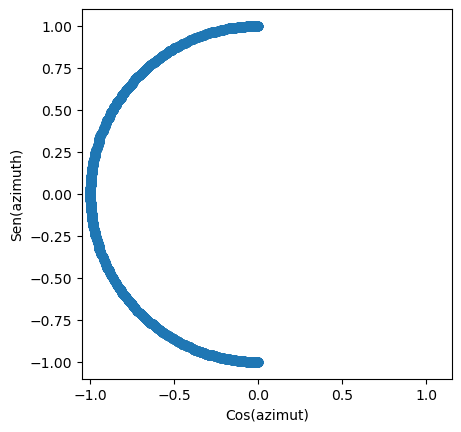

In [72]:
plt.scatter(y_train_cos,y_train_sin )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

In [73]:
# Se conforman los vectores de salida de Test Version 

samples_number=len(dataset_test)
y_test_cos=np.empty(shape=[samples_number])
y_test_sin=np.empty(shape=[samples_number])
for n in range(samples_number):   
    tmp=dataset_test.iloc[n]
    azimuth= tmp['Azimuth']
    if azimuth !=0 and azimuth !=90 and azimuth !=180 and azimuth !=270 :
        y_test_cos[n]= math.cos(math.radians(azimuth))
        y_test_sin[n]= math.sin(math.radians(azimuth))
    else:
        if azimuth == 0:
            y_test_cos[n]=1
            y_test_sin[n]=0
        if azimuth == 90:
            y_test_cos[n]=0
            y_test_sin[n]=1
        if azimuth == 180:
            y_test_cos[n]=-1
            y_test_sin[n]=0
        if azimuth == 270:
            y_test_cos[n]=0
            y_test_sin[n]=-1    
print('y_test_cos',y_test_cos)
print('y_test_sin',y_test_sin)


y_test_cos [-0.2923717  -0.37460659 -0.32556815 ..., -0.48480962 -0.81915204
 -0.4539905 ]
y_test_sin [ 0.95630476 -0.92718385 -0.94551858 ..., -0.87461971  0.57357644
  0.89100652]


Text(0, 0.5, 'Sen(azimuth)')

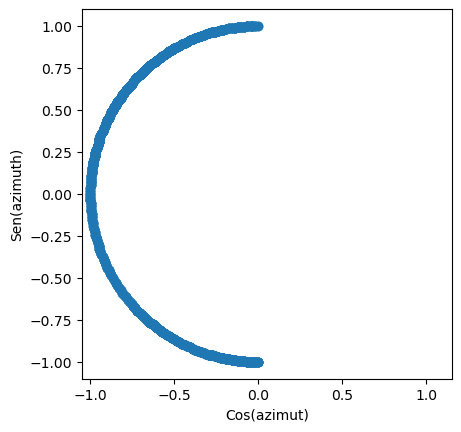

In [74]:
plt.scatter(y_test_cos, y_test_sin)
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

In [75]:
# Salvo los vectores de entrada  y salida de Training
container_path= "C:\\TESIS\\FINAL\\Training\\Preprocesing\\Input_Output_Vectors\\"
np.save(container_path + 'X1_train.npy',X1_train)
np.save(container_path + 'y_train_cos.npy',y_train_cos)
np.save(container_path + 'y_train_sin.npy',y_train_sin)

In [76]:
# Salvo los vectores de entrada  y salida de Test
np.save(container_path + 'X1_test.npy',X1_test)
np.save(container_path + 'y_test_cos.npy',y_test_cos)
np.save(container_path + 'y_test_sin.npy',y_test_sin)

In [77]:
# Salvo los dataset de Training y de Test
dataset_train.to_pickle(container_path +'dataset_train.pkl')
dataset_test.to_pickle(container_path +'dataset_test.pkl')
